# Análise de pacientes com insuficiência cardíaca






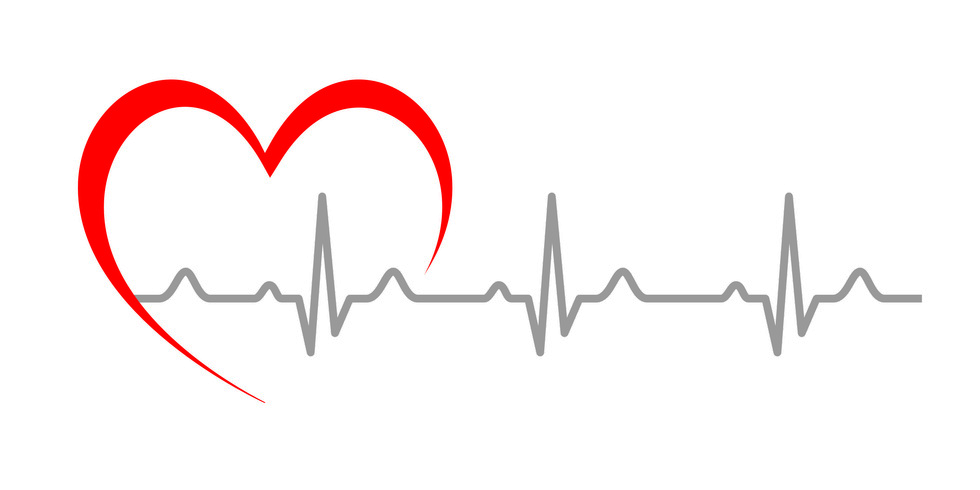

## Doenças cardiovasccardiovasculares (CVDs) é a primeira cause de morte no mundo, mas de 17 milhões de pessoas morres todo ano, cerca de 31% de todos as mortes no mundo

Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

import os

from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

### Monta Google Drive e definir caminho para a pasta com o dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Caminho para dataset no Google Drive

In [ ]:
path = '/content/gdrive/My Drive/Trabalho IA - UFRN/Heart Failure Prediction/Dataset'

# Descrição do dataset

Dataset contendo 12 caracteristicas de 299 pacientes coletados pelo Faisalabad Institute of Cardiology e o Allied Hospital in Faisalabad (Punjab, Pakistan), no ano de 2015. 

[Link para o download do dataset](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/download)

Site da publicação dessa pesquisa:

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). ([link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5))


Dicionário de dados:

* Age - Idade do paciente
* Anaemia - 0 = Não, 1 = Sim
* creatinine_phosphokinase - creatinofosfoquinase (CPK)

 *Os valores de referência da creatinofosfoquinase (CPK) são:*
 * 32 e 294 U/L para homens;
 * 33 a 211 U/L para mulheres.
* Diabetes - 0 = Não, 1 = Sim
* ejection_fraction - É a fração volumétrica de fluido ejetado de uma câmara do coração em cada contração (ou batimento cardíaco).

  *Os valores de referência são ejection fraction (EF):*
  * Entre 50% e 65%
* High_blood_pressure - 0 = Não, 1 = Sim
* Platelets - As plaquetas, também chamadas de trombócitos, são fragmentos de megacariócitos que estão relacionados com a cicatrização de feridas e reparação de vasos sanguíneos

  *Os valores de referência são:*
  * Entre 140.000 a 450.000 µL
* serum_creatinine - A creatinina sérica é o exame mais utilizado para avaliação da função renal.

  *Os valores de referência são:*
  * 0,7 e 1,3mg/dl para homens;
  * 0,6 e 1,2mg/dl para mulheres.
*	serum_sodium -  A concentração sérica de sódio (sal) no sangue.

  *Os valores de referência são:*
  * Entre 135-145 mmol/L
* Sex - Gênero do paciente: Masculino = 1, Feminino =0
* Smoking - 0 = Não, 1 = Sim
* Time - Periodo de observação do pacientes em dias
* DEATH_EVENT - 0 = Não, 1 = Sim


In [ ]:
df = pd.read_csv(os.path.join(path,'dataset.csv'), header=0)

df.head(10)

NameError: ignored

### 10 exemplos aleatórios 

In [ ]:
df.sample(10)

## Análise do dataset

Não apresentar dados nulos, todos os dados são númericos e os qualitativos já estão convertidos para númerico em formato binario.

In [ ]:
df.info()

In [ ]:
df.describe()

## Análise Gráfica

Foram gerados 1 gráfico para cada variável quantitativa e marcado os limintes recomendados.

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(22, 22))

fig.suptitle('Fatores vs Evento de morte')

sns.histplot(ax=axes[0, 0], data=df, x='age', hue="DEATH_EVENT", multiple="dodge", shrink=.8)

sns.histplot(ax=axes[0, 1], data=df, x='creatinine_phosphokinase', hue="DEATH_EVENT", multiple="dodge", shrink=.8)
axes[0,1].axvline(32,  alpha=0.8, color='green',ls=':')
axes[0,1].axvline(294, alpha=0.8, color='red',ls=':')
axes[0,1].legend(['Valor mínimo', 'Valor máximo', 'Falecido','Vivo',])

sns.histplot(ax=axes[1, 0], data=df, x='ejection_fraction', hue="DEATH_EVENT", multiple="dodge", shrink=.8)
axes[1,0].axvline(50, alpha=0.8, color='green',ls=':')
axes[1,0].axvline(65, alpha=0.8, color='red',ls=':')
axes[1,0].legend(['Valor mínimo', 'Valor máximo', 'Falecido','Vivo',])

sns.histplot(ax=axes[1, 1], data=df, x='platelets', hue="DEATH_EVENT", multiple="dodge", shrink=.8)
axes[1,1].axvline(140000, alpha=0.8, color='green',ls=':')
axes[1,1].axvline(450000, alpha=0.8, color='red',ls=':')
axes[1,1].legend(['Valor mínimo', 'Valor máximo', 'Falecido','Vivo',])

sns.histplot(ax=axes[2, 0], data=df, x='serum_creatinine', hue="DEATH_EVENT", multiple="dodge", shrink=.8)
axes[2,0].axvline(0.7, alpha=0.8, color='green',ls=':')
axes[2,0].axvline(1.3, alpha=0.8, color='red',ls=':')
axes[2,0].legend(['Valor mínimo', 'Valor máximo', 'Falecido','Vivo',])

sns.histplot(ax=axes[2, 1], data=df, x='serum_sodium', hue="DEATH_EVENT", multiple="dodge", shrink=.8)
axes[2,1].axvline(135,  alpha=0.8, color='green',ls=':')
axes[2,1].axvline(145, alpha=0.8, color='red',ls=':')
axes[2,1].legend(['Valor mínimo', 'Valor máximo', 'Falecido','Vivo',])

plt.show()


# Checkpoint 1

# Técnicas para balaceamento de dataset

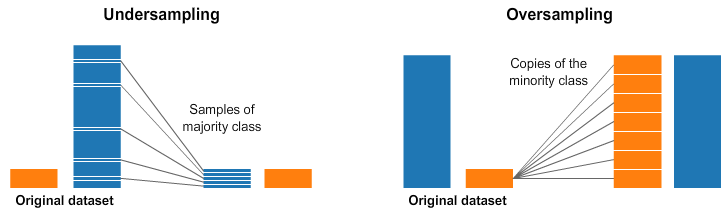

## Redução de instâncias (Undersampling)

ENN - Edited Nearest Neighbors


In [ ]:
!pip install imbalanced-learn

In [ ]:
import imblearn
print(imblearn.__version__)

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [ ]:
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
counter = Counter(y)
print(counter)

Counter({0: 203, 1: 96})


In [ ]:
undersample = EditedNearestNeighbours(sampling_strategy={0: 96}, n_neighbors=3, random_state=42,)

In [ ]:
X_ENN, y_ENN = undersample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
counter = Counter(y_ENN)
print(counter)

Counter({1: 96, 0: 47})


In [ ]:
len(X_ENN)

143

In [ ]:
ENN = pd.DataFrame(data = X_ENN)
ENN_y = pd.DataFrame(data = y_ENN)
finalDf = pd.concat([ENN, ENN_y], axis = 1)

finalDf.to_csv("Heart_Failure_Prediction_ENN.csv", index=False)

## Divisão dos dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [ ]:
X_train_ENN, X_test_ENN, y_train_ENN, y_test_ENN = train_test_split(X_ENN, y_ENN, test_size=0.3, random_state = 1)

# Modelo com Árvore de Decisão para válida a redução das instâncias

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

In [ ]:
clfOri = DecisionTreeClassifier()
clfENN = DecisionTreeClassifier()

clfOri = clfOri.fit(X_train, y_train)
clfENN = clfENN.fit(X_train_ENN, y_train_ENN)

y_pred = clfOri.predict(X_test)
y_pred_ENN = clfENN.predict(X_test_ENN)

In [ ]:
print("Acuracia: ", metrics.accuracy_score(y_test, y_pred))
print("Acuracia: ", metrics.accuracy_score(y_test_ENN, y_pred_ENN))

Acuracia:  0.8
Acuracia:  0.7441860465116279


Ocorreu uma perde de acuracia, provalvemente devido a base ser muito pequena e o algoritmo de ENN ter reduzido muito o tamanho do dataset

## Aumento de instâncias (Oversampling)

SMOTE - Synthetic Minority Over-sampling TEchnique

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
counter = Counter(y_sm)
print(counter)

Counter({1: 203, 0: 203})


In [ ]:
len(X_sm)

406

In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state = 1)

In [ ]:
clfSM = DecisionTreeClassifier()

clfSM = clfSM.fit(X_train_sm, y_train_sm)

y_pred_sm = clfENN.predict(X_test_sm)
print("Acuracia: ", metrics.accuracy_score(y_test_sm, y_pred_sm))

Acuracia:  0.819672131147541


In [ ]:
df_sm = pd.concat([pd.DataFrame(X_sm), pd.DataFrame( y_sm)], axis=1)
df_sm.columns = ['age', 'anaemia', 'creatinine_phosphokinase',	'diabetes',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine',	'serum_sodium',	'sex',	'smoking',	'time',	'DEATH_EVENT']

In [ ]:
 df_sm['age']                      = df_sm['age'].astype(int)
 df_sm['anaemia']                  = df_sm['anaemia'].astype(int)
 df_sm['creatinine_phosphokinase'] = df_sm['creatinine_phosphokinase'].astype(int)
 df_sm['diabetes']                 = df_sm['diabetes'].astype(int)
 df_sm['ejection_fraction']        = df_sm['ejection_fraction'].astype(int)
 df_sm['high_blood_pressure']      = df_sm['high_blood_pressure'].astype(int)
 df_sm['serum_sodium']             = df_sm['serum_sodium'].astype(int)
 df_sm['sex']                      = df_sm['sex'].astype(int)
 df_sm['smoking']                  = df_sm['smoking'].astype(int)
 df_sm['time']                     = df_sm['time'].astype(int)
 df_sm['platelets']                = df_sm['platelets'].astype(float)
 df_sm['serum_creatinine']         = df_sm['serum_creatinine'].astype(float)
 df_sm['DEATH_EVENT']              = df_sm['DEATH_EVENT'].astype(int)


In [ ]:
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       406 non-null    int64  
 1   anaemia                   406 non-null    int64  
 2   creatinine_phosphokinase  406 non-null    int64  
 3   diabetes                  406 non-null    int64  
 4   ejection_fraction         406 non-null    int64  
 5   high_blood_pressure       406 non-null    int64  
 6   platelets                 406 non-null    float64
 7   serum_creatinine          406 non-null    float64
 8   serum_sodium              406 non-null    int64  
 9   sex                       406 non-null    int64  
 10  smoking                   406 non-null    int64  
 11  time                      406 non-null    int64  
 12  DEATH_EVENT               406 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 41.4 KB


## Seleção de atributos

Correlação de Pearson

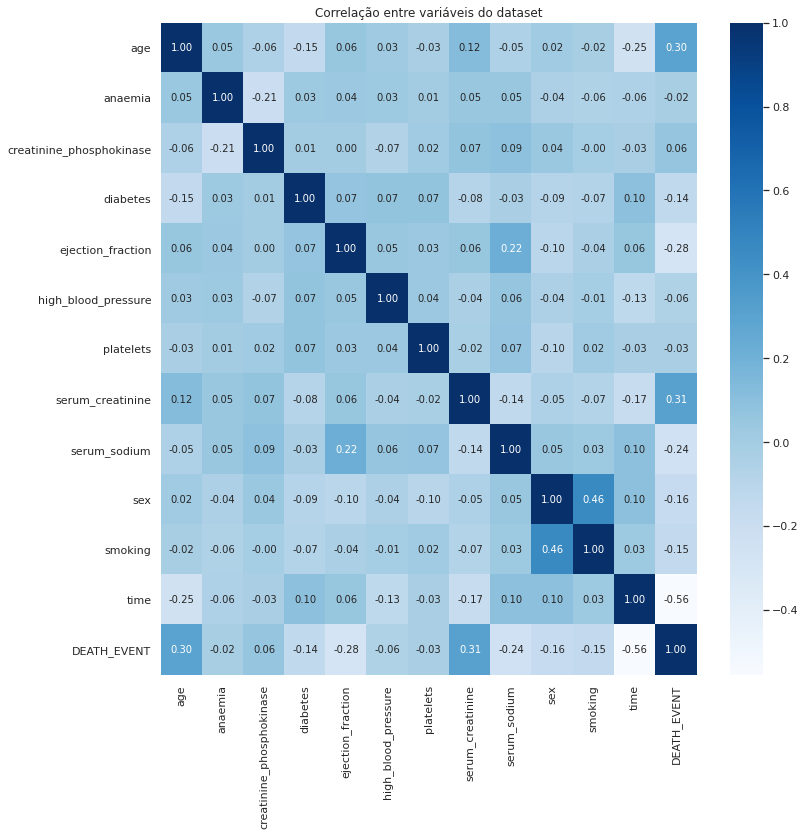

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_sm.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [ ]:
corr = df_sm.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking'], axis=1).reset_index()
corr = corr.drop('index', axis=1)

In [ ]:
corr

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75,20,1.900000,130,4,1
1,55,38,1.100000,136,6,1
2,65,20,1.300000,129,7,1
3,50,20,1.900000,137,7,1
4,65,20,2.700000,116,8,1
...,...,...,...,...,...,...
401,50,55,6.090612,137,127,1
402,71,39,1.638333,142,177,1
403,50,49,0.637681,134,167,1
404,66,23,3.128078,134,29,1


## Salvar dataframe do resultado da análise de Correlação

In [ ]:
corr.to_csv("Heart_Failure_Prediction_CorrPearson.csv", index=False)

# Testa modelo utilizando a base de dados gerado a partir da análise de correlação

In [ ]:
X = corr.drop('DEATH_EVENT', axis=1)
y = corr['DEATH_EVENT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [ ]:
clf_corr = DecisionTreeClassifier()

In [ ]:
clf_corr = clf_corr.fit(X_train, y_train)

In [ ]:
y_pred = clf_corr.predict(X_test)

In [ ]:
print("Acuracia: ", metrics.accuracy_score(y_test, y_pred))

Acuracia:  0.8360655737704918


## Extração de Atributos

PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
X = df_sm.drop('DEATH_EVENT', axis=1)
y = df_sm['DEATH_EVENT']

In [ ]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,582,0,20,1,265000.000000,1.900000,130,1,0,4
1,55,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6
2,65,0,146,0,20,0,162000.000000,1.300000,129,1,1,7
3,50,1,111,0,20,0,210000.000000,1.900000,137,1,0,7
4,65,1,160,1,20,0,327000.000000,2.700000,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
401,50,1,631,0,55,0,145475.845235,6.090612,137,0,0,127
402,71,1,344,0,39,0,221922.218354,1.638333,142,1,0,177
403,50,0,569,0,49,0,152884.057138,0.637681,134,0,0,167
404,66,1,717,0,23,0,138458.275776,3.128078,134,1,0,29


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    1
403    1
404    1
405    1
Name: DEATH_EVENT, Length: 406, dtype: int64

## Normalizar dados

In [ ]:
X = StandardScaler().fit_transform(X)

# Treinar o PCA



In [ ]:
pca = PCA(n_components=12)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.13365457 0.1237579  0.1049796  0.10064133 0.08988054 0.08061518
 0.07893387 0.07159511 0.06667331 0.0566843  0.0513279  0.04125638]
[25.51793625 24.55500926 22.61549536 22.14327312 20.92601242 19.81810175
 19.61035003 18.6764927  18.02310709 16.61823996 15.81358685 14.17748555]


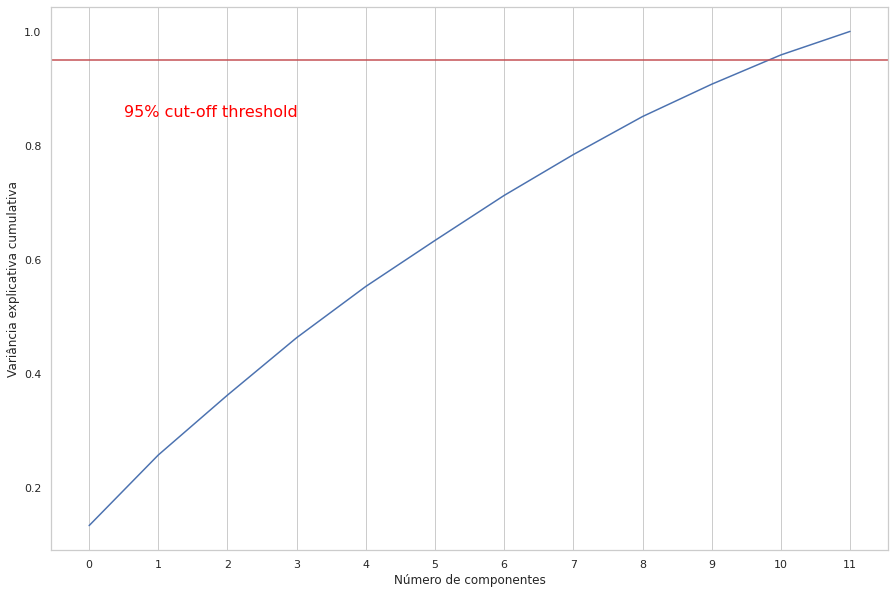

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicativa cumulativa')

plt.xticks(np.arange(0, 12, step=1))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.grid(axis='y')

plt.show()

In [ ]:
pca = PCA(n_components=11)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

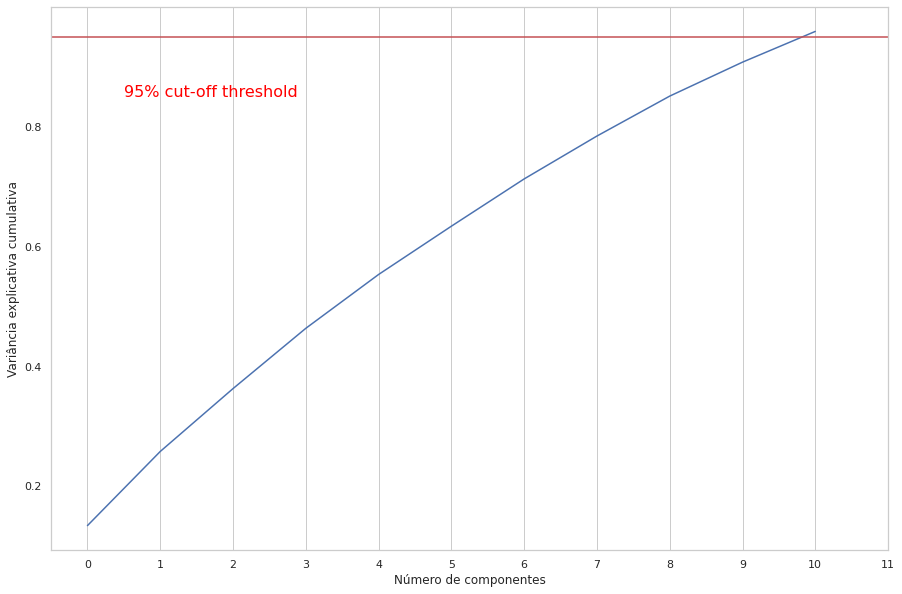

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicativa cumulativa')

plt.xticks(np.arange(0, 12, step=1))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.grid(axis='y')

plt.show()

In [ ]:
pcaX = pca.transform(X)

principalDf = pd.DataFrame(data = pcaX)
finalDf = pd.concat([principalDf, y], axis = 1)

In [ ]:
finalDf.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,DEATH_EVENT
2,1.105534,-2.793324,-1.122484,-0.991317,0.671729,-0.352756,-0.047289,-0.352615,-0.217532,1.255419,-0.099743,1
349,-1.010051,0.512216,-1.729925,-1.922628,-0.559973,0.486447,0.717831,0.077439,-0.788613,-0.631432,0.484905,1
95,-0.292155,0.600399,2.529816,-0.011937,-0.613435,-1.006742,0.460478,0.653955,0.659049,0.465097,0.661404,0
226,1.777248,-1.075507,-0.317983,-1.853971,-0.886982,0.548931,0.046721,0.480714,0.276647,-0.147419,0.813260,0
374,0.081607,-0.491254,-0.180010,-0.013229,1.620926,-1.128393,-0.172401,0.564731,0.996795,0.554662,0.187419,1
89,0.193924,-0.068970,1.476849,-0.833829,0.064905,-1.473765,-0.427304,2.241265,0.264921,-0.451369,-0.730092,0
206,0.002447,1.881336,0.011068,-0.638138,-1.636024,-0.120064,-0.999431,1.292634,0.769183,0.750788,0.127848,0
213,-1.021225,1.523099,-0.879744,-2.012812,0.767230,-0.101779,1.229447,0.639226,0.674674,-0.592357,0.871284,1
7,0.219120,0.046347,1.470251,-0.429363,1.010267,2.744274,0.953326,-1.031182,-0.879753,1.869154,1.158294,1
339,-0.705517,-1.548791,0.737782,-0.534856,-1.056234,0.085011,-0.339067,-0.152014,-1.110982,-0.335846,0.622770,1


# Salvar dataframe do resultado do PCA

In [ ]:
finalDf.to_csv("Heart_Failure_Prediction_PCA11.csv", index=False)

# Testa modelo utilizado a base de dados gerada pelo PCA

In [ ]:
X = finalDf.drop('DEATH_EVENT', axis=1)
y = finalDf['DEATH_EVENT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [ ]:
clf_pca = DecisionTreeClassifier()

clf_pca = clf_pca.fit(X_train, y_train)

y_pred = clf_pca.predict(X_test)

print("Acuracia: ", metrics.accuracy_score(y_test, y_pred))

Acuracia:  0.8278688524590164


# Checkpoint 2

 # k-NN

Para cada base de dados (uma base de dados original e 3 bases reduzidas), serão feitos experimentos em dois cenários: uso ou não do escalonamento dos valores dos atributos numéricos para [0,1]. 

Em cada um desses contextos, o procedimento deve ser o seguinte. Serão feitos treinamentos usando 10-fold cross validation para diferentes valores de k (devem ser escolhidos, pelo menos, três valores diferentes de k).

Aqui, o grupo deve buscar o valor de k que produza o melhor resultado para esta base de dados.

Fazer os experimentos com e sem peso (utilizado para desempate, caso haja empate). 

Após realizar os experimentos com este método, o aluno deve buscar respostas para as seguintes perguntas:
1. Qual foi o melhor valor de k?
2. Foi importante escalonar os valores?
3. E o peso teve algum impacto no desempenho do método?

# Base Original

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(X, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 54.169% std: (+/-0.058) for {'n_neighbors': 1}
Treino: 77.592% Test: 62.887% std: (+/-0.078) for {'n_neighbors': 2}
Treino: 78.008% Test: 57.859% std: (+/-0.110) for {'n_neighbors': 3}
Treino: 72.742% Test: 63.881% std: (+/-0.071) for {'n_neighbors': 4}
Treino: 73.829% Test: 61.881% std: (+/-0.089) for {'n_neighbors': 5}
Treino: 71.739% Test: 65.887% std: (+/-0.065) for {'n_neighbors': 6}
Treino: 71.906% Test: 64.215% std: (+/-0.088) for {'n_neighbors': 7}
Treino: 70.067% Test: 65.904% std: (+/-0.107) for {'n_neighbors': 8}
Treino: 70.820% Test: 63.209% std: (+/-0.073) for {'n_neighbors': 9}
Treino: 68.897% Test: 65.220% std: (+/-0.023) for {'n_neighbors': 10}
Treino: 68.730% Test: 64.554% std: (+/-0.037) for {'n_neighbors': 11}
Treino: 68.897% Test: 66.887% std: (+/-0.026) for {'n_neighbors': 12}
Treino: 69.147% Test: 65.209% std: (+/-0.051) for {'n_neighbors': 13}
Treino: 68.144% Test: 66.887% std: (+/-0.015) for {'n_neighbors': 14}
Tre

In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = KNeighborsClassifier(n_neighbors=20)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.677 (0.080)


## Base escalonada

In [ ]:
from sklearn.preprocessing import scale

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Xs = scale(X)

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(Xs, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 62.220% std: (+/-0.059) for {'n_neighbors': 1}
Treino: 79.430% Test: 68.559% std: (+/-0.015) for {'n_neighbors': 2}
Treino: 84.279% Test: 71.565% std: (+/-0.024) for {'n_neighbors': 3}
Treino: 79.263% Test: 70.898% std: (+/-0.059) for {'n_neighbors': 4}
Treino: 81.354% Test: 73.898% std: (+/-0.071) for {'n_neighbors': 5}
Treino: 78.093% Test: 70.565% std: (+/-0.035) for {'n_neighbors': 6}
Treino: 80.433% Test: 74.565% std: (+/-0.053) for {'n_neighbors': 7}
Treino: 76.838% Test: 71.898% std: (+/-0.051) for {'n_neighbors': 8}
Treino: 78.677% Test: 73.565% std: (+/-0.048) for {'n_neighbors': 9}
Treino: 76.420% Test: 71.898% std: (+/-0.081) for {'n_neighbors': 10}
Treino: 77.506% Test: 72.565% std: (+/-0.064) for {'n_neighbors': 11}
Treino: 76.253% Test: 72.565% std: (+/-0.070) for {'n_neighbors': 12}
Treino: 77.006% Test: 73.232% std: (+/-0.058) for {'n_neighbors': 13}
Treino: 75.835% Test: 71.565% std: (+/-0.074) for {'n_neighbors': 14}
Tre

In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = KNeighborsClassifier(n_neighbors=7)

scores = cross_val_score(model, Xs, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.745 (0.082)


## K-NN com pesos

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

knn = KNeighborsClassifier(weights='distance')
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(X, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 54.169% std: (+/-0.058) for {'n_neighbors': 1}
Treino: 100.000% Test: 54.169% std: (+/-0.058) for {'n_neighbors': 2}
Treino: 100.000% Test: 56.859% std: (+/-0.114) for {'n_neighbors': 3}
Treino: 100.000% Test: 57.864% std: (+/-0.125) for {'n_neighbors': 4}
Treino: 100.000% Test: 59.198% std: (+/-0.100) for {'n_neighbors': 5}
Treino: 100.000% Test: 58.859% std: (+/-0.109) for {'n_neighbors': 6}
Treino: 100.000% Test: 59.864% std: (+/-0.106) for {'n_neighbors': 7}
Treino: 100.000% Test: 60.876% std: (+/-0.118) for {'n_neighbors': 8}
Treino: 100.000% Test: 60.542% std: (+/-0.108) for {'n_neighbors': 9}
Treino: 100.000% Test: 60.870% std: (+/-0.106) for {'n_neighbors': 10}
Treino: 100.000% Test: 60.870% std: (+/-0.106) for {'n_neighbors': 11}
Treino: 100.000% Test: 60.209% std: (+/-0.130) for {'n_neighbors': 12}
Treino: 100.000% Test: 60.876% std: (+/-0.110) for {'n_neighbors': 13}
Treino: 100.000% Test: 61.209% std: (+/-0.110) for {'n_neighb

In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = KNeighborsClassifier(n_neighbors=20)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.677 (0.080)


## K-NN com pesos e dados escalonados

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Xs = scale(X)

knn = KNeighborsClassifier(weights='distance')
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(Xs, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 62.220% std: (+/-0.059) for {'n_neighbors': 1}
Treino: 100.000% Test: 62.220% std: (+/-0.059) for {'n_neighbors': 2}
Treino: 100.000% Test: 70.898% std: (+/-0.019) for {'n_neighbors': 3}
Treino: 100.000% Test: 71.565% std: (+/-0.044) for {'n_neighbors': 4}
Treino: 100.000% Test: 73.232% std: (+/-0.065) for {'n_neighbors': 5}
Treino: 100.000% Test: 73.898% std: (+/-0.071) for {'n_neighbors': 6}
Treino: 100.000% Test: 73.898% std: (+/-0.049) for {'n_neighbors': 7}
Treino: 100.000% Test: 72.565% std: (+/-0.037) for {'n_neighbors': 8}
Treino: 100.000% Test: 73.232% std: (+/-0.045) for {'n_neighbors': 9}
Treino: 100.000% Test: 71.898% std: (+/-0.041) for {'n_neighbors': 10}
Treino: 100.000% Test: 72.232% std: (+/-0.063) for {'n_neighbors': 11}
Treino: 100.000% Test: 72.232% std: (+/-0.087) for {'n_neighbors': 12}
Treino: 100.000% Test: 73.232% std: (+/-0.058) for {'n_neighbors': 13}
Treino: 100.000% Test: 72.565% std: (+/-0.052) for {'n_neighb

# Base reduzida 1

In [ ]:
X = df_sm.iloc[:,:-1].values
y = df_sm.iloc[:,-1].values

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(X, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 55.676% std: (+/-0.061) for {'n_neighbors': 1}
Treino: 79.557% Test: 57.139% std: (+/-0.058) for {'n_neighbors': 2}
Treino: 79.372% Test: 56.170% std: (+/-0.055) for {'n_neighbors': 3}
Treino: 73.214% Test: 57.142% std: (+/-0.036) for {'n_neighbors': 4}
Treino: 72.106% Test: 59.106% std: (+/-0.074) for {'n_neighbors': 5}
Treino: 69.828% Test: 57.886% std: (+/-0.076) for {'n_neighbors': 6}
Treino: 68.966% Test: 59.121% std: (+/-0.063) for {'n_neighbors': 7}
Treino: 67.673% Test: 55.170% std: (+/-0.087) for {'n_neighbors': 8}
Treino: 67.118% Test: 57.639% std: (+/-0.092) for {'n_neighbors': 9}
Treino: 65.949% Test: 56.889% std: (+/-0.085) for {'n_neighbors': 10}
Treino: 65.702% Test: 56.393% std: (+/-0.084) for {'n_neighbors': 11}
Treino: 65.826% Test: 56.396% std: (+/-0.085) for {'n_neighbors': 12}
Treino: 65.641% Test: 55.661% std: (+/-0.065) for {'n_neighbors': 13}
Treino: 64.780% Test: 54.923% std: (+/-0.066) for {'n_neighbors': 14}
Tre

In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.566 (0.081)


## Base escalonada

In [ ]:
X = df_sm.iloc[:,:-1].values
y = df_sm.iloc[:,-1].values

Xs = scale(X)

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(Xs, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 75.152% std: (+/-0.172) for {'n_neighbors': 1}
Treino: 89.410% Test: 72.192% std: (+/-0.184) for {'n_neighbors': 2}
Treino: 89.718% Test: 79.082% std: (+/-0.183) for {'n_neighbors': 3}
Treino: 87.255% Test: 77.106% std: (+/-0.179) for {'n_neighbors': 4}
Treino: 86.947% Test: 80.072% std: (+/-0.193) for {'n_neighbors': 5}
Treino: 85.839% Test: 77.603% std: (+/-0.187) for {'n_neighbors': 6}
Treino: 86.209% Test: 80.563% std: (+/-0.138) for {'n_neighbors': 7}
Treino: 83.931% Test: 78.826% std: (+/-0.100) for {'n_neighbors': 8}
Treino: 84.608% Test: 79.819% std: (+/-0.122) for {'n_neighbors': 9}
Treino: 83.499% Test: 77.597% std: (+/-0.146) for {'n_neighbors': 10}
Treino: 84.547% Test: 78.344% std: (+/-0.154) for {'n_neighbors': 11}
Treino: 83.315% Test: 78.091% std: (+/-0.146) for {'n_neighbors': 12}
Treino: 83.561% Test: 78.100% std: (+/-0.128) for {'n_neighbors': 13}
Treino: 82.268% Test: 76.865% std: (+/-0.114) for {'n_neighbors': 14}
Tre

In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = KNeighborsClassifier(n_neighbors=7)

scores = cross_val_score(model, Xs, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.807 (0.063)


## K-NN com pesos

In [ ]:
X = df_sm.iloc[:,:-1].values
y = df_sm.iloc[:,-1].values

knn = KNeighborsClassifier(weights='distance')
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(X, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 55.676% std: (+/-0.061) for {'n_neighbors': 1}
Treino: 100.000% Test: 55.676% std: (+/-0.061) for {'n_neighbors': 2}
Treino: 100.000% Test: 56.417% std: (+/-0.090) for {'n_neighbors': 3}
Treino: 100.000% Test: 56.167% std: (+/-0.056) for {'n_neighbors': 4}
Treino: 100.000% Test: 59.612% std: (+/-0.053) for {'n_neighbors': 5}
Treino: 100.000% Test: 56.902% std: (+/-0.050) for {'n_neighbors': 6}
Treino: 100.000% Test: 58.386% std: (+/-0.055) for {'n_neighbors': 7}
Treino: 100.000% Test: 57.151% std: (+/-0.038) for {'n_neighbors': 8}
Treino: 100.000% Test: 57.154% std: (+/-0.063) for {'n_neighbors': 9}
Treino: 100.000% Test: 57.889% std: (+/-0.077) for {'n_neighbors': 10}
Treino: 100.000% Test: 57.398% std: (+/-0.081) for {'n_neighbors': 11}
Treino: 100.000% Test: 57.642% std: (+/-0.071) for {'n_neighbors': 12}
Treino: 100.000% Test: 57.645% std: (+/-0.084) for {'n_neighbors': 13}
Treino: 100.000% Test: 58.389% std: (+/-0.100) for {'n_neighb

In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.566 (0.081)


## K-NN com pesos e dados escalonados

In [ ]:
X = df_sm.iloc[:,:-1].values
y = df_sm.iloc[:,-1].values

Xs = scale(X)

knn = KNeighborsClassifier(weights='distance')
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(Xs, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 75.152% std: (+/-0.172) for {'n_neighbors': 1}
Treino: 100.000% Test: 75.152% std: (+/-0.172) for {'n_neighbors': 2}
Treino: 100.000% Test: 80.560% std: (+/-0.164) for {'n_neighbors': 3}
Treino: 100.000% Test: 81.789% std: (+/-0.157) for {'n_neighbors': 4}
Treino: 100.000% Test: 81.060% std: (+/-0.205) for {'n_neighbors': 5}
Treino: 100.000% Test: 83.026% std: (+/-0.169) for {'n_neighbors': 6}
Treino: 100.000% Test: 82.785% std: (+/-0.172) for {'n_neighbors': 7}
Treino: 100.000% Test: 83.514% std: (+/-0.129) for {'n_neighbors': 8}
Treino: 100.000% Test: 83.029% std: (+/-0.156) for {'n_neighbors': 9}
Treino: 100.000% Test: 83.761% std: (+/-0.170) for {'n_neighbors': 10}
Treino: 100.000% Test: 82.291% std: (+/-0.182) for {'n_neighbors': 11}
Treino: 100.000% Test: 83.764% std: (+/-0.150) for {'n_neighbors': 12}
Treino: 100.000% Test: 82.788% std: (+/-0.175) for {'n_neighbors': 13}
Treino: 100.000% Test: 81.060% std: (+/-0.159) for {'n_neighb

# Base reduzida 2

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(X, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 58.862% std: (+/-0.161) for {'n_neighbors': 1}
Treino: 90.703% Test: 58.600% std: (+/-0.250) for {'n_neighbors': 2}
Treino: 91.749% Test: 59.846% std: (+/-0.176) for {'n_neighbors': 3}
Treino: 89.718% Test: 63.544% std: (+/-0.171) for {'n_neighbors': 4}
Treino: 89.225% Test: 61.325% std: (+/-0.127) for {'n_neighbors': 5}
Treino: 86.946% Test: 70.208% std: (+/-0.105) for {'n_neighbors': 6}
Treino: 86.885% Test: 66.266% std: (+/-0.107) for {'n_neighbors': 7}
Treino: 85.530% Test: 71.933% std: (+/-0.159) for {'n_neighbors': 8}
Treino: 86.515% Test: 70.461% std: (+/-0.176) for {'n_neighbors': 9}
Treino: 85.099% Test: 73.174% std: (+/-0.222) for {'n_neighbors': 10}
Treino: 86.084% Test: 71.945% std: (+/-0.247) for {'n_neighbors': 11}
Treino: 84.607% Test: 71.942% std: (+/-0.227) for {'n_neighbors': 12}
Treino: 84.976% Test: 71.945% std: (+/-0.226) for {'n_neighbors': 13}
Treino: 84.484% Test: 72.930% std: (+/-0.194) for {'n_neighbors': 14}
Tre

In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = KNeighborsClassifier(n_neighbors=21)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.830 (0.053)


## Base escalonada

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

Xs = scale(X)

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(Xs, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 81.054% std: (+/-0.115) for {'n_neighbors': 1}
Treino: 92.797% Test: 77.106% std: (+/-0.063) for {'n_neighbors': 2}
Treino: 90.703% Test: 80.807% std: (+/-0.122) for {'n_neighbors': 3}
Treino: 89.040% Test: 80.310% std: (+/-0.118) for {'n_neighbors': 4}
Treino: 87.316% Test: 81.057% std: (+/-0.160) for {'n_neighbors': 5}
Treino: 86.824% Test: 80.310% std: (+/-0.144) for {'n_neighbors': 6}
Treino: 86.701% Test: 80.066% std: (+/-0.146) for {'n_neighbors': 7}
Treino: 85.346% Test: 81.292% std: (+/-0.127) for {'n_neighbors': 8}
Treino: 85.223% Test: 81.292% std: (+/-0.127) for {'n_neighbors': 9}
Treino: 84.976% Test: 81.289% std: (+/-0.116) for {'n_neighbors': 10}
Treino: 84.853% Test: 81.292% std: (+/-0.144) for {'n_neighbors': 11}
Treino: 84.669% Test: 80.307% std: (+/-0.143) for {'n_neighbors': 12}
Treino: 85.100% Test: 81.045% std: (+/-0.129) for {'n_neighbors': 13}
Treino: 84.854% Test: 81.286% std: (+/-0.108) for {'n_neighbors': 14}
Tre

In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(model, Xs, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.820 (0.057)


## K-NN com pesos

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

knn = KNeighborsClassifier(weights='distance')
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(X, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 58.862% std: (+/-0.161) for {'n_neighbors': 1}
Treino: 100.000% Test: 58.862% std: (+/-0.161) for {'n_neighbors': 2}
Treino: 100.000% Test: 59.603% std: (+/-0.167) for {'n_neighbors': 3}
Treino: 100.000% Test: 60.834% std: (+/-0.175) for {'n_neighbors': 4}
Treino: 100.000% Test: 61.081% std: (+/-0.128) for {'n_neighbors': 5}
Treino: 100.000% Test: 62.313% std: (+/-0.164) for {'n_neighbors': 6}
Treino: 100.000% Test: 64.538% std: (+/-0.066) for {'n_neighbors': 7}
Treino: 100.000% Test: 68.729% std: (+/-0.116) for {'n_neighbors': 8}
Treino: 100.000% Test: 68.976% std: (+/-0.094) for {'n_neighbors': 9}
Treino: 100.000% Test: 70.705% std: (+/-0.157) for {'n_neighbors': 10}
Treino: 100.000% Test: 70.214% std: (+/-0.140) for {'n_neighbors': 11}
Treino: 100.000% Test: 70.955% std: (+/-0.184) for {'n_neighbors': 12}
Treino: 100.000% Test: 72.189% std: (+/-0.175) for {'n_neighbors': 13}
Treino: 100.000% Test: 72.930% std: (+/-0.193) for {'n_neighb

In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = KNeighborsClassifier(n_neighbors=21)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.830 (0.053)


## K-NN com pesos e dados escalonados

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

Xs = scale(X)

knn = KNeighborsClassifier(weights='distance')
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(Xs, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 81.054% std: (+/-0.115) for {'n_neighbors': 1}
Treino: 100.000% Test: 81.054% std: (+/-0.115) for {'n_neighbors': 2}
Treino: 100.000% Test: 81.798% std: (+/-0.149) for {'n_neighbors': 3}
Treino: 100.000% Test: 81.551% std: (+/-0.135) for {'n_neighbors': 4}
Treino: 100.000% Test: 83.029% std: (+/-0.165) for {'n_neighbors': 5}
Treino: 100.000% Test: 82.291% std: (+/-0.169) for {'n_neighbors': 6}
Treino: 100.000% Test: 82.535% std: (+/-0.137) for {'n_neighbors': 7}
Treino: 100.000% Test: 82.288% std: (+/-0.145) for {'n_neighbors': 8}
Treino: 100.000% Test: 82.532% std: (+/-0.134) for {'n_neighbors': 9}
Treino: 100.000% Test: 81.545% std: (+/-0.136) for {'n_neighbors': 10}
Treino: 100.000% Test: 82.282% std: (+/-0.126) for {'n_neighbors': 11}
Treino: 100.000% Test: 82.036% std: (+/-0.132) for {'n_neighbors': 12}
Treino: 100.000% Test: 82.282% std: (+/-0.128) for {'n_neighbors': 13}
Treino: 100.000% Test: 82.282% std: (+/-0.141) for {'n_neighb

# Base reduzida 3

In [ ]:
X = finalDf.iloc[:,:-1].values
y = finalDf.iloc[:,-1].values

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(X, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 76.381% std: (+/-0.152) for {'n_neighbors': 1}
Treino: 89.657% Test: 72.436% std: (+/-0.158) for {'n_neighbors': 2}
Treino: 89.102% Test: 80.557% std: (+/-0.175) for {'n_neighbors': 3}
Treino: 87.502% Test: 75.628% std: (+/-0.186) for {'n_neighbors': 4}
Treino: 86.147% Test: 80.810% std: (+/-0.159) for {'n_neighbors': 5}
Treino: 85.162% Test: 75.878% std: (+/-0.167) for {'n_neighbors': 6}
Treino: 86.886% Test: 78.347% std: (+/-0.166) for {'n_neighbors': 7}
Treino: 85.100% Test: 77.838% std: (+/-0.122) for {'n_neighbors': 8}
Treino: 85.285% Test: 79.822% std: (+/-0.143) for {'n_neighbors': 9}
Treino: 83.560% Test: 78.573% std: (+/-0.130) for {'n_neighbors': 10}
Treino: 85.038% Test: 80.057% std: (+/-0.130) for {'n_neighbors': 11}
Treino: 83.807% Test: 79.310% std: (+/-0.144) for {'n_neighbors': 12}
Treino: 84.546% Test: 79.810% std: (+/-0.141) for {'n_neighbors': 13}
Treino: 83.191% Test: 79.557% std: (+/-0.104) for {'n_neighbors': 14}
Tre

In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = KNeighborsClassifier(n_neighbors=18)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.799 (0.063)


## Base escalonada

In [ ]:
X = finalDf.iloc[:,:-1].values
y = finalDf.iloc[:,-1].values

Xs = scale(X)

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(Xs, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 75.143% std: (+/-0.156) for {'n_neighbors': 1}
Treino: 89.472% Test: 71.701% std: (+/-0.194) for {'n_neighbors': 2}
Treino: 88.794% Test: 79.332% std: (+/-0.153) for {'n_neighbors': 3}
Treino: 86.825% Test: 75.134% std: (+/-0.167) for {'n_neighbors': 4}
Treino: 86.085% Test: 78.591% std: (+/-0.124) for {'n_neighbors': 5}
Treino: 85.531% Test: 75.384% std: (+/-0.131) for {'n_neighbors': 6}
Treino: 85.901% Test: 76.387% std: (+/-0.168) for {'n_neighbors': 7}
Treino: 84.362% Test: 75.631% std: (+/-0.114) for {'n_neighbors': 8}
Treino: 84.484% Test: 77.365% std: (+/-0.143) for {'n_neighbors': 9}
Treino: 83.561% Test: 76.125% std: (+/-0.146) for {'n_neighbors': 10}
Treino: 83.869% Test: 76.871% std: (+/-0.139) for {'n_neighbors': 11}
Treino: 82.883% Test: 76.862% std: (+/-0.132) for {'n_neighbors': 12}
Treino: 84.053% Test: 76.862% std: (+/-0.158) for {'n_neighbors': 13}
Treino: 82.267% Test: 75.140% std: (+/-0.145) for {'n_neighbors': 14}
Tre

In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = KNeighborsClassifier(n_neighbors=18)

scores = cross_val_score(model, Xs, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.784 (0.063)


## K-NN com pesos

In [ ]:
X = finalDf.iloc[:,:-1].values
y = finalDf.iloc[:,-1].values

knn = KNeighborsClassifier(weights='distance')
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(X, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 76.381% std: (+/-0.152) for {'n_neighbors': 1}
Treino: 100.000% Test: 76.381% std: (+/-0.152) for {'n_neighbors': 2}
Treino: 100.000% Test: 81.542% std: (+/-0.155) for {'n_neighbors': 3}
Treino: 100.000% Test: 82.291% std: (+/-0.183) for {'n_neighbors': 4}
Treino: 100.000% Test: 82.045% std: (+/-0.171) for {'n_neighbors': 5}
Treino: 100.000% Test: 82.785% std: (+/-0.167) for {'n_neighbors': 6}
Treino: 100.000% Test: 81.063% std: (+/-0.205) for {'n_neighbors': 7}
Treino: 100.000% Test: 82.532% std: (+/-0.136) for {'n_neighbors': 8}
Treino: 100.000% Test: 82.785% std: (+/-0.186) for {'n_neighbors': 9}
Treino: 100.000% Test: 83.270% std: (+/-0.130) for {'n_neighbors': 10}
Treino: 100.000% Test: 82.033% std: (+/-0.163) for {'n_neighbors': 11}
Treino: 100.000% Test: 83.020% std: (+/-0.145) for {'n_neighbors': 12}
Treino: 100.000% Test: 82.773% std: (+/-0.158) for {'n_neighbors': 13}
Treino: 100.000% Test: 82.770% std: (+/-0.139) for {'n_neighb

In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = KNeighborsClassifier(n_neighbors=18)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.799 (0.063)


## K-NN com pesos e dados escalonados

In [ ]:
X = finalDf.iloc[:,:-1].values
y = finalDf.iloc[:,-1].values

Xs = scale(X)

knn = KNeighborsClassifier(weights='distance')
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(Xs, y)

print('Resultado do GridSearch:')
means_train = knn_gscv.cv_results_['mean_train_score']
means = knn_gscv.cv_results_['mean_test_score']
stds = knn_gscv.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, knn_gscv.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('Melhor valor de k:', knn_gscv.best_params_)
print('Melhor acuracia:', knn_gscv.best_score_)

Resultado do GridSearch:
Treino: 100.000% Test: 75.143% std: (+/-0.156) for {'n_neighbors': 1}
Treino: 100.000% Test: 75.143% std: (+/-0.156) for {'n_neighbors': 2}
Treino: 100.000% Test: 79.825% std: (+/-0.147) for {'n_neighbors': 3}
Treino: 100.000% Test: 79.581% std: (+/-0.162) for {'n_neighbors': 4}
Treino: 100.000% Test: 79.085% std: (+/-0.146) for {'n_neighbors': 5}
Treino: 100.000% Test: 81.310% std: (+/-0.149) for {'n_neighbors': 6}
Treino: 100.000% Test: 79.837% std: (+/-0.190) for {'n_neighbors': 7}
Treino: 100.000% Test: 79.831% std: (+/-0.146) for {'n_neighbors': 8}
Treino: 100.000% Test: 80.322% std: (+/-0.168) for {'n_neighbors': 9}
Treino: 100.000% Test: 81.304% std: (+/-0.158) for {'n_neighbors': 10}
Treino: 100.000% Test: 80.078% std: (+/-0.177) for {'n_neighbors': 11}
Treino: 100.000% Test: 81.057% std: (+/-0.153) for {'n_neighbors': 12}
Treino: 100.000% Test: 81.304% std: (+/-0.180) for {'n_neighbors': 13}
Treino: 100.000% Test: 80.813% std: (+/-0.156) for {'n_neighb

# Árvores de decisão

Para cada base de dados, serão feitos treinamentos usando 10-fold cross validation, variando se apenas o parâmetro poda (ou seja, construir árvore com poda e sem poda). Aqui, as perguntas a serem respondidas são as seguintes:
1. A árvore (Árvore de Decisão) apresentou overfitting antes da poda?
2. Com o uso da poda é possível afirmar se a AD estava ou não com overfitting?

# Base Original

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))

cm = confusion_matrix(y_test, y_pred_test)

print("Matriz de confusão")
print(cm)

Acurácia média no train: 1.0
Acurácia média no test: 0.7704827586206897
Matriz de confusão
[[15  2]
 [ 3  9]]


In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = DecisionTreeClassifier()

scores = cross_val_score(model, X, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.775 (0.068)


# Visualizar árvore de decisão

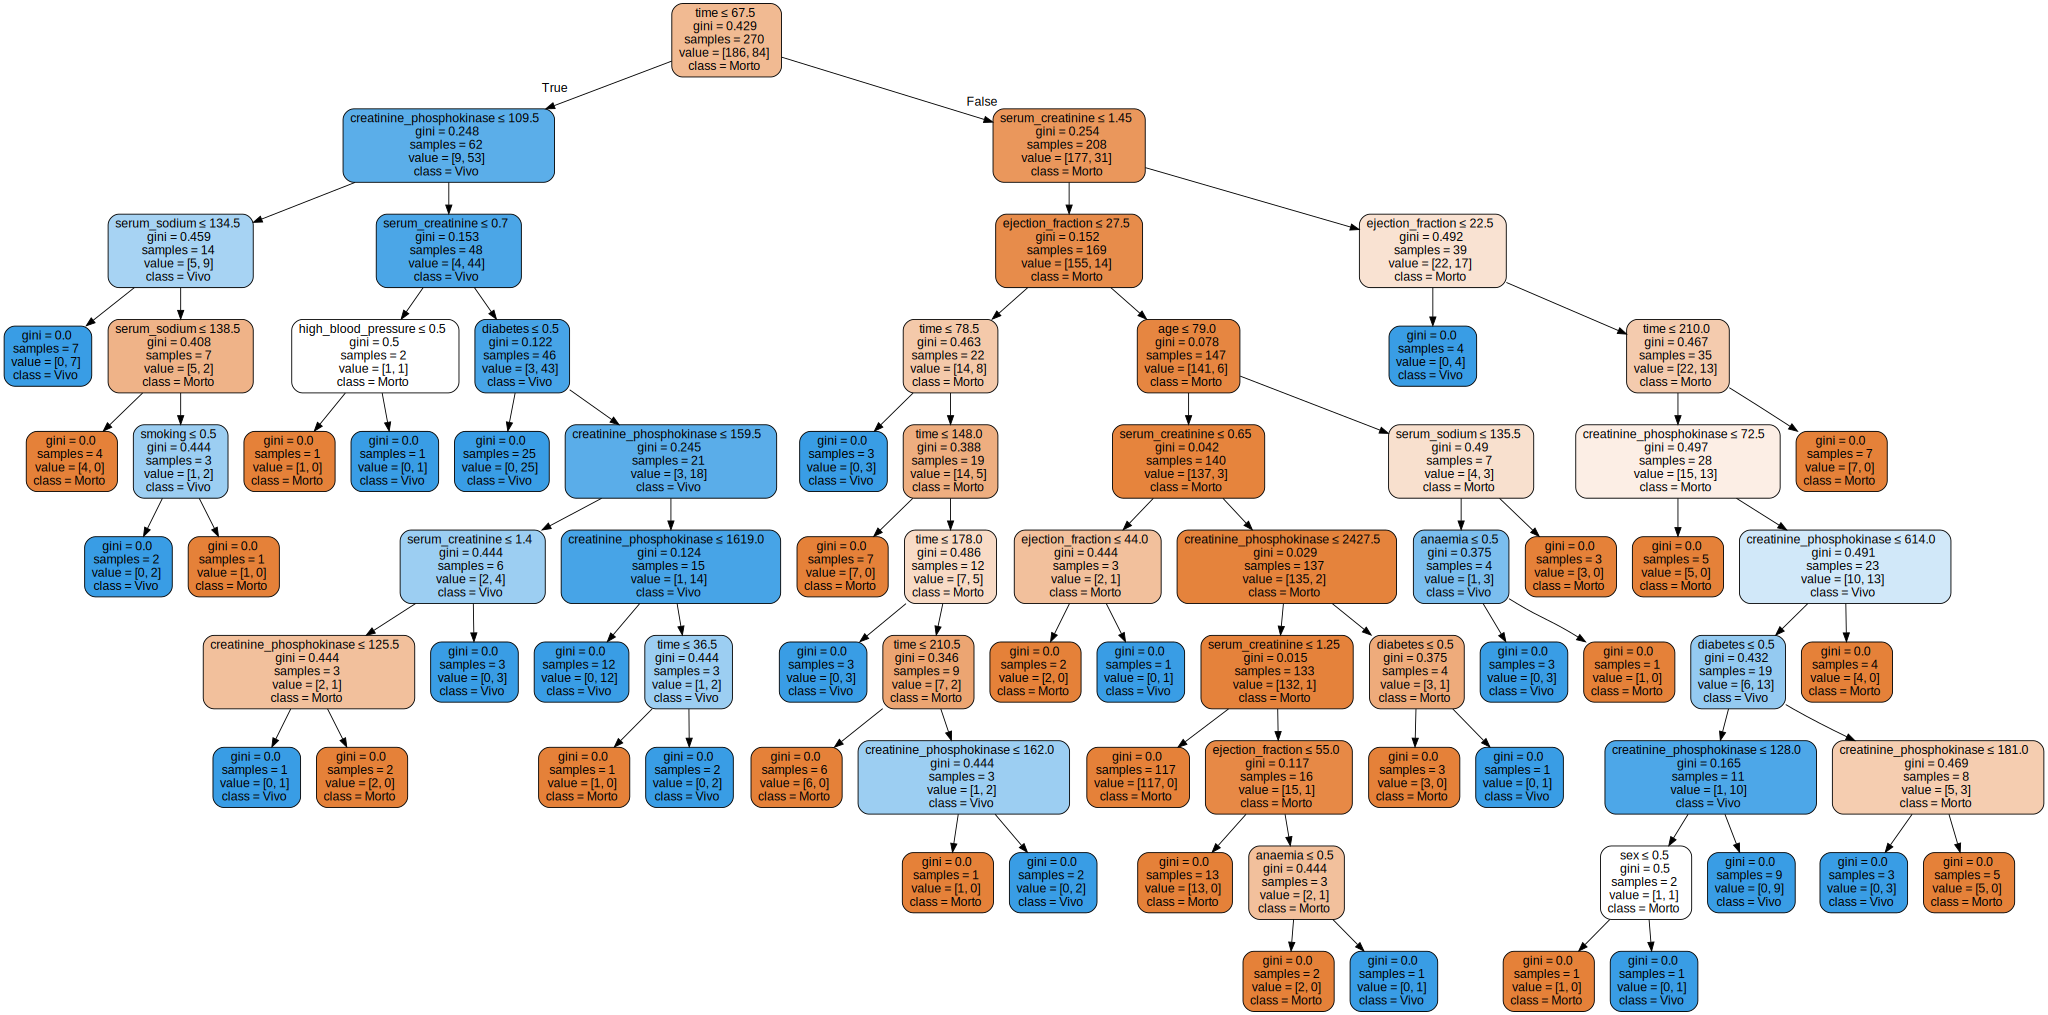

In [ ]:
#!pip install graphviz
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Heart Failure Prediction") 
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(df.drop('DEATH_EVENT', axis=1).columns), class_names=['Morto', 'Vivo'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Poda


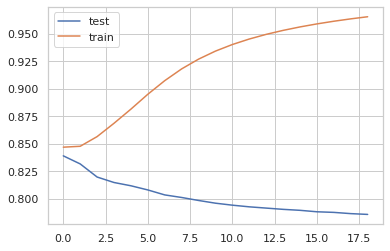

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

poda_train=[]
poda_test =[]

recall_accs=[]
train_accs=[]

for d in range(1,20):
  for train, test in rkf.split(X, y):  
      X_train = X[train]
      X_test  = X[test]
      y_train = y[train]
      y_test  = y[test]

      clf = DecisionTreeClassifier(max_depth=d)
      clf.fit(X_train, y_train)

      y_pred_train = clf.predict(X_train)
      y_pred_test  = clf.predict(X_test)

      train_acc = accuracy_score(y_train, y_pred_train)
      train_accs.append(train_acc)

      recall_acc = accuracy_score(y_test, y_pred_test)
      recall_accs.append(recall_acc)

  #print(d)
  #print("Acurácia média no train:", np.mean(train_accs))
  #print("Acurácia média no test:", np.mean(recall_accs))

  poda_test.append(np.mean(recall_accs))
  poda_train.append(np.mean(train_accs))

plt.plot(poda_test, label='test')
plt.plot(poda_train, label='train')
plt.legend(loc='best')
plt.show()

# Base reduzida 1

In [ ]:
X = df_sm.iloc[:,:-1].values
y = df_sm.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))


Acurácia média no train: 1.0
Acurácia média no test: 0.832530487804878


In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = DecisionTreeClassifier()

scores = cross_val_score(model, X, y, scoring='accuracy', cv=rcv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.835 (0.051)


# Poda

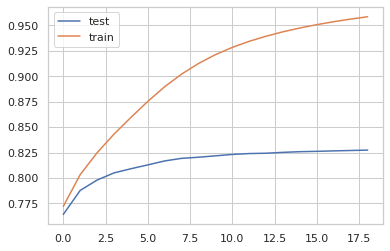

In [ ]:
X = df_sm.iloc[:,:-1].values
y = df_sm.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

poda_train=[]
poda_test =[]

recall_accs=[]
train_accs=[]

for d in range(1,20):
  for train, test in rkf.split(X, y):  
      X_train = X[train]
      X_test  = X[test]
      y_train = y[train]
      y_test  = y[test]

      clf = DecisionTreeClassifier(max_depth=d)
      clf.fit(X_train, y_train)

      y_pred_train = clf.predict(X_train)
      y_pred_test  = clf.predict(X_test)

      train_acc = accuracy_score(y_train, y_pred_train)
      train_accs.append(train_acc)

      recall_acc = accuracy_score(y_test, y_pred_test)
      recall_accs.append(recall_acc)

  #print(d)
  #print("Acurácia média no train:", np.mean(train_accs))
  #print("Acurácia média no test:", np.mean(recall_accs))

  poda_test.append(np.mean(recall_accs))
  poda_train.append(np.mean(train_accs))

plt.plot(poda_test, label='test')
plt.plot(poda_train, label='train')
plt.legend(loc='best')
plt.show()

# Base reduzida 2

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))

Acurácia média no train: 1.0
Acurácia média no test: 0.8205548780487804


# Poda

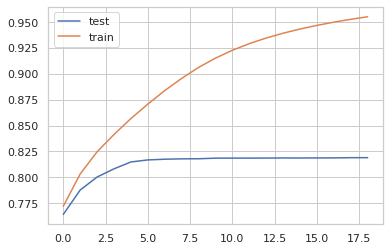

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

poda_train=[]
poda_test =[]

recall_accs=[]
train_accs=[]

for d in range(1,20):
  for train, test in rkf.split(X, y):  
      X_train = X[train]
      X_test  = X[test]
      y_train = y[train]
      y_test  = y[test]

      clf = DecisionTreeClassifier(max_depth=d)
      clf.fit(X_train, y_train)

      y_pred_train = clf.predict(X_train)
      y_pred_test  = clf.predict(X_test)

      train_acc = accuracy_score(y_train, y_pred_train)
      train_accs.append(train_acc)

      recall_acc = accuracy_score(y_test, y_pred_test)
      recall_accs.append(recall_acc)

  #print(d)
  #print("Acurácia média no train:", np.mean(train_accs))
  #print("Acurácia média no test:", np.mean(recall_accs))

  poda_test.append(np.mean(recall_accs))
  poda_train.append(np.mean(train_accs))

plt.plot(poda_test, label='test')
plt.plot(poda_train, label='train')
plt.legend(loc='best')
plt.show()

# Base reduzida 3

In [ ]:
X = finalDf.iloc[:,:-1].values
y = finalDf.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))

Acurácia média no train: 1.0
Acurácia média no test: 0.7413170731707315


# Poda

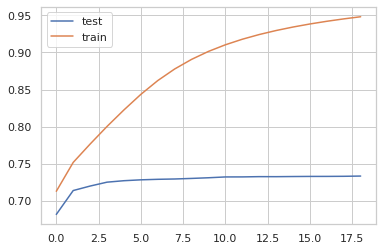

In [ ]:
X = finalDf.iloc[:,:-1].values
y = finalDf.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

poda_train=[]
poda_test =[]

recall_accs=[]
train_accs=[]

for d in range(1,20):
  for train, test in rkf.split(X, y):  
      X_train = X[train]
      X_test  = X[test]
      y_train = y[train]
      y_test  = y[test]

      clf = DecisionTreeClassifier(max_depth=d)
      clf.fit(X_train, y_train)

      y_pred_train = clf.predict(X_train)
      y_pred_test  = clf.predict(X_test)

      train_acc = accuracy_score(y_train, y_pred_train)
      train_accs.append(train_acc)

      recall_acc = accuracy_score(y_test, y_pred_test)
      recall_accs.append(recall_acc)

  #print(d)
  #print("Acurácia média no train:", np.mean(train_accs))
  #print("Acurácia média no test:", np.mean(recall_accs))

  poda_test.append(np.mean(recall_accs))
  poda_train.append(np.mean(train_accs))

plt.plot(poda_test, label='test')
plt.plot(poda_train, label='train')
plt.legend(loc='best')
plt.show()

#Naive Bayes

Os experimentos serão feitos usando 10-fold cross validation. Para cada base de dados, as perguntas a serem respondidas para o NB são as seguintes:
1. Os meus dados numéricos estavam obedecendo uma distribuição normal?
2. Os meus dados possuem alguma relação?

# Base Original

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)

acc = str(accuracy_score(y_test, y_pred))

print("Acurácia:", acc)

cm = confusion_matrix(y_test, y_pred)

print("Matriz de confusão")
print(cm)

Acurácia: 0.7931034482758621
Matriz de confusão
[[17  0]
 [ 6  6]]


# Melhor base

Média e desvio padrão


In [ ]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = GaussianNB()

#create model, perform Repeated CV and evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.794 (0.080)


1. Os meus dados numéricos estavam obedecendo uma distribuição normal?

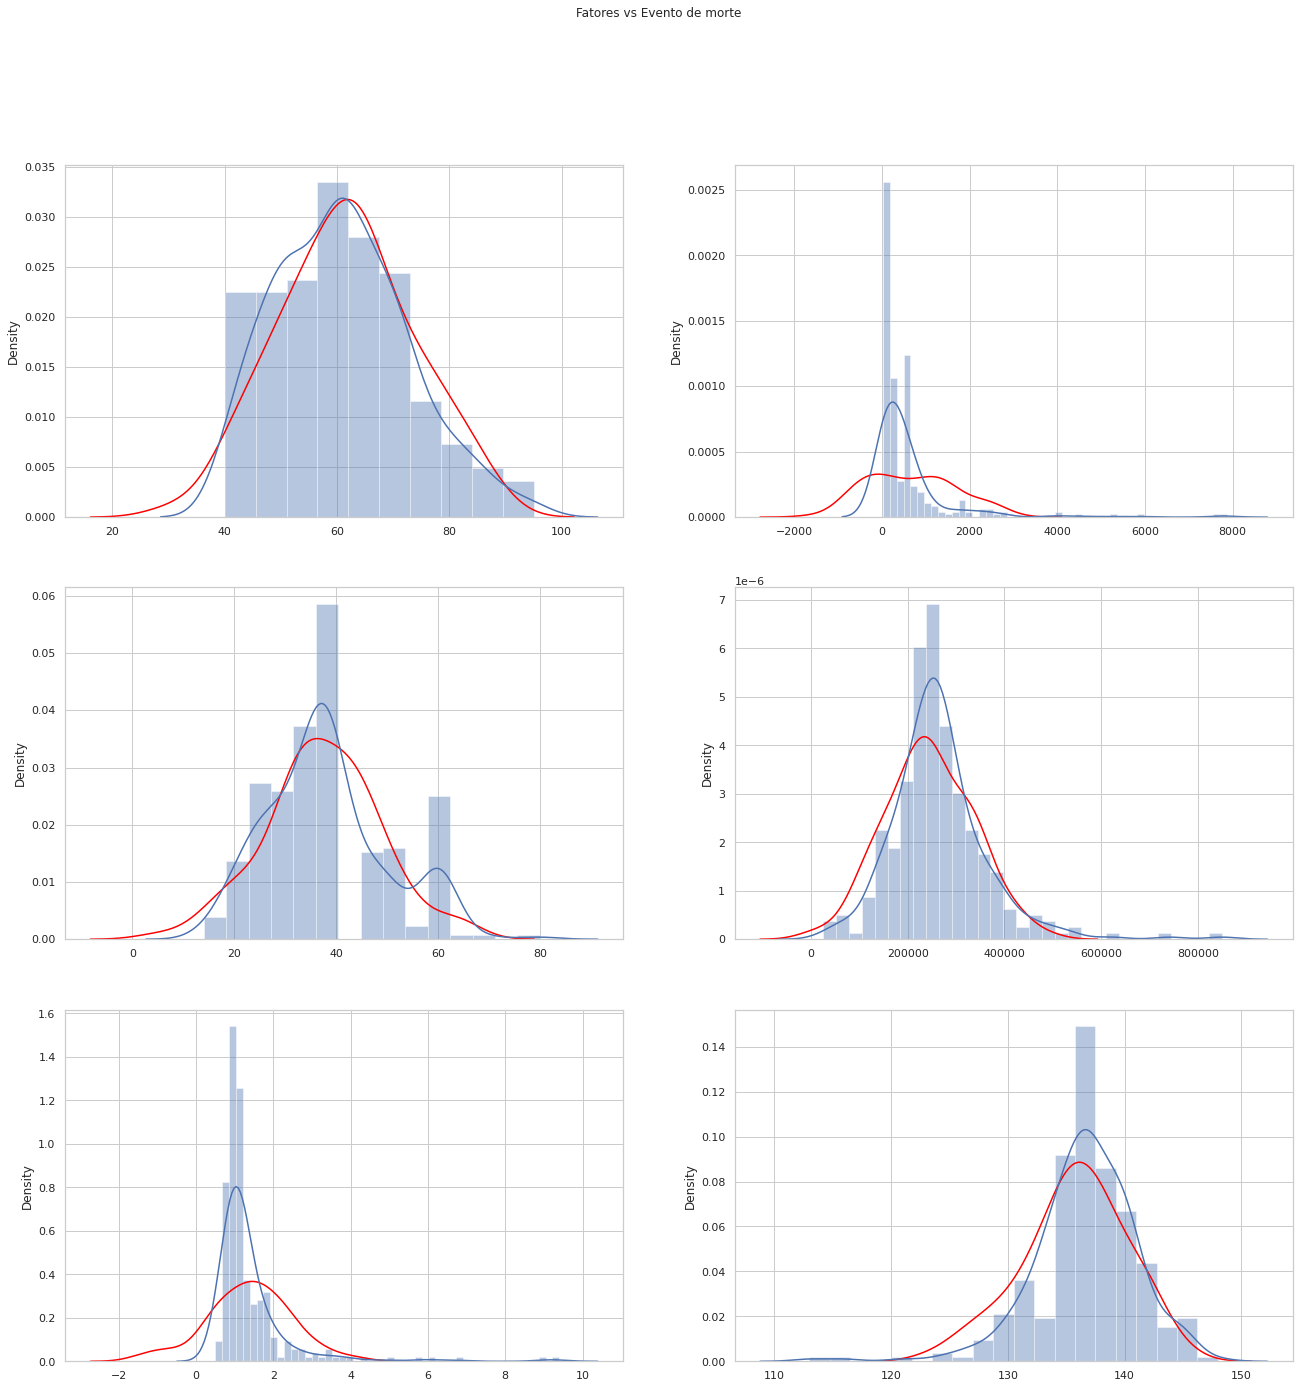

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(3, 2, figsize=(22, 22))

fig.suptitle('Fatores vs Evento de morte')

np.random.seed(0)
X = df['age'].mean() + np.random.randn(100) * df['age'].std()
sns.distplot( x=X , color="red", ax=axes[0, 0], kde=True, hist=False)
sns.distplot(ax=axes[0, 0], x=df['age'], kde=True)

X = df['creatinine_phosphokinase'].mean() + np.random.randn(100) * df['creatinine_phosphokinase'].std()
sns.distplot( x=X , color="red", ax=axes[0, 1], kde=True, hist=False)
sns.distplot(ax=axes[0, 1], x=df['creatinine_phosphokinase'],  kde=True)

X = df['ejection_fraction'].mean() + np.random.randn(100) * df['ejection_fraction'].std()
sns.distplot( x=X , color="red", ax=axes[1, 0], kde=True, hist=False)
sns.distplot(ax=axes[1, 0], x=df['ejection_fraction'],  kde=True)

X = df['platelets'].mean() + np.random.randn(100) * df['platelets'].std() 
sns.distplot( x=X , color="red", ax=axes[1, 1], kde=True, hist=False)
sns.distplot(ax=axes[1, 1], x=df['platelets'],  kde=True)

X = df['serum_creatinine'].mean() + np.random.randn(100) * df['serum_creatinine'].std()
sns.distplot( x=X , color="red", ax=axes[2, 0], kde=True, hist=False)
sns.distplot(ax=axes[2, 0], x=df['serum_creatinine'],   kde=True)

X = df['serum_sodium'].mean() + np.random.randn(100) * df['serum_sodium'].std()
sns.distplot( x=X , color="red", ax=axes[2, 1], kde=True, hist=False)
sns.distplot(ax=axes[2, 1], x=df['serum_sodium'],   kde=True)

plt.show()

2. Os meus dados possuem alguma relação?

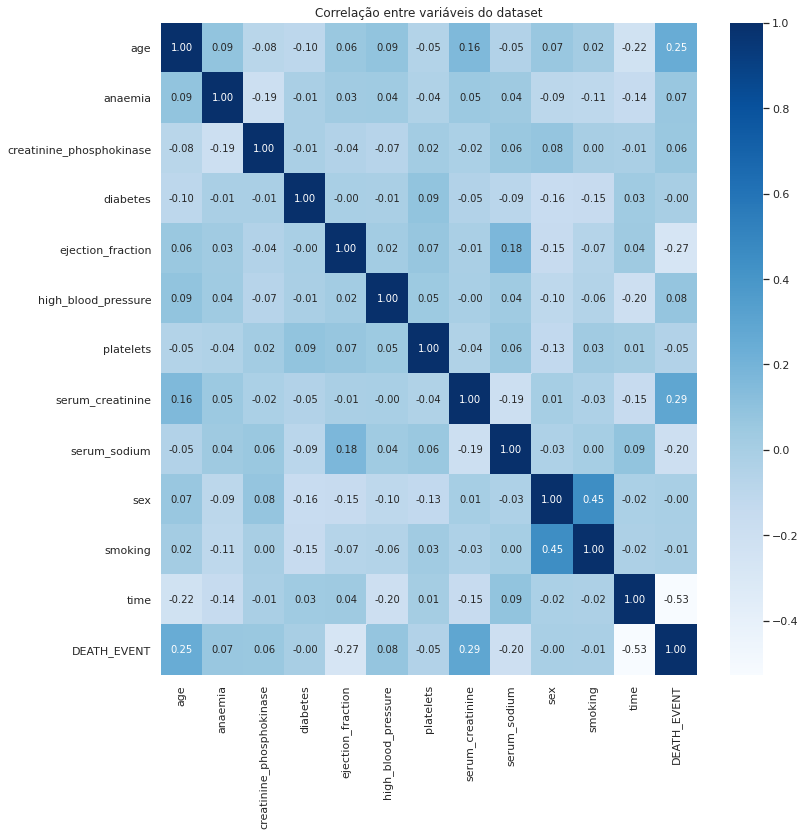

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

# Base reduzida 1 (SMOTE)

In [ ]:
X = df_sm.iloc[:,:-1].values
y = df_sm.iloc[:,-1].values

In [ ]:
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    acc = str(accuracy_score(y_test, y_pred))  
    #print("Acurácia:", acc)

    recall_acc = accuracy_score(y_test, y_pred)
    recall_accs.append(recall_acc)

print("Acurácia média:",np.mean(recall_accs))

cm = confusion_matrix(y_test, y_pred)

print("Matriz de confusão")
print(cm)

Acurácia média: 0.7993048780487806
Matriz de confusão
[[19  3]
 [ 5 13]]


1. Os meus dados numéricos estavam obedecendo uma distribuição normal?

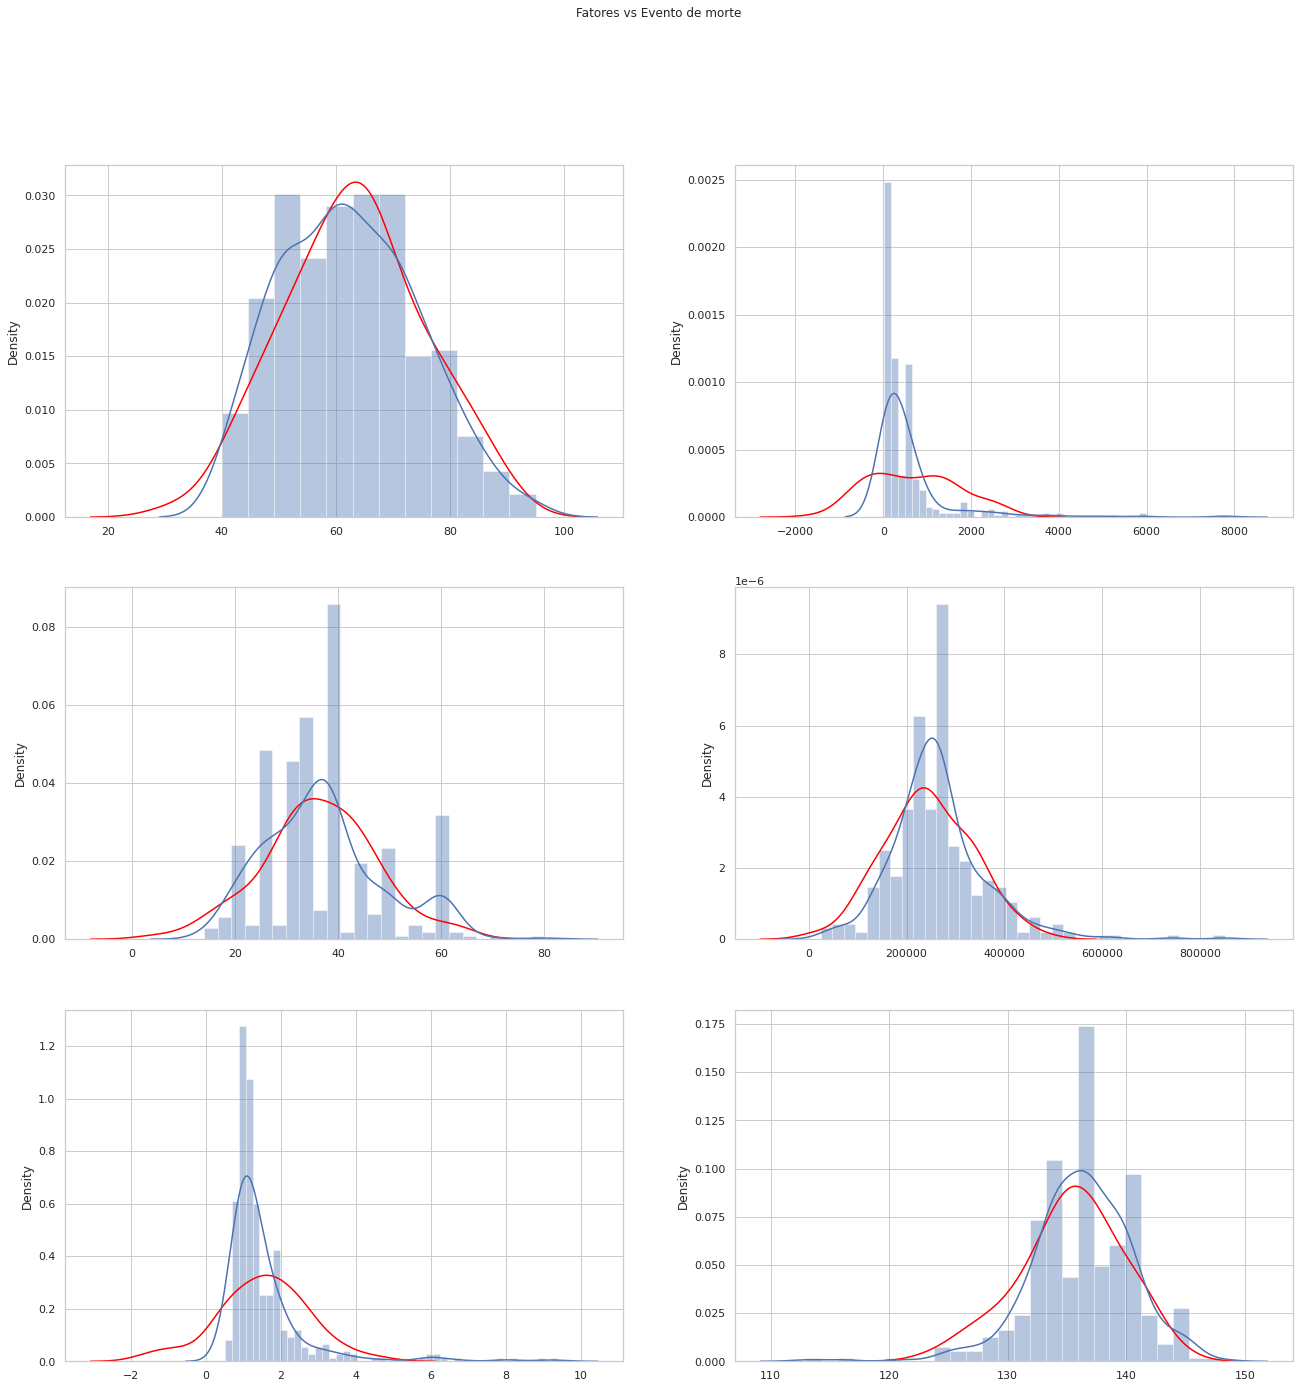

In [ ]:

fig, axes = plt.subplots(3, 2, figsize=(22, 22))

fig.suptitle('Fatores vs Evento de morte')

np.random.seed(0)
X = df_sm['age'].mean() + np.random.randn(100) * df_sm['age'].std()
sns.distplot( x=X , color="red", ax=axes[0, 0], kde=True, hist=False)
sns.distplot(ax=axes[0, 0], x=df_sm['age'], kde=True)

X = df_sm['creatinine_phosphokinase'].mean() + np.random.randn(100) * df_sm['creatinine_phosphokinase'].std()
sns.distplot( x=X , color="red", ax=axes[0, 1], kde=True, hist=False)
sns.distplot(ax=axes[0, 1], x=df_sm['creatinine_phosphokinase'],  kde=True)

X = df_sm['ejection_fraction'].mean() + np.random.randn(100) * df_sm['ejection_fraction'].std()
sns.distplot( x=X , color="red", ax=axes[1, 0], kde=True, hist=False)
sns.distplot(ax=axes[1, 0], x=df_sm['ejection_fraction'],  kde=True)

X = df_sm['platelets'].mean() + np.random.randn(100) * df_sm['platelets'].std() 
sns.distplot( x=X , color="red", ax=axes[1, 1], kde=True, hist=False)
sns.distplot(ax=axes[1, 1], x=df_sm['platelets'],  kde=True)

X = df_sm['serum_creatinine'].mean() + np.random.randn(100) * df_sm['serum_creatinine'].std()
sns.distplot( x=X , color="red", ax=axes[2, 0], kde=True, hist=False)
sns.distplot(ax=axes[2, 0], x=df_sm['serum_creatinine'],   kde=True)

X = df_sm['serum_sodium'].mean() + np.random.randn(100) * df_sm['serum_sodium'].std()
sns.distplot( x=X , color="red", ax=axes[2, 1], kde=True, hist=False)
sns.distplot(ax=axes[2, 1], x=df_sm['serum_sodium'],   kde=True)

plt.show()

2. Os meus dados possuem alguma relação?

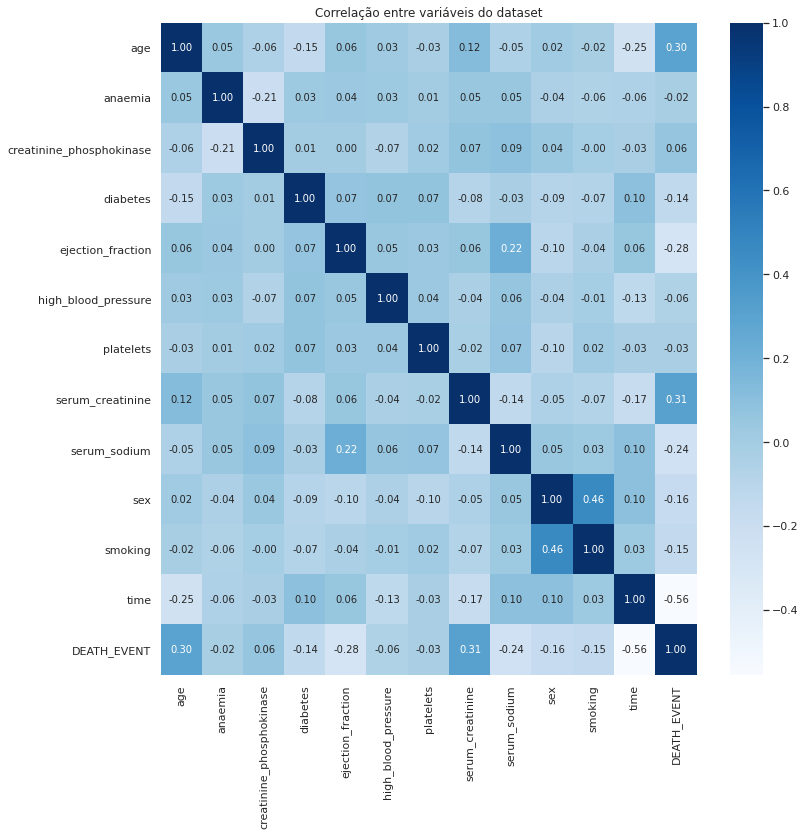

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_sm.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

# Base reduzida 2 (Correlação)

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

In [ ]:
recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    acc = str(accuracy_score(y_test, y_pred))  
    #print("Acurácia:", acc)

    recall_acc = accuracy_score(y_test, y_pred)
    recall_accs.append(recall_acc)

print("Acurácia média:",np.mean(recall_accs))

cm = confusion_matrix(y_test, y_pred)

print("Matriz de confusão")
print(cm)

Acurácia média: 0.828841463414634
Matriz de confusão
[[20  2]
 [ 4 14]]


1. Os meus dados numéricos estavam obedecendo uma distribuição normal?

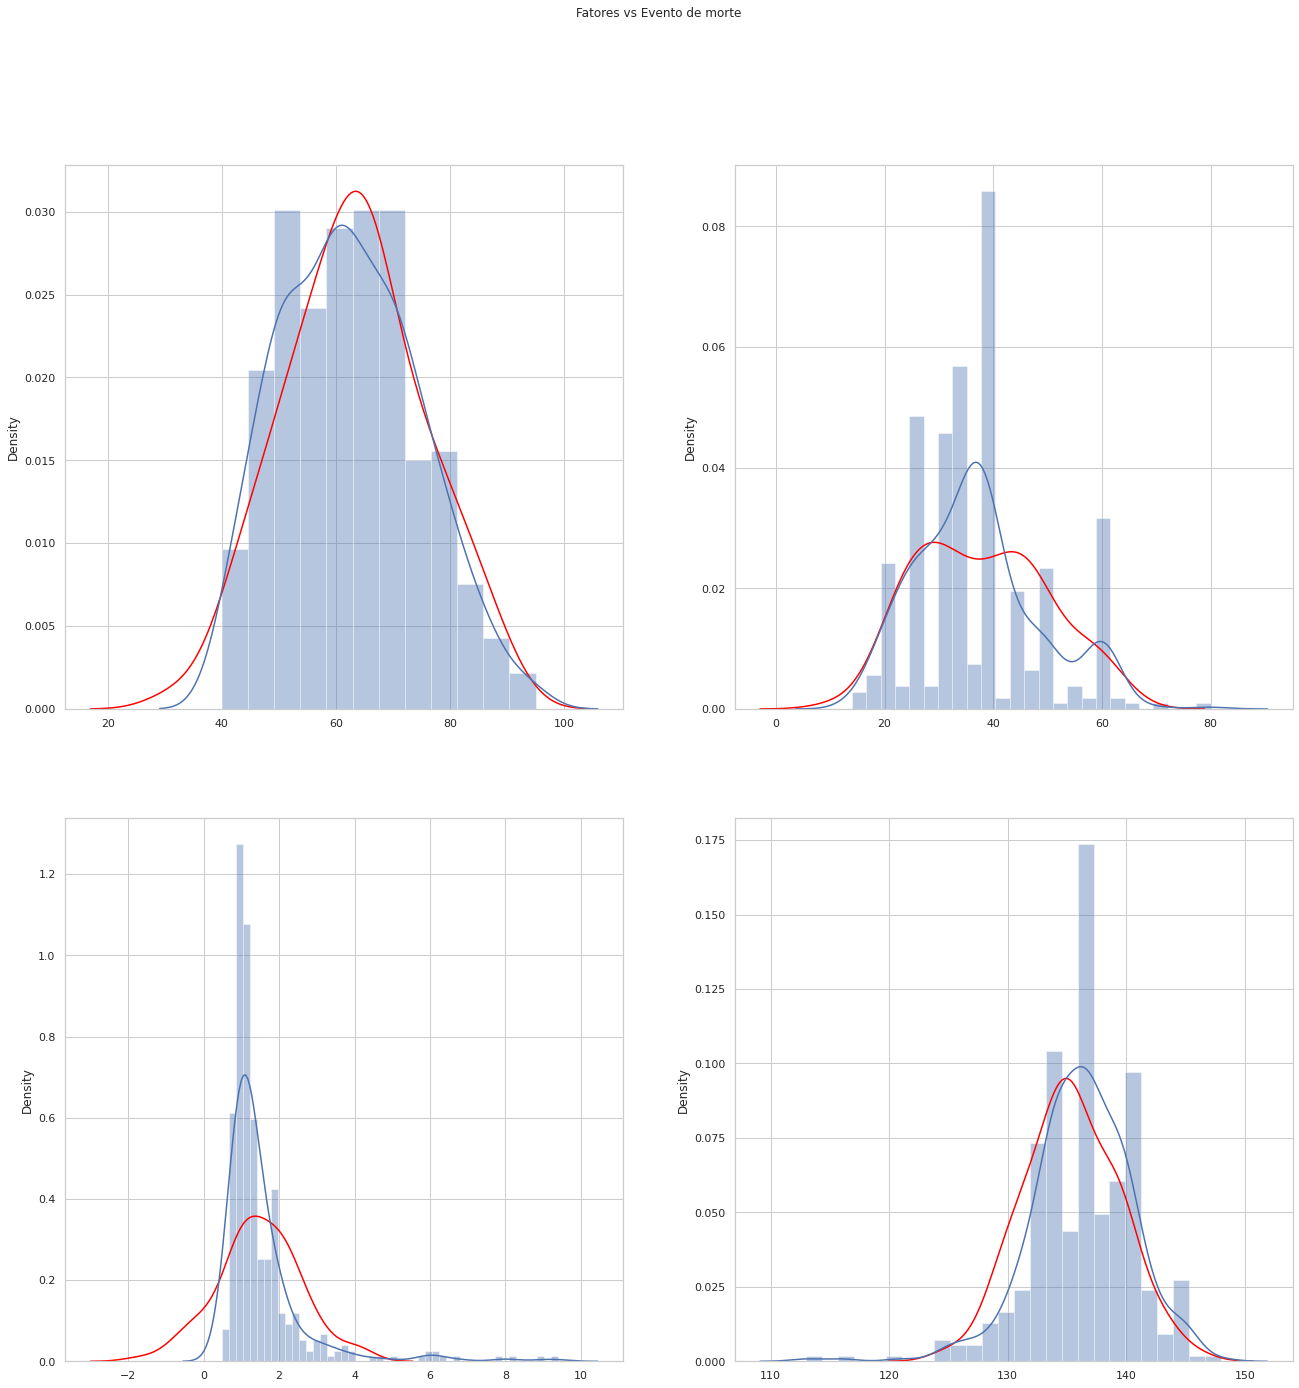

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(22, 22))

fig.suptitle('Fatores vs Evento de morte')

np.random.seed(0)
X = corr['age'].mean() + np.random.randn(100) * corr['age'].std()
sns.distplot( x=X , color="red", ax=axes[0, 0], kde=True, hist=False)
sns.distplot(ax=axes[0, 0], x=corr['age'], kde=True)

X = corr['ejection_fraction'].mean() + np.random.randn(100) * corr['ejection_fraction'].std()
sns.distplot( x=X , color="red", ax=axes[0, 1], kde=True, hist=False)
sns.distplot(ax=axes[0, 1], x=corr['ejection_fraction'],  kde=True)

X = corr['serum_creatinine'].mean() + np.random.randn(100) * corr['serum_creatinine'].std()
sns.distplot( x=X , color="red", ax=axes[1, 0], kde=True, hist=False)
sns.distplot(ax=axes[1, 0], x=corr['serum_creatinine'],   kde=True)

X = corr['serum_sodium'].mean() + np.random.randn(100) * corr['serum_sodium'].std()
sns.distplot( x=X , color="red", ax=axes[1, 1], kde=True, hist=False)
sns.distplot(ax=axes[1, 1], x=corr['serum_sodium'],   kde=True)

plt.show()

2. Os meus dados possuem alguma relação?

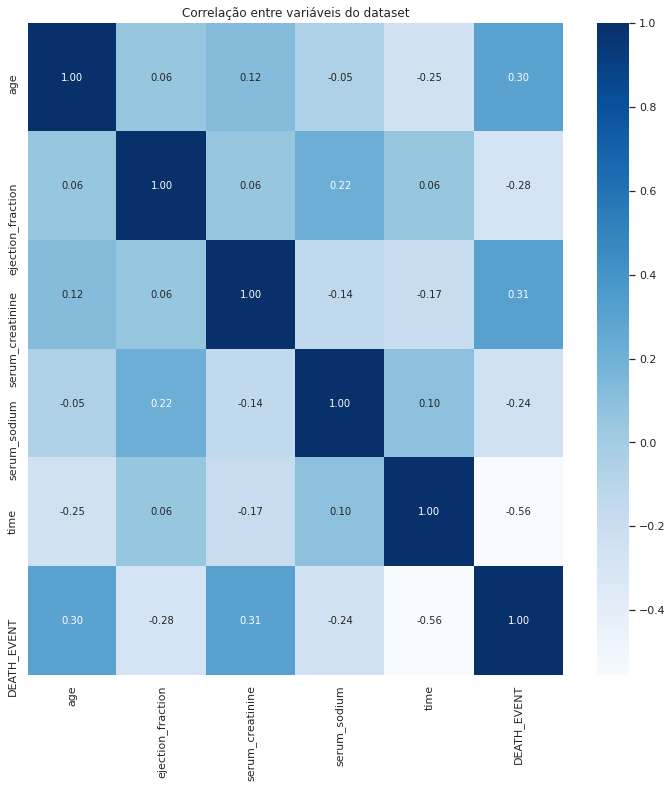

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

# Base reduzida 3 (PCA)

In [ ]:
X = finalDf.iloc[:,:-1].values
y = finalDf.iloc[:,-1].values

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    acc = str(accuracy_score(y_test, y_pred))  
    #print("Acurácia:", acc)

    recall_acc = accuracy_score(y_test, y_pred)
    recall_accs.append(recall_acc)

print("Acurácia média:",np.mean(recall_accs))

cm = confusion_matrix(y_test, y_pred)

print("Matriz de confusão")
print(cm)

Acurácia média: 0.8095975609756096
Matriz de confusão
[[20  2]
 [ 3 15]]


1. Os meus dados numéricos estavam obedecendo uma distribuição normal?

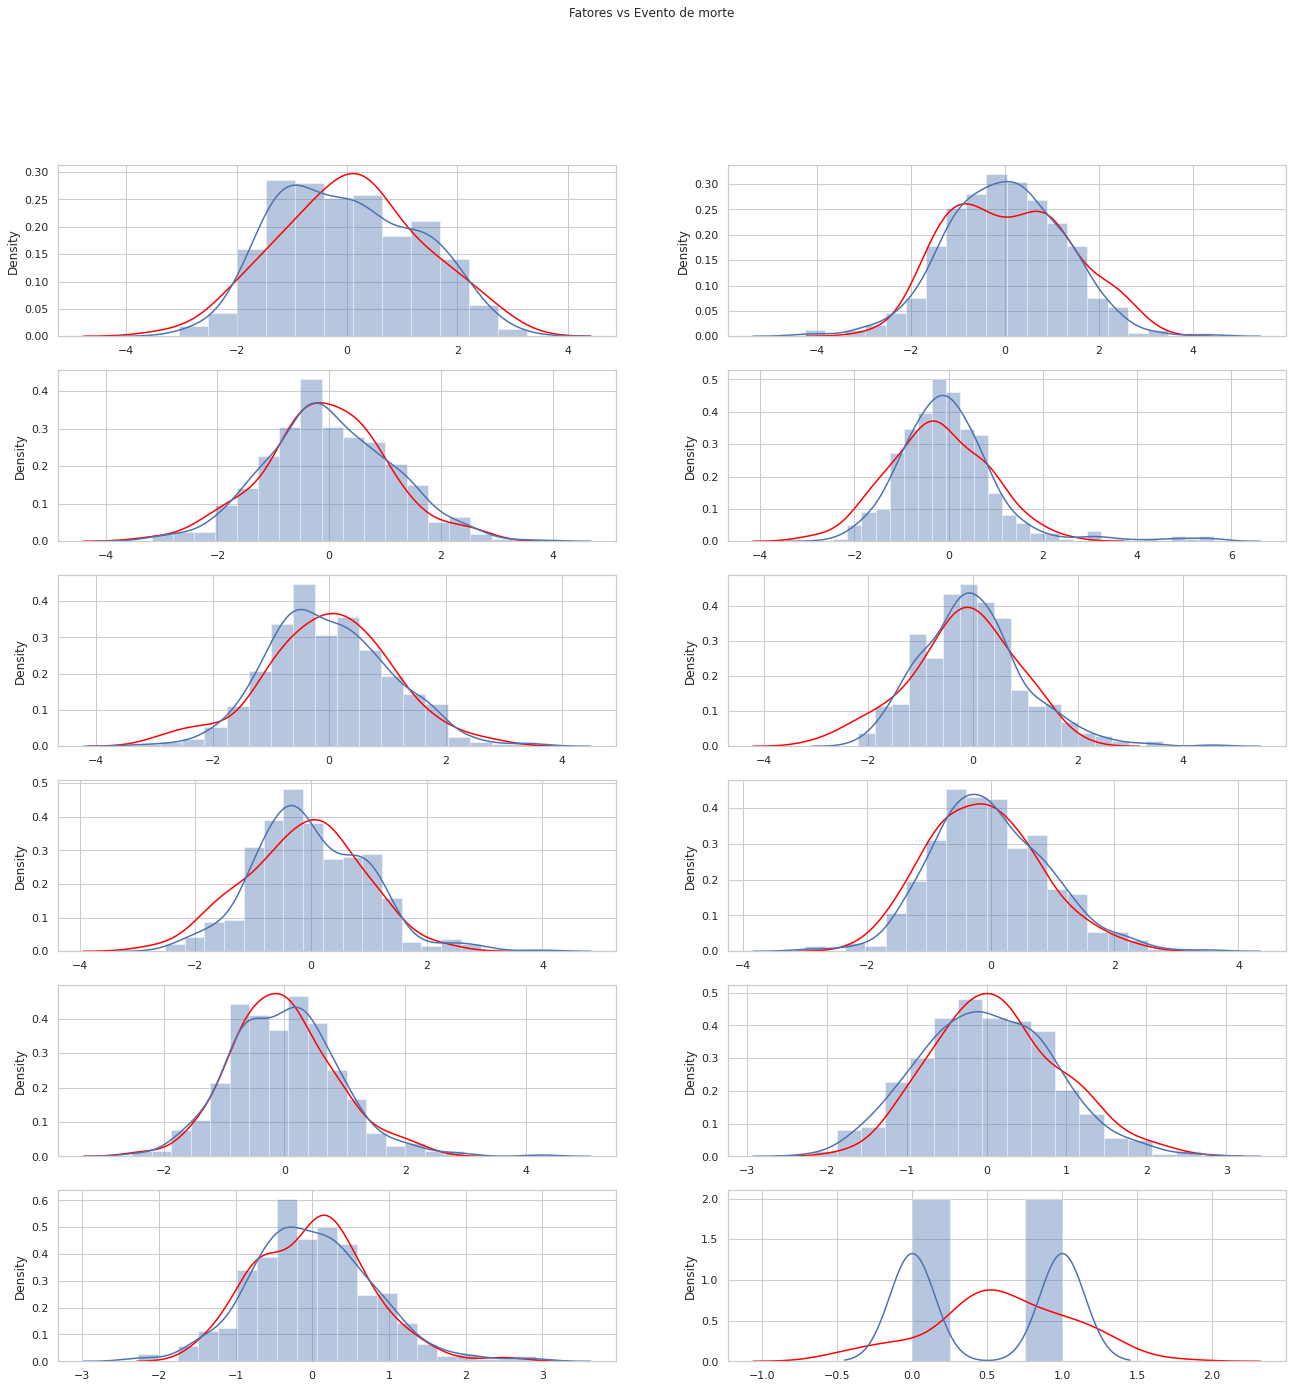

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(22, 22))

fig.suptitle('Fatores vs Evento de morte')

np.random.seed(0)
X = finalDf[0].mean() + np.random.randn(100) * finalDf[0].std()
sns.distplot( x=X , color="red", ax=axes[0, 0], kde=True, hist=False)
sns.distplot(ax=axes[0, 0], x=finalDf[0], kde=True)

X = finalDf[1].mean() + np.random.randn(100) * finalDf[1].std()
sns.distplot( x=X , color="red", ax=axes[0, 1], kde=True, hist=False)
sns.distplot(ax=axes[0, 1], x=finalDf[1],  kde=True)

X = finalDf[2].mean() + np.random.randn(100) * finalDf[2].std()
sns.distplot( x=X , color="red", ax=axes[1, 0], kde=True, hist=False)
sns.distplot(ax=axes[1, 0], x=finalDf[2],   kde=True)

X = finalDf[3].mean() + np.random.randn(100) * finalDf[3].std()
sns.distplot( x=X , color="red", ax=axes[1, 1], kde=True, hist=False)
sns.distplot(ax=axes[1, 1], x=finalDf[3],   kde=True)

X = finalDf[4].mean() + np.random.randn(100) * finalDf[4].std()
sns.distplot( x=X , color="red", ax=axes[2, 0], kde=True, hist=False)
sns.distplot(ax=axes[2, 0], x=finalDf[4],   kde=True)

X = finalDf[5].mean() + np.random.randn(100) * finalDf[5].std()
sns.distplot( x=X , color="red", ax=axes[2, 1], kde=True, hist=False)
sns.distplot(ax=axes[2, 1], x=finalDf[5],   kde=True)

X = finalDf[6].mean() + np.random.randn(100) * finalDf[6].std()
sns.distplot( x=X , color="red", ax=axes[3, 0], kde=True, hist=False)
sns.distplot(ax=axes[3, 0], x=finalDf[6],   kde=True)

X = finalDf[7].mean() + np.random.randn(100) * finalDf[7].std()
sns.distplot( x=X , color="red", ax=axes[3, 1], kde=True, hist=False)
sns.distplot(ax=axes[3, 1], x=finalDf[7], kde=True)

X = finalDf[8].mean() + np.random.randn(100) * finalDf[8].std()
sns.distplot( x=X , color="red", ax=axes[4, 0], kde=True, hist=False)
sns.distplot(ax=axes[4, 0], x=finalDf[8],  kde=True)

X = finalDf[9].mean() + np.random.randn(100) * finalDf[9].std()
sns.distplot( x=X , color="red", ax=axes[4, 1], kde=True, hist=False)
sns.distplot(ax=axes[4, 1], x=finalDf[9],   kde=True)

X = finalDf[10].mean() + np.random.randn(100) * finalDf[10].std()
sns.distplot( x=X , color="red", ax=axes[5, 0], kde=True, hist=False)
sns.distplot(ax=axes[5, 0], x=finalDf[10],   kde=True)

X = finalDf['DEATH_EVENT'].mean() + np.random.randn(100) * finalDf['DEATH_EVENT'].std()
sns.distplot( x=X , color="red", ax=axes[5, 1], kde=True, hist=False)
sns.distplot(ax=axes[5, 1], x=finalDf['DEATH_EVENT'],   kde=True)


plt.show()

2. Os meus dados possuem alguma relação?

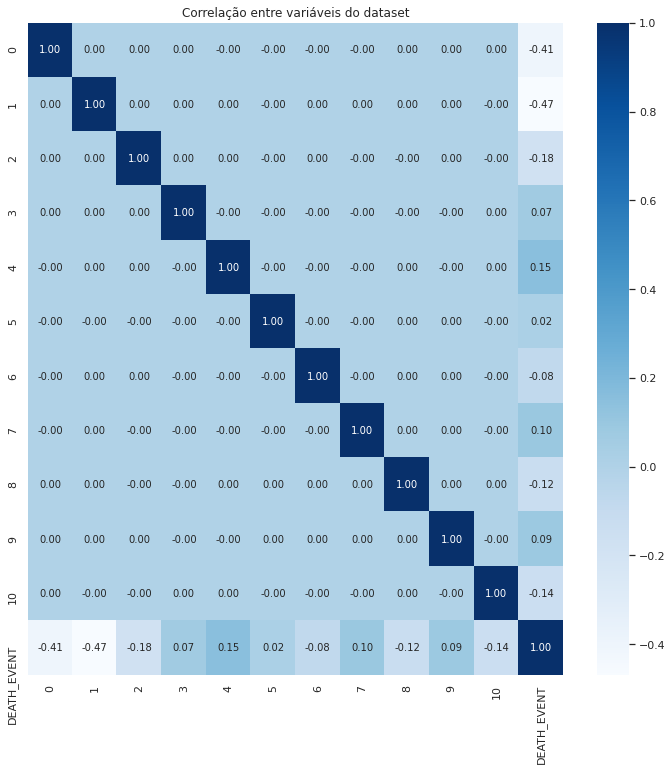

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(finalDf.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

# Redes Neurais
Para cada base de dados, serão feitos treinamentos de redes MLP usando o backpropagation padrão (com o termo momentum fixo de 0.8), variando-se os seguintes parâmetros:

1. Quantidade máxima de iterações (ou ciclos).
2. Quantidade de neurônios intermediários (ou escondidos) da rede --- serão usadas redes com apenas uma camada intermediária.
3. Taxa de aprendizado.

Para cada um destes três parâmetros, devem ser usados três valores. Sendo assim, o grupo deve escolher três valores diferentes para: quantidades máxima de iterações, quantidades de neurônios escondidos e taxa de aprendizado. 

Exemplo: poderiam ser usados 100, 1.000 e 10.000
iterações; 4, 8 e 12 neurônios escondidos; e taxas de aprendizado de 0.1, 0.01 e 0.001. Isto é apenas um exemplo.

O próprio grupo é quem vai escolher os valores a serem usados, dependendo do problema de classificação a ser resolvido. Vale a pena lembrar que não existem valores ideais que podem ser usados para qualquer problema, de modo que uma taxa de aprendizado de, por exemplo, 0.01 pode ser “pequena demais” para um determinado problema, sendo “grande demais” para outro. 

O mesmo é verdade para a quantidade de iterações e de nodos escondidos. Porém, para a taxa de aprendizado, há uma particularidade que o aluno deve obedecer.
O grupo não precisa escolher exatamente os valores supracitados, mas é necessário que o grupo escolha valores com granularidades diferentes. Portanto, deve-se escolher os seguintes valores 0.V; 0.0V e 0.00V, onde V pode ser qualquer valor inteiro no intervalo [1,9]. 

Para os outros dois parâmetros, é importantes que não seja escolhidos valores muitos próximos (por exemplo: 5, 7 e 9 neurônios na camada escondida), para que tenhamos um quadro mais genérico do comportamento da rede quando variando estes parâmetros. Uma sugestão para o número de neurônios seria: usar o valor (num. Att + num. classes)/2 como ponto de partida. Para o numero de iterações, a minha sugestão seria 100, 1.000 e 10.000, como sugerida acima.

Para a execução do treinamento, para cada combinação dos três parâmetros supracitados, deve-se usar um método 2-fold-cross-validation, sendo anotados os respectivos resultados. Portanto, devem ser executados 3 x 3 x 3 = 27 treinamentos preliminares. Uma vez feita as 27 execuções, deve ser escolhida a melhor rede obtida. Em outras palavras, o grupo irá escolher a melhor combinação de valores para estes três parâmetros. Define-se como “melhor rede” a rede que proporcionou os melhores resultados, sendo o mais compacta possível. 

Uma boa escolha pode ser baseada no erro (ou precisão) do conjunto de treinamento e no tamanho da rede. Exemplo: se o menor erro de treinamento foi obtido usando 1.000 iterações, oito nodos escondidos e taxa de aprendizado de 0.001, então este pode ser considerado o melhor conjunto de parâmetros (ou seja, a
melhor rede). Caso haja um empate nas precisões de mais de uma rede, dê  prioridade as redes mais simples. Para o conjunto de parâmetros escolhido (melhor rede), deve ser aplicado o 10-fold cross validation.

Aqui, o aluno deve tentar responder as seguintes perguntas:
1. Qual intervalo de valores a rede estava com underfitting ou com overfitting?
2. O que acontece quando eu fixo os dois parâmetros e vario a taxa de aprendizado?
3. E se o aluno fixar dois parâmetros e variar o numero de neurônios na camada
escondida, o que acontece? A mesma pergunta para o numero de iterações?

In [ ]:
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

# MLP - Base original

## Busca de melhores parâmetros

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

mlp_gs = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1)

parameters = {'max_iter':[100, 1000, 10000], 'hidden_layer_sizes':[100, 1000, 10000], 'learning_rate_init':[0.1, 0.01, 0.001]}

clf = GridSearchCV(mlp_gs, parameters, cv=2, n_jobs=-1, return_train_score=True)
clf.fit(X_train, y_train)

print('Resultado do GridSearch:')
means_train = clf.cv_results_['mean_train_score']
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, clf.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('\nMelhores parametros:\n', clf.best_params_)

Resultado do GridSearch:
Treino: 69.196% Test: 69.196% std: (+/-0.009) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 100}
Treino: 69.196% Test: 69.196% std: (+/-0.009) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 1000}
Treino: 69.196% Test: 69.196% std: (+/-0.009) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 10000}
Treino: 69.196% Test: 69.196% std: (+/-0.009) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 100}
Treino: 69.196% Test: 69.196% std: (+/-0.009) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 1000}
Treino: 69.196% Test: 69.196% std: (+/-0.009) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 10000}
Treino: 69.196% Test: 69.196% std: (+/-0.009) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.001, 'max_iter': 100}
Treino: 69.196% Test: 69.196% std: (+/-0.009) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.001, 'ma

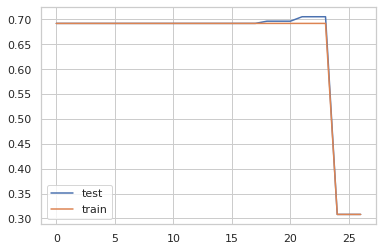

In [ ]:
test_scores = clf.cv_results_['mean_test_score']
train_scores = clf.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

# Treinar MLP com melhores parâmetros

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [ ]:
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=990)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]

    mlp_original = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(10000), learning_rate_init=0.01, max_iter=100)
    mlp_original.fit(X_train, y_train)
    y_pred = mlp_original.predict(X_test)
    acc = str(accuracy_score(y_test, y_pred))  
    #print("Acurácia:", acc)

    recall_acc = accuracy_score(y_test, y_pred)
    recall_accs.append(recall_acc)

print("Acurácia média:",np.mean(recall_accs))

cm = confusion_matrix(y_test, y_pred)

print("Matriz de confusão")
print(cm)

Acurácia média: 0.6788505747126439
Matriz de confusão
[[19  0]
 [10  0]]


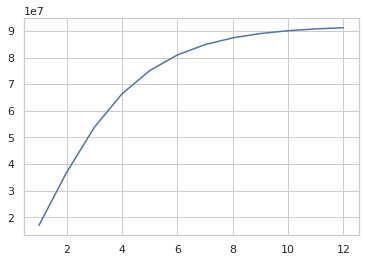

In [ ]:
plt.plot(mlp_original.loss_curve_, label='Loss')

plt.show()

# Melhor base

Média e desvio padrão

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

model = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(10000), learning_rate_init=0.01, max_iter=100)

#create model, perform Repeated CV and evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.679 (0.081)


1. Qual intervalo de valores a rede estava com underfitting ou com overfitting?

2. O que acontece quando eu fixo os dois parâmetros e vario a taxa de aprendizado?

3. E se o aluno fixar dois parâmetros e variar o numero de neurônios na camada escondida, o que acontece? A mesma pergunta para o numero de iterações?

# MLP - Base reduzida 1

## Busca de melhores parâmetros

In [ ]:
X = df_sm.iloc[:,:-1].values
y = df_sm.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.model_selection import GridSearchCV

mlp_gs = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1)

parameters = {'max_iter':[100, 1000, 10000], 'hidden_layer_sizes':[100, 1000, 10000], 'learning_rate_init':[0.1, 0.01, 0.001]}

clf = GridSearchCV(mlp_gs, parameters, cv=2, n_jobs=-1, return_train_score=True)
clf.fit(X_train, y_train)

print('Resultado do GridSearch:')
means_train = clf.cv_results_['mean_train_score']
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, clf.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('\nMelhores parametros:\n', clf.best_params_)

Resultado do GridSearch:
Treino: 52.632% Test: 52.632% std: (+/-0.000) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 100}
Treino: 52.632% Test: 52.632% std: (+/-0.000) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 1000}
Treino: 52.632% Test: 52.632% std: (+/-0.000) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 10000}
Treino: 52.632% Test: 52.632% std: (+/-0.000) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 100}
Treino: 52.632% Test: 52.632% std: (+/-0.000) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 1000}
Treino: 52.632% Test: 52.632% std: (+/-0.000) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 10000}
Treino: 47.368% Test: 47.368% std: (+/-0.000) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.001, 'max_iter': 100}
Treino: 47.368% Test: 47.368% std: (+/-0.000) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.001, 'ma

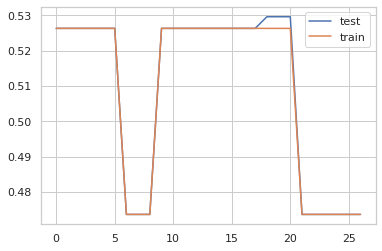

In [ ]:
test_scores = clf.cv_results_['mean_test_score']
train_scores = clf.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

# Treinar MLP com melhores parâmetros

In [ ]:
X = df_sm.iloc[:,:-1].values
y = df_sm.iloc[:,-1].values

In [ ]:
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=990)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]

    mlp_base1 = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(100), learning_rate_init=0.01, max_iter=100)
    mlp_base1.fit(X_train, y_train)
    y_pred = mlp_base1.predict(X_test)
    acc = str(accuracy_score(y_test, y_pred))  
    #print("Acurácia:", acc)

    recall_acc = accuracy_score(y_test, y_pred)
    recall_accs.append(recall_acc)

print("Acurácia média:",np.mean(recall_accs))

cm = confusion_matrix(y_test, y_pred)

print("Matriz de confusão")
print(cm)

Acurácia média: 0.4663536585365854
Matriz de confusão
[[16  0]
 [24  0]]


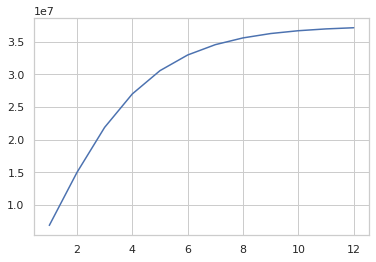

In [ ]:
plt.plot(mlp_base1.loss_curve_, label='Loss')

plt.show()

1. Qual intervalo de valores a rede estava com underfitting ou com overfitting?

2. O que acontece quando eu fixo os dois parâmetros e vario a taxa de aprendizado?

3. E se o aluno fixar dois parâmetros e variar o numero de neurônios na camada escondida, o que acontece? A mesma pergunta para o numero de iterações?

# MLP - Base reduzida 2

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.model_selection import GridSearchCV

mlp_gs = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1)

parameters = {'max_iter':[100, 1000, 10000], 'hidden_layer_sizes':[100, 1000, 10000], 'learning_rate_init':[0.1, 0.01, 0.001]}

clf = GridSearchCV(mlp_gs, parameters, cv=2, n_jobs=-1, return_train_score=True)
clf.fit(X_train, y_train)

print('Resultado do GridSearch:')
means_train = clf.cv_results_['mean_train_score']
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, clf.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('\nMelhores parametros:\n', clf.best_params_)

Resultado do GridSearch:
Treino: 52.632% Test: 52.632% std: (+/-0.000) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 100}
Treino: 52.632% Test: 52.632% std: (+/-0.000) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 1000}
Treino: 52.632% Test: 52.632% std: (+/-0.000) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 10000}
Treino: 80.263% Test: 78.289% std: (+/-0.013) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 100}
Treino: 80.263% Test: 78.289% std: (+/-0.013) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 1000}
Treino: 80.263% Test: 78.289% std: (+/-0.013) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 10000}
Treino: 67.105% Test: 65.132% std: (+/-0.092) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.001, 'max_iter': 100}
Treino: 67.105% Test: 65.132% std: (+/-0.092) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.001, 'ma

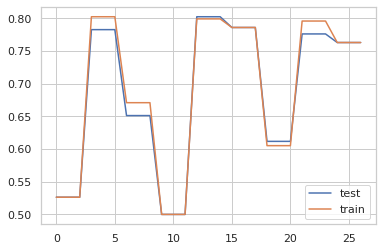

In [ ]:
test_scores = clf.cv_results_['mean_test_score']
train_scores = clf.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

#Treinar MLP com melhores parâmetros

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

In [ ]:
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=990)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]

    mlp_base2 = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(10000), learning_rate_init=0.01, max_iter=100)
    mlp_base2.fit(X_train, y_train)
    y_pred = mlp_base2.predict(X_test)
    acc = str(accuracy_score(y_test, y_pred))  
    #print("Acurácia:", acc)

    recall_acc = accuracy_score(y_test, y_pred)
    recall_accs.append(recall_acc)

print("Acurácia média:",np.mean(recall_accs))

cm = confusion_matrix(y_test, y_pred)

print("Matriz de confusão")
print(cm)

Acurácia média: 0.7902987804878048
Matriz de confusão
[[15  1]
 [11 13]]


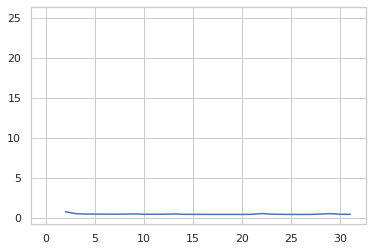

In [ ]:
plt.plot(mlp_base2.loss_curve_, label='Loss')

plt.show()

1. Qual intervalo de valores a rede estava com underfitting ou com overfitting?

2. O que acontece quando eu fixo os dois parâmetros e vario a taxa de aprendizado?

3. E se o aluno fixar dois parâmetros e variar o numero de neurônios na camada escondida, o que acontece? A mesma pergunta para o numero de iterações?

# MLP - Base reduzida 3

In [ ]:
X = finalDf.iloc[:,:-1].values
y = finalDf.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.model_selection import GridSearchCV

mlp_gs = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1)

parameters = {'max_iter':[100, 1000, 10000], 'hidden_layer_sizes':[100, 1000, 10000], 'learning_rate_init':[0.1, 0.01, 0.001]}

clf = GridSearchCV(mlp_gs, parameters, cv=2, n_jobs=-1, return_train_score=True)
clf.fit(X_train, y_train)

print('Resultado do GridSearch:')
means_train = clf.cv_results_['mean_train_score']
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean_t, mean, std, params in zip(means_train, means, stds, clf.cv_results_['params']):
    print("Treino: %0.3f%% Test: %0.3f%% std: (+/-%0.03f) for %r" % (mean_t*100.0, mean*100.0, std * 2, params))

print('\nMelhores parametros:\n', clf.best_params_)

Resultado do GridSearch:
Treino: 95.395% Test: 81.908% std: (+/-0.059) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 100}
Treino: 100.000% Test: 82.237% std: (+/-0.053) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 1000}
Treino: 100.000% Test: 82.237% std: (+/-0.053) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 10000}
Treino: 86.184% Test: 82.566% std: (+/-0.033) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 100}
Treino: 95.724% Test: 81.579% std: (+/-0.066) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 1000}
Treino: 96.711% Test: 81.908% std: (+/-0.072) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.01, 'max_iter': 10000}
Treino: 59.211% Test: 57.237% std: (+/-0.013) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.001, 'max_iter': 100}
Treino: 87.171% Test: 82.237% std: (+/-0.026) for {'hidden_layer_sizes': 100, 'learning_rate_init': 0.001, '

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


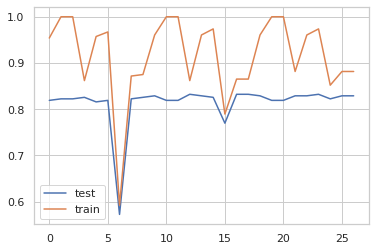

In [ ]:
test_scores = clf.cv_results_['mean_test_score']
train_scores = clf.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

#Treinar MLP com melhores parâmetros

In [ ]:
X = finalDf.iloc[:,:-1].values
y = finalDf.iloc[:,-1].values

In [ ]:
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=990)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]

    mlp_base3 = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(100), learning_rate_init=0.1, max_iter=1000)
    mlp_base3.fit(X_train, y_train)
    y_pred = mlp_base3.predict(X_test)
    acc = str(accuracy_score(y_test, y_pred))  
    #print("Acurácia:", acc)

    recall_acc = accuracy_score(y_test, y_pred)
    recall_accs.append(recall_acc)

print("Acurácia média:",np.mean(recall_accs))

cm = confusion_matrix(y_test, y_pred)

print("Matriz de confusão")
print(cm)

Acurácia média: 0.8379024390243903
Matriz de confusão
[[11  5]
 [ 0 24]]


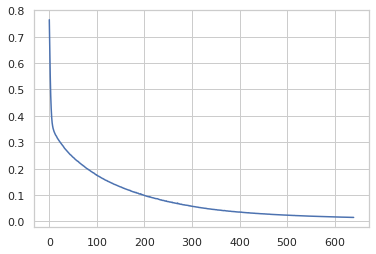

In [ ]:
plt.plot(mlp_base3.loss_curve_, label='Loss')

plt.show()

1. Qual intervalo de valores a rede estava com underfitting ou com overfitting?

2. O que acontece quando eu fixo os dois parâmetros e vario a taxa de aprendizado?

3. E se o aluno fixar dois parâmetros e variar o numero de neurônios na camada escondida, o que acontece? A mesma pergunta para o numero de iterações?

# Análise Comparativa:
Neste caso, é importante fazer duas análises:
1. Nesta primeira análise, o aluno deve responder se a redução de dados teve
impacto positivo ou negativo no desempenho dos modelos supervisionados. Para
responder a pergunta, monte a seguinte tabela: 

                          k-NN           AD              NB             NN 
        Base original  |Acurácia média |Acurácia média |Acurácia média |Acurácia média
        Base reduzida 1|Acurácia média |Acurácia média |Acurácia média |Acurácia média
        Base reduzida 2|Acurácia média |Acurácia média |Acurácia média |Acurácia média
        Base reduzida 3|Acurácia média |Acurácia média |Acurácia média |Acurácia média
        Média geral    |Acc Média geral|Acc Média geral|Acc Média geral|Acc Média gera
2. Nesta segunda análise, o aluno deve responder qual modelo obteve o melhor
desempenho na sua base dados. Para tal, analise a tabela descrita na tabela
anterior e escolha a base de dados com a melhor accurácia média e construa a
seguinte tabela:
                      k-NN    AD     NB     NN 
        Melhor base: Acc±DP Acc±DP Acc±DP Acc±DP

Onde:

Acc: é a mehor acurácia de todos os parâmetros analisados (quem está
trabalhando com regressão ao invés da acurácia usar a medida de erro MAPE);

DP: é o desvio padrão. Para calcular o DP, é preciso pegar as melhores
configurações e aplique o 3x10-fold CV, com seeds diferentes. Daí calcule o
desvio padrão destes 30 resultados.


# Checkpoint 3

## Modelos Não Supervisionados

Importação das bibliotecas de índices DB2 e Silhoutte

In [ ]:
from sklearn.metrics import davies_bouldin_score  #DB2
from sklearn.metrics import silhouette_score      #Silhoutte

## Divisão de dados

In [ ]:
# Base original
dados_orig = df.iloc[:,:-1].values
classes_orig = df.iloc[:,-1].values

# Base reduzida 1
dados_bs1 = df_sm.iloc[:,:-1].values
classes_bs1 = df_sm.iloc[:,-1].values

# Base reduzida 2
dados_bs2 = corr.iloc[:,:-1].values
classes_bs2 = corr.iloc[:,-1].values

# Base reduzida 3
dados_bs3 = finalDf.iloc[:,:-1].values
classes_bs3 = finalDf.iloc[:,-1].values

# K-Means

  k-means: serão feitos experimentos com k variando de 2 até 20.
  
  Por ser um método com inicialização, para cada valor de k, serão feitas 5 execuções (variando o valor da seed). Após os experimentos, serão calculados os índices DB e Silhouette de todos as partições geradas (agrupamentos construídos). 
  
  Uma vez calculado os índices DB e Silhouette, a média e o desvio padrão por valor de k são calculados para cada índice. Coloque os resultados em um gráfico
(modelo acima) para cada índice, onde o eixo x representa o valor de k e o
eixo y representa o respectivo índice.
  
  Para o DB, defina como o número de grupos mais adequado o que tiver o
MENOR índice DB. O comportamento inverso é esperado para o Silhouette,
quanto maior, melhor para a partição. Também defina o melhor número de grupos
para o Silhouette.


# Base original

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
seeds = [123, 321, 213, 231, 312]

meanDB2s = []
stdDB2s  = []

meanSilh = []
stdSilh  = []

km  = None

for k in range(2,21):

  #print('k = ', k)

  db2s = []
  silh = []

  for seed in seeds:
    km = KMeans(n_clusters=k, init='k-means++', max_iter = 300, n_init=10, random_state = seed)
    km.fit(dados_orig)
    km.fit_predict(dados_orig)
    centroids = km.cluster_centers_

    db2s.append(davies_bouldin_score(dados_orig, km.labels_))
    silh.append(silhouette_score(dados_orig, km.labels_))

  meanDB2s.append(np.mean(db2s))
  stdDB2s.append(np.std(db2s))

  meanSilh.append(np.mean(silh))
  stdSilh.append(np.std(silh))

#print(len(meanDB2s))

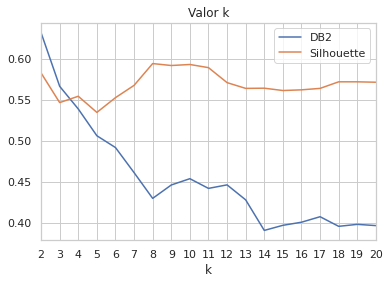

DB2:  0.4122009730700323
Silhoutte:  0.5722561012059323


In [ ]:
plt.title("Valor k")
plt.xlabel("k")
plt.plot(meanDB2s, label='DB2')
plt.plot(meanSilh, label='Silhouette')
plt.xticks(np.arange(20), range(2,21)) 
plt.xlim([0, 18])
plt.legend(loc='best')
plt.show()

print("DB2: ",davies_bouldin_score(dados_orig, km.labels_))
print("Silhoutte: ",silhouette_score(dados_orig, km.labels_))

In [ ]:
df["Cluster"] = km.labels_
df["Cluster"] = 'cluster' + df["Cluster"].astype(str)

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Cluster
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,cluster3
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,cluster3
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,cluster14
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,cluster0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,cluster16


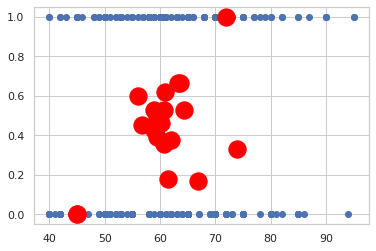

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=300)
plt.show()

# Base reduzida 1

In [ ]:
seeds = [123, 321, 213, 231, 312]

meanDB2s = []
stdDB2s  = []

meanSilh = []
stdSilh  = []

km  = None

for k in range(2,21):

  #print('k = ', k)

  db2s = []
  silh = []

  for seed in seeds:
    km = KMeans(n_clusters=k, init='k-means++', max_iter = 300, n_init=10, random_state = seed)
    km.fit(dados_bs1)
    km.fit_predict(dados_bs1)
    centroids = km.cluster_centers_

    db2s.append(davies_bouldin_score(dados_bs1, km.labels_))
    silh.append(silhouette_score(dados_bs1, km.labels_))

  meanDB2s.append(np.mean(db2s))
  stdDB2s.append(np.std(db2s))

  meanSilh.append(np.mean(silh))
  stdSilh.append(np.std(silh))

#print(len(meanDB2s))

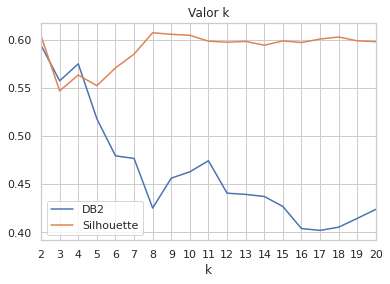

DB2:  0.4135479485631056
Silhoutte:  0.6050486864836405


In [ ]:
plt.title("Valor k")
plt.xlabel("k")
plt.plot(meanDB2s, label='DB2')
plt.plot(meanSilh, label='Silhouette')
plt.xticks(np.arange(20), range(2,21)) 
plt.xlim([0, 18])
plt.legend(loc='best')
plt.show()

print("DB2: ",davies_bouldin_score(dados_bs1, km.labels_))
print("Silhoutte: ",silhouette_score(dados_bs1, km.labels_))

# Base reduzida 2

In [ ]:
seeds = [123, 321, 213, 231, 312]

meanDB2s = []
stdDB2s  = []

meanSilh = []
stdSilh  = []

km  = None

for k in range(2,21):

  #print('k = ', k)

  db2s = []
  silh = []

  for seed in seeds:
    km = KMeans(n_clusters=k, init='k-means++', max_iter = 300, n_init=10, random_state = seed)
    km.fit(dados_bs2)
    km.fit_predict(dados_bs2)
    centroids = km.cluster_centers_

    db2s.append(davies_bouldin_score(dados_bs2, km.labels_))
    silh.append(silhouette_score(dados_bs2, km.labels_))

  meanDB2s.append(np.mean(db2s))
  stdDB2s.append(np.std(db2s))

  meanSilh.append(np.mean(silh))
  stdSilh.append(np.std(silh))

#print(len(meanDB2s))

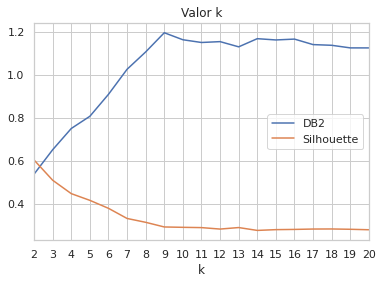

DB2:  1.1265466437745504
Silhoutte:  0.2844510645461281


In [ ]:
plt.title("Valor k")
plt.xlabel("k")
plt.plot(meanDB2s, label='DB2')
plt.plot(meanSilh, label='Silhouette')
plt.xticks(np.arange(20), range(2,21)) 
plt.xlim([0, 18])
plt.legend(loc='best')
plt.show()

print("DB2: ",davies_bouldin_score(dados_bs2, km.labels_))
print("Silhoutte: ",silhouette_score(dados_bs2, km.labels_))

# Base reduzida 3

In [ ]:
seeds = [123, 321, 213, 231, 312]

meanDB2s = []
stdDB2s  = []

meanSilh = []
stdSilh  = []

km  = None

for k in range(2,21):

  #print('k = ', k)

  db2s = []
  silh = []

  for seed in seeds:
    km = KMeans(n_clusters=k, init='k-means++', max_iter = 300, n_init=10, random_state = seed)
    km.fit(dados_bs3)
    km.fit_predict(dados_bs3)
    centroids = km.cluster_centers_

    db2s.append(davies_bouldin_score(dados_bs3, km.labels_))
    silh.append(silhouette_score(dados_bs3, km.labels_))

  meanDB2s.append(np.mean(db2s))
  stdDB2s.append(np.std(db2s))

  meanSilh.append(np.mean(silh))
  stdSilh.append(np.std(silh))

#print(len(meanDB2s))

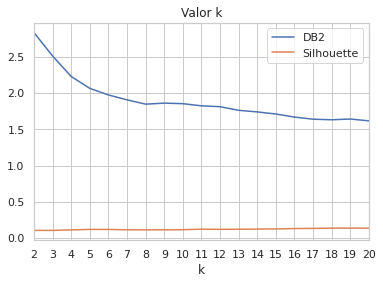

DB2:  1.5935285844721923
Silhoutte:  0.14241557684791917


In [ ]:
plt.title("Valor k")
plt.xlabel("k")
plt.plot(meanDB2s, label='DB2')
plt.plot(meanSilh, label='Silhouette')
plt.xticks(np.arange(20), range(2,21)) 
plt.xlim([0, 18])
plt.legend(loc='best')
plt.show()

print("DB2: ",davies_bouldin_score(dados_bs3, km.labels_))
print("Silhoutte: ",silhouette_score(dados_bs3, km.labels_))

# Hierárquico aglomerativo

  Hierárquico aglomerativo: Assim como no k-médias, serão feitos
experimentos com o numero de grupos variando de 2 até 20. 

Como este é um algoritmo determinístico, é necessário fazer apenas uma execução do algoritmo por valor de k, calculando na sequência os mesmos índices discutidos anteriormente. 

Além disso, crie os mesmos gráficos mostrados na seção 2.1.1, e
por fim, defina qual o melhor número de grupos para os três índices

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Base Original

In [ ]:

meanDB2s = []
stdDB2s  = []

meanSilh = []
stdSilh  = []

km  = None

for k in range(2,21):

  cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
  cluster.fit(dados_orig)
  cluster.fit_predict(dados_orig)

  meanDB2s.append(davies_bouldin_score(dados_orig, cluster.labels_))
  meanSilh.append(silhouette_score(dados_orig, cluster.labels_))

#print(len(meanDB2s))
print("Media DB2: ",np.mean(meanDB2s))
print("Desvio DB2: ",np.std(meanDB2s))

print("Media Silhoutte: ",np.mean(meanSilh))
print("Desvio Silhoutte: ",np.std(meanSilh))

Media DB2:  0.445371919268462
Desvio DB2:  0.04662685920853266
Media Silhoutte:  0.5141191384174202
Desvio Silhoutte:  0.05546881712866321


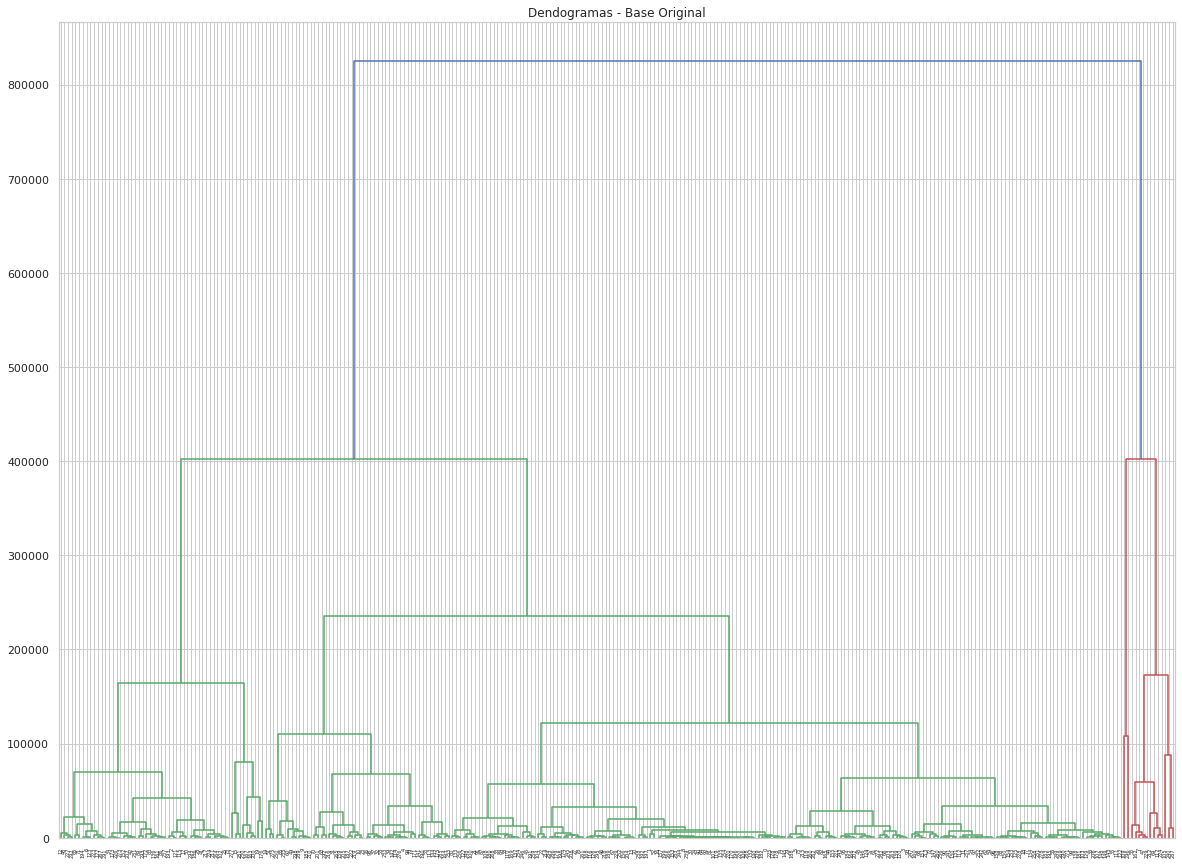

In [ ]:
plt.figure(figsize=(20,15))
plt.title("Dendogramas - Base Original")
dend = shc.dendrogram(shc.linkage(dados_orig, method='complete'))
plt.show()

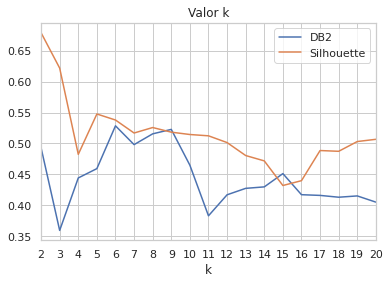

DB2:  0.4052301840143861
Silhoutte:  0.5067503531058845


In [ ]:
plt.title("Valor k")
plt.xlabel("k")
plt.plot(meanDB2s, label='DB2')
plt.plot(meanSilh, label='Silhouette')
plt.xticks(np.arange(20), range(2,21)) 
plt.xlim([0, 18])
plt.legend(loc='best')
plt.show()

print("DB2: ",davies_bouldin_score(dados_orig, cluster.labels_))
print("Silhoutte: ",silhouette_score(dados_orig, cluster.labels_))

# Base Reduzida 1

In [ ]:

meanDB2s = []
stdDB2s  = []

meanSilh = []
stdSilh  = []

km  = None

for k in range(2,21):

  cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
  cluster.fit(dados_bs1)
  cluster.fit_predict(dados_bs1)

  meanDB2s.append(davies_bouldin_score(dados_bs1, cluster.labels_))
  meanSilh.append(silhouette_score(dados_bs1, cluster.labels_))

#print(len(meanDB2s))
print("Media DB2: ",np.mean(meanDB2s))
print("Desvio DB2: ",np.std(meanDB2s))

print("Media Silhoutte: ",np.mean(meanSilh))
print("Desvio Silhoutte: ",np.std(meanSilh))

Media DB2:  0.4303022711123708
Desvio DB2:  0.041556566035171244
Media Silhoutte:  0.5440837953856006
Desvio Silhoutte:  0.03430982436885922


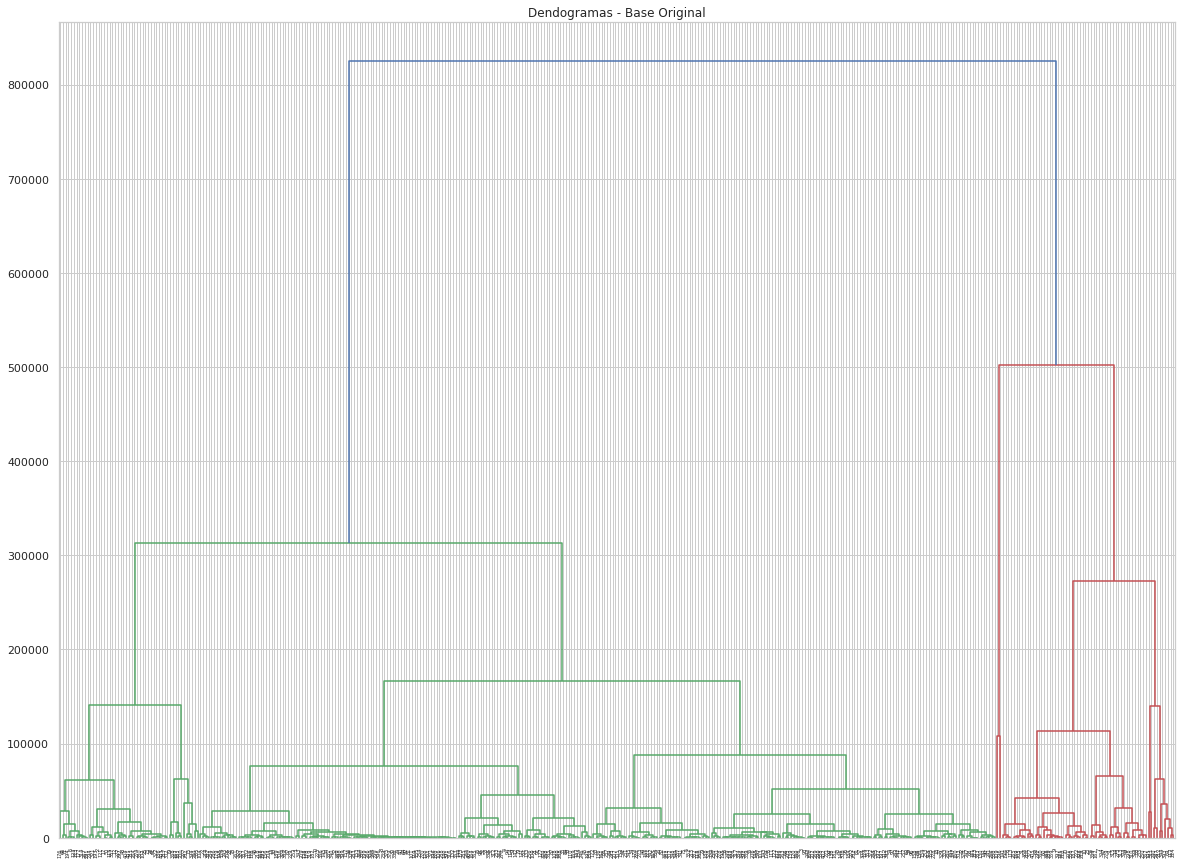

In [ ]:
plt.figure(figsize=(20,15))
plt.title("Dendogramas - Base Original")
dend = shc.dendrogram(shc.linkage(dados_bs1, method='complete'))
plt.show()

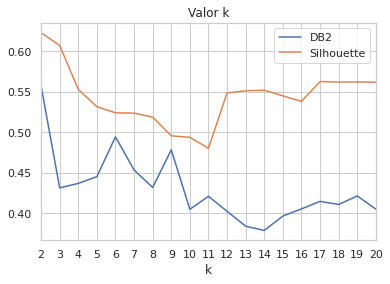

DB2:  0.40515370899391573
Silhoutte:  0.5620494684327928


In [ ]:
plt.title("Valor k")
plt.xlabel("k")
plt.plot(meanDB2s, label='DB2')
plt.plot(meanSilh, label='Silhouette')
plt.xticks(np.arange(20), range(2,21)) 
plt.xlim([0, 18])
plt.legend(loc='best')
plt.show()

print("DB2: ",davies_bouldin_score(dados_bs1, cluster.labels_))
print("Silhoutte: ",silhouette_score(dados_bs1, cluster.labels_))

# Base Reduzida 2

In [ ]:

meanDB2s = []
stdDB2s  = []

meanSilh = []
stdSilh  = []

km  = None

for k in range(2,21):

  cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
  cluster.fit(dados_bs2)
  cluster.fit_predict(dados_bs2)

  meanDB2s.append(davies_bouldin_score(dados_bs2, cluster.labels_))
  meanSilh.append(silhouette_score(dados_bs2, cluster.labels_))

#print(len(meanDB2s))
print("Media DB2: ",np.mean(meanDB2s))
print("Desvio DB2: ",np.std(meanDB2s))

print("Media Silhoutte: ",np.mean(meanSilh))
print("Desvio Silhoutte: ",np.std(meanSilh))

Media DB2:  1.020168661043302
Desvio DB2:  0.20354289632337866
Media Silhoutte:  0.3163729659850444
Desvio Silhoutte:  0.0993300678557548


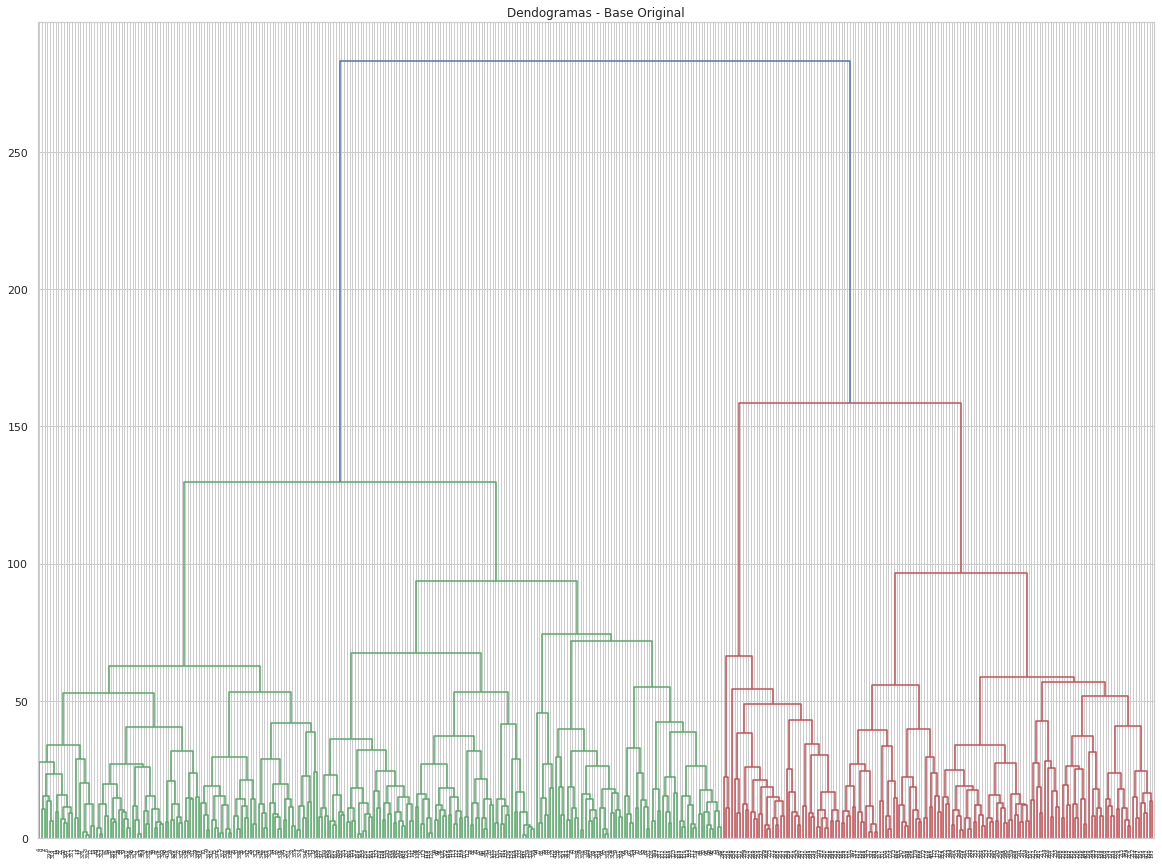

In [ ]:
plt.figure(figsize=(20,15))
plt.title("Dendogramas - Base Original")
dend = shc.dendrogram(shc.linkage(dados_bs2, method='complete'))
plt.show()

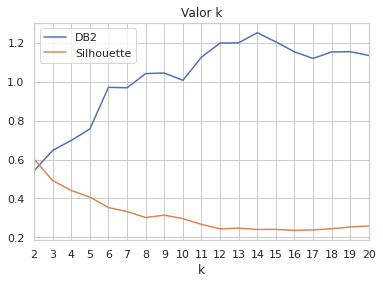

DB2:  1.1353293157291426
Silhoutte:  0.25874919503221266


In [ ]:
plt.title("Valor k")
plt.xlabel("k")
plt.plot(meanDB2s, label='DB2')
plt.plot(meanSilh, label='Silhouette')
plt.xticks(np.arange(20), range(2,21)) 
plt.xlim([0, 18])
plt.legend(loc='best')
plt.show()

print("DB2: ",davies_bouldin_score(dados_bs2, cluster.labels_))
print("Silhoutte: ",silhouette_score(dados_bs2, cluster.labels_))

# Base Reduizada 3

In [ ]:

meanDB2s = []
stdDB2s  = []

meanSilh = []
stdSilh  = []

km  = None

for k in range(2,21):

  cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
  cluster.fit(dados_bs3)
  cluster.fit_predict(dados_bs3)

  meanDB2s.append(davies_bouldin_score(dados_bs3, cluster.labels_))
  meanSilh.append(silhouette_score(dados_bs3, cluster.labels_))

#print(len(meanDB2s))
print("Media DB2: ",np.mean(meanDB2s))
print("Desvio DB2: ",np.std(meanDB2s))

print("Media Silhoutte: ",np.mean(meanSilh))
print("Desvio Silhoutte: ",np.std(meanSilh))

Media DB2:  1.8029525218004663
Desvio DB2:  0.3051967505166836
Media Silhoutte:  0.11524568932859207
Desvio Silhoutte:  0.10287692737853704


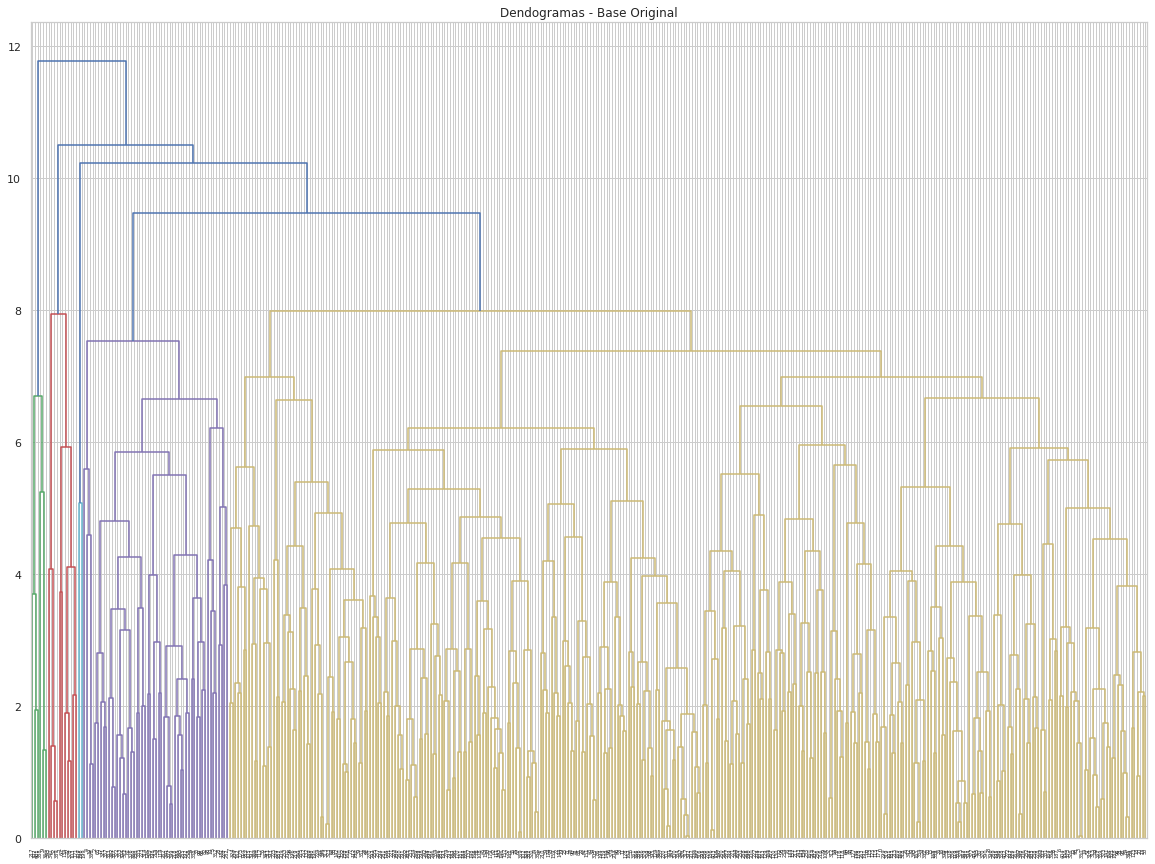

In [ ]:
plt.figure(figsize=(20,15))
plt.title("Dendogramas - Base Original")
dend = shc.dendrogram(shc.linkage(dados_bs3, method='complete'))
plt.show()

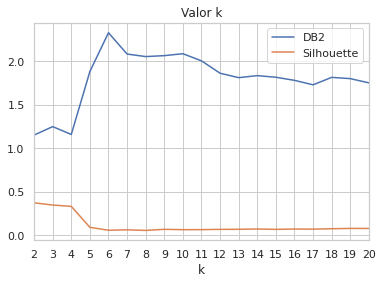

DB2:  1.7515565659642955
Silhoutte:  0.07964702454747857


In [ ]:
plt.title("Valor k")
plt.xlabel("k")
plt.plot(meanDB2s, label='DB2')
plt.plot(meanSilh, label='Silhouette')
plt.xticks(np.arange(20), range(2,21)) 
plt.xlim([0, 18])
plt.legend(loc='best')
plt.show()

print("DB2: ",davies_bouldin_score(dados_bs3, cluster.labels_))
print("Silhoutte: ",silhouette_score(dados_bs3, cluster.labels_))

# Expectation Maximization (EM)

 Expectation Maximization (EM): serão feitos experimentos com k variando de 2 até 20. Por ser um método com inicialização, para cada valor de k, serão feitas 5 execuções (variando o valor da seed). 
 
 Após os experimentos, serão calculados os três índices para todos as partições geradas (agrupamentos construídos). Uma vez calculado os índices, a média e o desvio padrão por valor de k são calculados para cada índice. Coloque os resultados em um gráfico para cada índice, onde o eixo x representa o valor de k e o eixo y representa o respectivo índice.

In [ ]:
from sklearn.mixture import GaussianMixture #EM
from sklearn import metrics

# Base Original

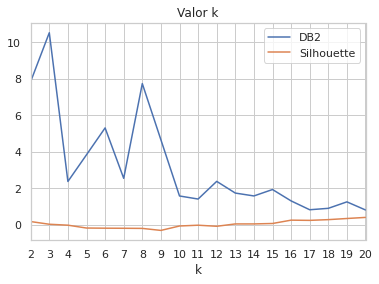

DB2:  2.173338169888251
Silhoutte:  0.21163151894978766


In [ ]:
seeds = [123, 321, 213, 231, 312]

meanDB2s = []
stdDB2s  = []

meanSilh = []
stdSilh  = []

for k in range(2,21):

  #print('k = ', k)

  db2s = []
  silh = []

  for seed in seeds:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=seed)
    gmm.fit(dados_orig)
    gmm.fit_predict(dados_orig)

    cluster_labels=gmm.predict(dados_orig)

    db2s.append(davies_bouldin_score(dados_orig, cluster_labels))
    silh.append(silhouette_score(dados_orig, cluster_labels))

  meanDB2s.append(np.mean(db2s))
  stdDB2s.append(np.std(db2s))

  meanSilh.append(np.mean(silh))
  stdSilh.append(np.std(silh))

#print(len(meanDB2s))

plt.title("Valor k")
plt.xlabel("k")
plt.plot(meanDB2s, label='DB2')
plt.plot(meanSilh, label='Silhouette')
plt.xticks(np.arange(20), range(2,21)) 
plt.xlim([0, 18])
plt.legend(loc='best')
plt.show()

print("DB2: ",davies_bouldin_score(dados_orig, cluster_labels))
print("Silhoutte: ",silhouette_score(dados_orig, cluster_labels))

# Base Reduzida 1

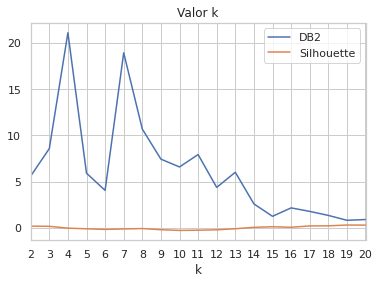

DB2:  1.4297911851069076
Silhoutte:  -0.12427181629271584


In [ ]:
seeds = [123, 321, 213, 231, 312]

meanDB2s = []
stdDB2s  = []

meanSilh = []
stdSilh  = []

km  = None

for k in range(2,21):

  #print('k = ', k)

  db2s = []
  silh = []

  for seed in seeds:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=seed)
    gmm.fit(dados_bs1)
    gmm.fit_predict(dados_bs1)    
    
    cluster_labels=gmm.predict(dados_bs1)
    
    db2s.append(davies_bouldin_score(dados_bs1, cluster_labels))
    silh.append(silhouette_score(dados_bs1, cluster_labels))

  meanDB2s.append(np.mean(db2s))
  stdDB2s.append(np.std(db2s))

  meanSilh.append(np.mean(silh))
  stdSilh.append(np.std(silh))

#print(len(meanDB2s))

plt.title("Valor k")
plt.xlabel("k")
plt.plot(meanDB2s, label='DB2')
plt.plot(meanSilh, label='Silhouette')
plt.xticks(np.arange(20), range(2,21)) 
plt.xlim([0, 18])
plt.legend(loc='best')
plt.show()

print("DB2: ",davies_bouldin_score(dados_bs1, cluster_labels))
print("Silhoutte: ",silhouette_score(dados_bs1, cluster_labels))

# Base Reduzida 2

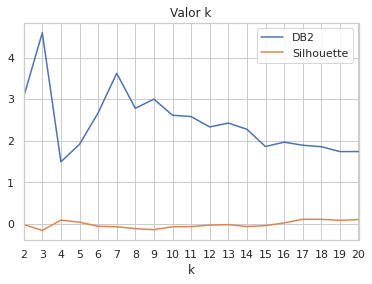

DB2:  1.7708297019661796
Silhoutte:  0.09086923101179141


In [ ]:
seeds = [123, 321, 213, 231, 312]

meanDB2s = []
stdDB2s  = []

meanSilh = []
stdSilh  = []

km  = None

for k in range(2,21):

  #print('k = ', k)

  db2s = []
  silh = []

  for seed in seeds:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=seed)
    gmm.fit(dados_bs2)
    gmm.fit_predict(dados_bs2)    
    
    cluster_labels=gmm.predict(dados_bs2)

    db2s.append(davies_bouldin_score(dados_bs2, cluster_labels))
    silh.append(silhouette_score(dados_bs2, cluster_labels))

  meanDB2s.append(np.mean(db2s))
  stdDB2s.append(np.std(db2s))

  meanSilh.append(np.mean(silh))
  stdSilh.append(np.std(silh))

#print(len(meanDB2s))

plt.title("Valor k")
plt.xlabel("k")
plt.plot(meanDB2s, label='DB2')
plt.plot(meanSilh, label='Silhouette')
plt.xticks(np.arange(20), range(2,21)) 
plt.xlim([0, 18])
plt.legend(loc='best')
plt.show()

print("DB2: ",davies_bouldin_score(dados_bs2, cluster_labels))
print("Silhoutte: ",silhouette_score(dados_bs2, cluster_labels))

# Base Reduzida 3

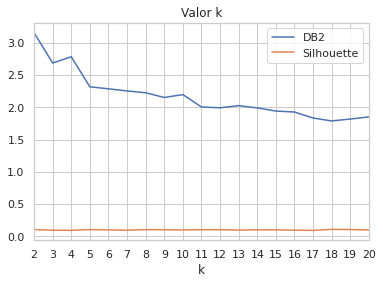

DB2:  1.7948544852848667
Silhoutte:  0.11263185292495256


In [ ]:
seeds = [123, 321, 213, 231, 312]

meanDB2s = []
stdDB2s  = []

meanSilh = []
stdSilh  = []

km  = None

for k in range(2,21):

  #print('k = ', k)

  db2s = []
  silh = []

  for seed in seeds:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=seed)
    gmm.fit(dados_bs3)
    gmm.fit_predict(dados_bs3)    
    
    cluster_labels=gmm.predict(dados_bs3)

    db2s.append(davies_bouldin_score(dados_bs3, cluster_labels))
    silh.append(silhouette_score(dados_bs3, cluster_labels))

  meanDB2s.append(np.mean(db2s))
  stdDB2s.append(np.std(db2s))

  meanSilh.append(np.mean(silh))
  stdSilh.append(np.std(silh))

#print(len(meanDB2s))

plt.title("Valor k")
plt.xlabel("k")
plt.plot(meanDB2s, label='DB2')
plt.plot(meanSilh, label='Silhouette')
plt.xticks(np.arange(20), range(2,21)) 
plt.xlim([0, 18])
plt.legend(loc='best')
plt.show()

print("DB2: ",davies_bouldin_score(dados_bs3, cluster_labels))
print("Silhoutte: ",silhouette_score(dados_bs3, cluster_labels))

# Conclusões

Nesta fase, devemos responder as seguintes perguntas:

- Qual foi o número de grupos definido pelo k-means baseado nos índices
de validação (DB e Silhouette)?

- Qual foi o número de grupos definido pelo Hierárquico baseado nos índices
de validação?

- Qual foi o número de grupos definido pelo EM baseado nos índices
de validação?

- Foi o mesmo resultado para os três algoritmos, se não, por que será que está
havendo divergência?

- Para a sua base de dados, qual o melhor resultado (partição mais semelhante
a categorização original), k-means, hierárquico ou EM?

# Checkpoint 4



- Base Original = 75,15%

- Base Reduzida 1 = 78,12%

- **Base Reduzida 2 = 79,03%**

- Base Reduzida 3 = 75,86%

# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

## Árvore de Decisão - 10

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, algorithm="SAMME", random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 1.0
Desvio padrão no train: 0.0
Acurácia média no test: 0.8158170731707317
Desvio padrão no train: 0.058718899269905964


## Árvore de Decisão - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15, algorithm="SAMME", random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 1.0
Desvio padrão no train: 0.0
Acurácia média no test: 0.8158170731707317
Desvio padrão no train: 0.058718899269905964


## Árvore de Decisão - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20, algorithm="SAMME", random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 1.0
Desvio padrão no train: 0.0
Acurácia média no test: 0.8158170731707317
Desvio padrão no train: 0.058718899269905964


# Naive Bayes - 10

In [ ]:
from sklearn.naive_bayes import GaussianNB as naive

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = AdaBoostClassifier(base_estimator=naive(), n_estimators=10, algorithm="SAMME", random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8334161239613743
Desvio padrão no train: 0.010392010934188817
Acurácia média no test: 0.826890243902439
Desvio padrão no train: 0.055339489532567634


# Naive Bayes - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = AdaBoostClassifier(base_estimator=naive(), n_estimators=15, algorithm="SAMME", random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8334709184819223
Desvio padrão no train: 0.010374561738456065
Acurácia média no test: 0.826890243902439
Desvio padrão no train: 0.055339489532567634


# Naive Bayes - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = AdaBoostClassifier(base_estimator=naive(), n_estimators=20, algorithm="SAMME", random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8334709184819223
Desvio padrão no train: 0.010374561738456065
Acurácia média no test: 0.826890243902439
Desvio padrão no train: 0.055339489532567634




---








# O Algoritmo MLPClassifier não é suportado pelo AdaBoosting mas é possivel criar uma sub-classe da classe MLPClassifier e adapatar o método "fit" da classe para funcionar com o AdaBoosting



---






In [ ]:
from sklearn.neural_network import MLPClassifier

class customMLPClassifer(MLPClassifier):
    def resample_with_replacement(self, X_train, y_train, sample_weight):

        # normalize sample_weights if not already
        sample_weight = sample_weight / sample_weight.sum(dtype=np.float64)

        X_train_resampled = np.zeros((len(X_train), len(X_train[0])), dtype=np.float32)
        y_train_resampled = np.zeros((len(y_train)), dtype=np.int)
        for i in range(len(X_train)):
            # draw a number from 0 to len(X_train)-1
            draw = np.random.choice(np.arange(len(X_train)), p=sample_weight)

            # place the X and y at the drawn number into the resampled X and y
            X_train_resampled[i] = X_train[draw]
            y_train_resampled[i] = y_train[draw]

        return X_train_resampled, y_train_resampled

    def __init__(self, solver, momentum, learning_rate, random_state, hidden_layer_sizes, learning_rate_init, max_iter):
        super().__init__(solver=solver, momentum=momentum, learning_rate=learning_rate, random_state=random_state, hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init, max_iter=max_iter)

    def fit(self, X, y, sample_weight=None):
        if sample_weight is not None:
            X, y = self.resample_with_replacement(X, y, sample_weight)

        return self._fit(X, y, incremental=(self.warm_start and hasattr(self, "classes_")))


In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

adabooster = AdaBoostClassifier(base_estimator=customMLPClassifer(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000))

adabooster.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=customMLPClassifer(hidden_layer_sizes=1000,
                                                     learning_rate='constant',
                                                     learning_rate_init=0.01,
                                                     max_iter=1000,
                                                     momentum=0.8,
                                                     random_state=1,
                                                     solver='sgd'),
                   learning_rate=1.0, n_estimators=50, random_state=None)

# MLP - 10

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    customMLP = customMLPClassifer(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)

    clf = AdaBoostClassifier(base_estimator=customMLP, n_estimators=10, algorithm="SAMME", random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8247409237218355
Desvio padrão no train: 0.016282518784771664
Acurácia média no test: 0.8120121951219512
Desvio padrão no train: 0.05648049970666701


# MLP - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    customMLP = customMLPClassifer(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)

    clf = AdaBoostClassifier(base_estimator=customMLP, n_estimators=15, algorithm="SAMME", random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8305427052923122
Desvio padrão no train: 0.013834975249869671
Acurácia média no test: 0.8172073170731708
Desvio padrão no train: 0.06095582483894832


# MLP - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    customMLP = customMLPClassifer(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)

    clf = AdaBoostClassifier(base_estimator=customMLP, n_estimators=20, algorithm="SAMME", random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8294455423310128
Desvio padrão no train: 0.0171451247054164
Acurácia média no test: 0.8165548780487805
Desvio padrão no train: 0.06547170028395914




---








# O Algoritmo KNeighborsClassifier não é suportado pelo AdaBoosting mas é possivel criar uma sub-classe da classe KNeighborsClassifier e adapatar o método "fit" da classe para funcionar com o AdaBoosting



---






In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
class customKNeighborsClassifier(KNeighborsClassifier):
    def resample_with_replacement(self, X_train, y_train, sample_weight):

        # normalize sample_weights if not already
        sample_weight = sample_weight / sample_weight.sum(dtype=np.float64)

        X_train_resampled = np.zeros((len(X_train), len(X_train[0])), dtype=np.float32)
        y_train_resampled = np.zeros((len(y_train)), dtype=np.int)
        for i in range(len(X_train)):
            # draw a number from 0 to len(X_train)-1
            draw = np.random.choice(np.arange(len(X_train)), p=sample_weight)

            # place the X and y at the drawn number into the resampled X and y
            X_train_resampled[i] = X_train[draw]
            y_train_resampled[i] = y_train[draw]

        return X_train_resampled, y_train_resampled

    def __init__(self, n_neighbors):
        super().__init__(n_neighbors=n_neighbors)

    def fit(self, X, y, sample_weight=None):
        if sample_weight is not None:
            X, y = self.resample_with_replacement(X, y, sample_weight)

        return super().fit(X, y)


In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

Xs = scale(X)

adabooster = AdaBoostClassifier(base_estimator=customKNeighborsClassifier(n_neighbors=3))

adabooster.fit(Xs,y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=customKNeighborsClassifier(n_neighbors=3),
                   learning_rate=1.0, n_estimators=50, random_state=None)

# K-NN - 10

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

Xs = scale(X)

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(Xs, y):  
    X_train = Xs[train]
    X_test  = Xs[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = AdaBoostClassifier(base_estimator=customKNeighborsClassifier(n_neighbors=3), n_estimators=10, algorithm="SAMME", random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 1.0
Desvio padrão no train: 0.0
Acurácia média no test: 0.8033048780487806
Desvio padrão no train: 0.07226554841969832


# K-NN - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

Xs = scale(X)

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(Xs, y):  
    X_train = Xs[train]
    X_test  = Xs[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = AdaBoostClassifier(base_estimator=customKNeighborsClassifier(n_neighbors=3), n_estimators=15, algorithm="SAMME", random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 1.0
Desvio padrão no train: 0.0
Acurácia média no test: 0.7993536585365851
Desvio padrão no train: 0.06283517029353837


# K-NN - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

Xs = scale(X)

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(Xs, y):  
    X_train = Xs[train]
    X_test  = Xs[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = AdaBoostClassifier(base_estimator=customKNeighborsClassifier(n_neighbors=3), n_estimators=20, algorithm="SAMME", random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 1.0
Desvio padrão no train: 0.0
Acurácia média no test: 0.7910243902439024
Desvio padrão no train: 0.06256549691264535


# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

## Árvore de Decisão - 10

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 0.9903673179130174
Desvio padrão no train: 0.005051392220280669
Acurácia média no test: 0.8458658536585365
Desvio padrão no train: 0.0584850878658567


## Árvore de Decisão - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 0.9931034508571002
Desvio padrão no train: 0.004211554019428577
Acurácia média no test: 0.8557256097560976
Desvio padrão no train: 0.05279318119479323


## Árvore de Decisão - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 0.9954029493225544
Desvio padrão no train: 0.0032345908927361258
Acurácia média no test: 0.8564329268292683
Desvio padrão no train: 0.04964151492915612


# Naive Bayes - 10

In [ ]:
from sklearn.naive_bayes import GaussianNB as naive

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = BaggingClassifier(base_estimator=naive(), n_estimators=10, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8313072834793023
Desvio padrão no train: 0.010175412973601082
Acurácia média no test: 0.8278414634146342
Desvio padrão no train: 0.05760721969385983


# Naive Bayes - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = BaggingClassifier(base_estimator=naive(), n_estimators=15, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8339342765177034
Desvio padrão no train: 0.009022203084880715
Acurácia média no test: 0.830310975609756
Desvio padrão no train: 0.055046374303075914


# Naive Bayes - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    clf = BaggingClassifier(base_estimator=naive(), n_estimators=20, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8325925593233027
Desvio padrão no train: 0.01000959579131717
Acurácia média no test: 0.8286036585365854
Desvio padrão no train: 0.054263503145729905


# MLP - 10

In [ ]:
 from sklearn.neural_network import MLPClassifier

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    modelMLP = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)
    clf = BaggingClassifier(base_estimator=modelMLP, n_estimators=10, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8092501684257803
Desvio padrão no train: 0.01767669816940815
Acurácia média no test: 0.7973109756097562
Desvio padrão no train: 0.059801133787914476


# MLP - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    modelMLP = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)
    clf = BaggingClassifier(base_estimator=modelMLP, n_estimators=15, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.811441500112284
Desvio padrão no train: 0.016571773350261495
Acurácia média no test: 0.8039512195121951
Desvio padrão no train: 0.05919902607041692


# MLP - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    modelMLP = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)
    clf = BaggingClassifier(base_estimator=modelMLP, n_estimators=20, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8126734785537839
Desvio padrão no train: 0.015499772882299211
Acurácia média no test: 0.8059268292682927
Desvio padrão no train: 0.055955086837660366


# K-NN - 10

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]  
    
    clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), n_estimators=10, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9117135264615616
Desvio padrão no train: 0.009267349588502265
Acurácia média no test: 0.8290914634146341
Desvio padrão no train: 0.04843385185643814


# K-NN - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]  
    
    clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), n_estimators=15, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9145321506100755
Desvio padrão no train: 0.00848780414648987
Acurácia média no test: 0.8293170731707318
Desvio padrão no train: 0.0491732420478045


# K-NN - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]  
    
    clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), n_estimators=20, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.915188936297627
Desvio padrão no train: 0.008701351332304619
Acurácia média no test: 0.8293170731707319
Desvio padrão no train: 0.04493730181693774


# Stacking Homogêneo

In [ ]:
from sklearn.ensemble import StackingClassifier

## Árvore de Decisão - 10

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('ad0', DecisionTreeClassifier()), 
                  ('ad1', DecisionTreeClassifier()),
                  ('ad2', DecisionTreeClassifier()),
                  ('ad3', DecisionTreeClassifier()),
                  ('ad4', DecisionTreeClassifier()),
                  ('ad5', DecisionTreeClassifier()), 
                  ('ad6', DecisionTreeClassifier()),
                  ('ad7', DecisionTreeClassifier()),
                  ('ad8', DecisionTreeClassifier()),
                  ('ad9', DecisionTreeClassifier())]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 1.0
Desvio padrão no train: 0.0
Acurácia média no test: 0.8190426829268292
Desvio padrão no train: 0.05986077535113874


## Árvore de Decisão - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('ad0', DecisionTreeClassifier()), 
                  ('ad1', DecisionTreeClassifier()),
                  ('ad2', DecisionTreeClassifier()),
                  ('ad3', DecisionTreeClassifier()),
                  ('ad4', DecisionTreeClassifier()),
                  ('ad5', DecisionTreeClassifier()), 
                  ('ad6', DecisionTreeClassifier()),
                  ('ad7', DecisionTreeClassifier()),
                  ('ad8', DecisionTreeClassifier()),
                  ('ad9', DecisionTreeClassifier()),
                  ('ad10', DecisionTreeClassifier()), 
                  ('ad11', DecisionTreeClassifier()),
                  ('ad12', DecisionTreeClassifier()),
                  ('ad13', DecisionTreeClassifier()),
                  ('ad14', DecisionTreeClassifier())]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 1.0
Desvio padrão no train: 0.0
Acurácia média no test: 0.8178109756097561
Desvio padrão no train: 0.05972792360960701


## Árvore de Decisão - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('ad0', DecisionTreeClassifier()), 
                  ('ad1', DecisionTreeClassifier()),
                  ('ad2', DecisionTreeClassifier()),
                  ('ad3', DecisionTreeClassifier()),
                  ('ad4', DecisionTreeClassifier()),
                  ('ad5', DecisionTreeClassifier()), 
                  ('ad6', DecisionTreeClassifier()),
                  ('ad7', DecisionTreeClassifier()),
                  ('ad8', DecisionTreeClassifier()),
                  ('ad9', DecisionTreeClassifier()),
                  ('ad10', DecisionTreeClassifier()), 
                  ('ad11', DecisionTreeClassifier()),
                  ('ad12', DecisionTreeClassifier()),
                  ('ad13', DecisionTreeClassifier()),
                  ('ad14', DecisionTreeClassifier()),
                  ('ad15', DecisionTreeClassifier()), 
                  ('ad16', DecisionTreeClassifier()),
                  ('ad17', DecisionTreeClassifier()),
                  ('ad18', DecisionTreeClassifier()),
                  ('ad19', DecisionTreeClassifier())]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 1.0
Desvio padrão no train: 0.0
Acurácia média no test: 0.8158414634146339
Desvio padrão no train: 0.05945256283660588


## NB - 10

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('nb0', naive()), 
                  ('nb1', naive()),
                  ('nb2', naive()),
                  ('nb3', naive()),
                  ('nb4', naive()),
                  ('nb5', naive()), 
                  ('nb6', naive()),
                  ('nb7', naive()),
                  ('nb8', naive()),
                  ('nb9', naive())]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 0.8363439628714723
Desvio padrão no train: 0.00784866272586878
Acurácia média no test: 0.8325426829268291
Desvio padrão no train: 0.056012571820646805


## NB - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('nb0', naive()), 
                  ('nb1', naive()),
                  ('nb2', naive()),
                  ('nb3', naive()),
                  ('nb4', naive()),
                  ('nb5', naive()), 
                  ('nb6', naive()),
                  ('nb7', naive()),
                  ('nb8', naive()),
                  ('nb9', naive()),
                  ('nb10', naive()), 
                  ('nb11', naive()),
                  ('nb12', naive()),
                  ('nb13', naive()),
                  ('nb14', naive())]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 0.8363165656111983
Desvio padrão no train: 0.007875071078079842
Acurácia média no test: 0.8325426829268291
Desvio padrão no train: 0.056012571820646805


## NB - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('nb0', naive()), 
                  ('nb1', naive()),
                  ('nb2', naive()),
                  ('nb3', naive()),
                  ('nb4', naive()),
                  ('nb5', naive()), 
                  ('nb6', naive()),
                  ('nb7', naive()),
                  ('nb8', naive()),
                  ('nb9', naive()),
                  ('nb10', naive()), 
                  ('nb11', naive()),
                  ('nb12', naive()),
                  ('nb13', naive()),
                  ('nb14', naive()),
                  ('nb15', naive()), 
                  ('nb16', naive()),
                  ('nb17', naive()),
                  ('nb18', naive()),
                  ('nb19', naive())]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 0.8363166404671007
Desvio padrão no train: 0.007911366340688479
Acurácia média no test: 0.8325426829268291
Desvio padrão no train: 0.056012571820646805


## MLP - 10

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('mlp0', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)), 
                  ('mlp1', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp2', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp3', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp4', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp5', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)), 
                  ('mlp6', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp7', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp8', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp9', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 0.7838001347406243
Desvio padrão no train: 0.02702948101877718
Acurácia média no test: 0.7756036585365855
Desvio padrão no train: 0.06939653916105061


## MLP - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('mlp0', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)), 
                  ('mlp1', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp2', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp3', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp4', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp5', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)), 
                  ('mlp6', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp7', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp8', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp9', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp10', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)), 
                  ('mlp11', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp12', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp13', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp14', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 0.7839642937345609
Desvio padrão no train: 0.02710393876599216
Acurácia média no test: 0.7756036585365855
Desvio padrão no train: 0.06939653916105061


## MLP - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('mlp0', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)), 
                  ('mlp1', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp2', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp3', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp4', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp5', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)), 
                  ('mlp6', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp7', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp8', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp9', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp10', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)), 
                  ('mlp11', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp12', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp13', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp14', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp15', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)), 
                  ('mlp16', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp17', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp18', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                  ('mlp19', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))
    

Acurácia média no train: 0.7839369713301891
Desvio padrão no train: 0.02708031322886402
Acurácia média no test: 0.7756036585365855
Desvio padrão no train: 0.06939653916105061


## K-NN - 10

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

Xs = scale(X)

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(Xs, y):  
    X_train = Xs[train]
    X_test  = Xs[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('knn0', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn1', KNeighborsClassifier(n_neighbors=3)),
                  ('knn2', KNeighborsClassifier(n_neighbors=3)),
                  ('knn3', KNeighborsClassifier(n_neighbors=3)),
                  ('knn4', KNeighborsClassifier(n_neighbors=3)),
                  ('knn5', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn6', KNeighborsClassifier(n_neighbors=3)),
                  ('knn7', KNeighborsClassifier(n_neighbors=3)),
                  ('knn8', KNeighborsClassifier(n_neighbors=3)),
                  ('knn9', KNeighborsClassifier(n_neighbors=3))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9066493749532151
Desvio padrão no train: 0.006128943591940201
Acurácia média no test: 0.8202134146341463
Desvio padrão no train: 0.05705488652032978


## K-NN - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

Xs = scale(X)

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(Xs, y):  
    X_train = Xs[train]
    X_test  = Xs[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('knn0', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn1', KNeighborsClassifier(n_neighbors=3)),
                  ('knn2', KNeighborsClassifier(n_neighbors=3)),
                  ('knn3', KNeighborsClassifier(n_neighbors=3)),
                  ('knn4', KNeighborsClassifier(n_neighbors=3)),
                  ('knn5', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn6', KNeighborsClassifier(n_neighbors=3)),
                  ('knn7', KNeighborsClassifier(n_neighbors=3)),
                  ('knn8', KNeighborsClassifier(n_neighbors=3)),
                  ('knn9', KNeighborsClassifier(n_neighbors=3)),
                  ('knn10', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn11', KNeighborsClassifier(n_neighbors=3)),
                  ('knn12', KNeighborsClassifier(n_neighbors=3)),
                  ('knn13', KNeighborsClassifier(n_neighbors=3)),
                  ('knn14', KNeighborsClassifier(n_neighbors=3))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9066493749532151
Desvio padrão no train: 0.006128943591940201
Acurácia média no test: 0.8202134146341463
Desvio padrão no train: 0.05705488652032978


## K-NN - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

Xs = scale(X)

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(Xs, y):  
    X_train = Xs[train]
    X_test  = Xs[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('knn0', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn1', KNeighborsClassifier(n_neighbors=3)),
                  ('knn2', KNeighborsClassifier(n_neighbors=3)),
                  ('knn3', KNeighborsClassifier(n_neighbors=3)),
                  ('knn4', KNeighborsClassifier(n_neighbors=3)),
                  ('knn5', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn6', KNeighborsClassifier(n_neighbors=3)),
                  ('knn7', KNeighborsClassifier(n_neighbors=3)),
                  ('knn8', KNeighborsClassifier(n_neighbors=3)),
                  ('knn9', KNeighborsClassifier(n_neighbors=3)),
                  ('knn10', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn11', KNeighborsClassifier(n_neighbors=3)),
                  ('knn12', KNeighborsClassifier(n_neighbors=3)),
                  ('knn13', KNeighborsClassifier(n_neighbors=3)),
                  ('knn14', KNeighborsClassifier(n_neighbors=3)),
                  ('knn15', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn16', KNeighborsClassifier(n_neighbors=3)),
                  ('knn17', KNeighborsClassifier(n_neighbors=3)),
                  ('knn18', KNeighborsClassifier(n_neighbors=3)),
                  ('knn19', KNeighborsClassifier(n_neighbors=3))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9066493749532151
Desvio padrão no train: 0.006128943591940201
Acurácia média no test: 0.8202134146341463
Desvio padrão no train: 0.05705488652032978


# Stacking Heteregêneo

Melhores modelos:

1. K-NN
2. NB
3. AD
4. MLP

## AD e NB - 10

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('ad0', DecisionTreeClassifier()), 
                  ('ad1', DecisionTreeClassifier()),
                  ('ad2', DecisionTreeClassifier()),
                  ('ad3', DecisionTreeClassifier()),
                  ('ad4', DecisionTreeClassifier()),
                  ('nb5', naive()), 
                  ('nb6', naive()),
                  ('nb7', naive()),
                  ('nb8', naive()),
                  ('nb9', naive())]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9011223894004041
Desvio padrão no train: 0.010041110579041366
Acurácia média no test: 0.8143841463414634
Desvio padrão no train: 0.05867856859665249


## AD e NB - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('ad0', DecisionTreeClassifier()), 
                  ('ad1', DecisionTreeClassifier()),
                  ('ad2', DecisionTreeClassifier()),
                  ('ad3', DecisionTreeClassifier()),
                  ('ad4', DecisionTreeClassifier()),
				          ('ad5', DecisionTreeClassifier()),
                  ('ad6', DecisionTreeClassifier()),
				          ('ad7', DecisionTreeClassifier()),
                  ('nb8', naive()), 
                  ('nb9', naive()),
                  ('nb10', naive()),
                  ('nb11', naive()),
                  ('nb12', naive()),
				          ('nb13', naive()),
                  ('nb14', naive())]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9106472789879483
Desvio padrão no train: 0.01331672191388753
Acurácia média no test: 0.8153780487804879
Desvio padrão no train: 0.05944403208585895


## AD e NB - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('ad0', DecisionTreeClassifier()), 
                  ('ad1', DecisionTreeClassifier()),
                  ('ad2', DecisionTreeClassifier()),
                  ('ad3', DecisionTreeClassifier()),
                  ('ad4', DecisionTreeClassifier()),
				          ('ad5', DecisionTreeClassifier()),
                  ('ad6', DecisionTreeClassifier()),
				          ('ad7', DecisionTreeClassifier()),
				          ('ad8', DecisionTreeClassifier()),
				          ('ad9', DecisionTreeClassifier()),
                  ('nb10', naive()), 
                  ('nb11', naive()),
                  ('nb12', naive()),
                  ('nb13', naive()),
                  ('nb14', naive()),
				          ('nb15', naive()),
                  ('nb16', naive()),
                  ('nb17', naive()),
                  ('nb18', naive()),
				          ('nb19', naive())]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.901478404072161
Desvio padrão no train: 0.00989899907160034
Acurácia média no test: 0.8141341463414633
Desvio padrão no train: 0.05698433387309307


## AD e K-NN -10

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('ad0', DecisionTreeClassifier()), 
                  ('ad1', DecisionTreeClassifier()),
                  ('ad2', DecisionTreeClassifier()),
                  ('ad3', DecisionTreeClassifier()),
                  ('ad4', DecisionTreeClassifier()),
                  ('knn5', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn6', KNeighborsClassifier(n_neighbors=3)),
                  ('knn7', KNeighborsClassifier(n_neighbors=3)),
                  ('knn8', KNeighborsClassifier(n_neighbors=3)),
                  ('knn9', KNeighborsClassifier(n_neighbors=3))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9984394041470169
Desvio padrão no train: 0.007658913870090056
Acurácia média no test: 0.8236707317073172
Desvio padrão no train: 0.06103907550779193


## AD e K-NN - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('ad0', DecisionTreeClassifier()), 
                  ('ad1', DecisionTreeClassifier()),
                  ('ad2', DecisionTreeClassifier()),
                  ('ad3', DecisionTreeClassifier()),
                  ('ad4', DecisionTreeClassifier()),
				          ('ad5', DecisionTreeClassifier()),
                  ('ad6', DecisionTreeClassifier()),
                  ('ad7', DecisionTreeClassifier()),
                  ('knn8', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn9', KNeighborsClassifier(n_neighbors=3)),
                  ('knn10', KNeighborsClassifier(n_neighbors=3)),
                  ('knn11', KNeighborsClassifier(n_neighbors=3)),
                  ('knn12', KNeighborsClassifier(n_neighbors=3)),
				          ('knn13', KNeighborsClassifier(n_neighbors=3)),
                  ('knn14', KNeighborsClassifier(n_neighbors=3))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9992065274346882
Desvio padrão no train: 0.00555794867513394
Acurácia média no test: 0.8224085365853656
Desvio padrão no train: 0.06119590540623609


## AD e K-NN - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('ad0', DecisionTreeClassifier()), 
                  ('ad1', DecisionTreeClassifier()),
                  ('ad2', DecisionTreeClassifier()),
                  ('ad3', DecisionTreeClassifier()),
                  ('ad4', DecisionTreeClassifier()),
				          ('ad5', DecisionTreeClassifier()),
                  ('ad6', DecisionTreeClassifier()),
                  ('ad7', DecisionTreeClassifier()),
				          ('ad8', DecisionTreeClassifier()),
                  ('ad9', DecisionTreeClassifier()),
                  ('knn10', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn11', KNeighborsClassifier(n_neighbors=3)),
                  ('knn12', KNeighborsClassifier(n_neighbors=3)),
                  ('knn13', KNeighborsClassifier(n_neighbors=3)),
                  ('knn14', KNeighborsClassifier(n_neighbors=3)),
				          ('knn15', KNeighborsClassifier(n_neighbors=3)),
                  ('knn16', KNeighborsClassifier(n_neighbors=3)),
				          ('knn17', KNeighborsClassifier(n_neighbors=3)),
                  ('knn18', KNeighborsClassifier(n_neighbors=3)),
				          ('knn19', KNeighborsClassifier(n_neighbors=3))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio padrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio padrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9984394041470169
Desvio padrão no train: 0.007658913870090056
Acurácia média no test: 0.8212073170731707
Desvio padrão no train: 0.06160061269849884


## NB e K-NN - 10

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('nb0', naive()), 
                  ('nb1', naive()),
                  ('nb2', naive()),
                  ('nb3', naive()),
                  ('nb4', naive()),
                  ('knn5', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn6', KNeighborsClassifier(n_neighbors=3)),
                  ('knn7', KNeighborsClassifier(n_neighbors=3)),
                  ('knn8', KNeighborsClassifier(n_neighbors=3)),
                  ('knn9', KNeighborsClassifier(n_neighbors=3))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio pnbrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio pnbrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8505200239538888
Desvio pnbrão no train: 0.006422614740626076
Acurácia média no test: 0.8401463414634146
Desvio pnbrão no train: 0.052194532137082354


## NB e K-NN - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('nb0', naive()), 
                  ('nb1', naive()),
                  ('nb2', naive()),
                  ('nb3', naive()),
                  ('nb4', naive()),
				          ('nb5', naive()),
                  ('nb6', naive()),
                  ('nb7', naive()),
                  ('knn8', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn9', KNeighborsClassifier(n_neighbors=3)),
                  ('knn10', KNeighborsClassifier(n_neighbors=3)),
                  ('knn11', KNeighborsClassifier(n_neighbors=3)),
                  ('knn12', KNeighborsClassifier(n_neighbors=3)),
				          ('knn13', KNeighborsClassifier(n_neighbors=3)),
                  ('knn14', KNeighborsClassifier(n_neighbors=3))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio pnbrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio pnbrão no train:", np.std(recall_accs))

Acurácia média no train: 0.849671382588517
Desvio pnbrão no train: 0.0062810861968169585
Acurácia média no test: 0.8421158536585365
Desvio pnbrão no train: 0.05154738662739574


## NB e K-NN - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('nb0', naive()), 
                  ('nb1', naive()),
                  ('nb2', naive()),
                  ('nb3', naive()),
                  ('nb4', naive()),
				          ('nb5', naive()),
                  ('nb6', naive()),
                  ('nb7', naive()),
				          ('nb8', naive()),
                  ('nb9', naive()),
                  ('knn10', KNeighborsClassifier(n_neighbors=3)), 
                  ('knn11', KNeighborsClassifier(n_neighbors=3)),
                  ('knn12', KNeighborsClassifier(n_neighbors=3)),
                  ('knn13', KNeighborsClassifier(n_neighbors=3)),
                  ('knn14', KNeighborsClassifier(n_neighbors=3)),
				          ('knn15', KNeighborsClassifier(n_neighbors=3)),
                  ('knn16', KNeighborsClassifier(n_neighbors=3)),
				          ('knn17', KNeighborsClassifier(n_neighbors=3)),
                  ('knn18', KNeighborsClassifier(n_neighbors=3)),
				          ('knn19', KNeighborsClassifier(n_neighbors=3))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio pnbrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio pnbrão no train:", np.std(recall_accs))

Acurácia média no train: 0.8504653042892433
Desvio pnbrão no train: 0.006395875281095385
Acurácia média no test: 0.8398963414634147
Desvio pnbrão no train: 0.05196662251619428


## AD, NB e K-NN - 10

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('ad0', DecisionTreeClassifier()), 
                  ('ad1', DecisionTreeClassifier()),
                  ('ad2', DecisionTreeClassifier()),
                  ('ad3', DecisionTreeClassifier()),
                  ('nb4', naive()),
                  ('nb5', naive()), 
                  ('nb6', naive()),
                  ('knn7', KNeighborsClassifier(n_neighbors=3)),
                  ('knn8', KNeighborsClassifier(n_neighbors=3)),
                  ('knn9', KNeighborsClassifier(n_neighbors=3))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio pnbrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio pnbrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9438985702522642
Desvio pnbrão no train: 0.017296827981248777
Acurácia média no test: 0.8167987804878049
Desvio pnbrão no train: 0.06140782032514318


## AD, NB e K-NN - 15

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('ad0', DecisionTreeClassifier()), 
                  ('ad1', DecisionTreeClassifier()),
                  ('ad2', DecisionTreeClassifier()),
                  ('ad3', DecisionTreeClassifier()),
				          ('ad4', DecisionTreeClassifier()),
                  ('nb5', naive()),
                  ('nb6', naive()), 
                  ('nb7', naive()),
				          ('nb8', naive()), 
                  ('nb9', naive()),
                  ('knn10', KNeighborsClassifier(n_neighbors=3)),
                  ('knn11', KNeighborsClassifier(n_neighbors=3)),
                  ('knn12', KNeighborsClassifier(n_neighbors=3)),
                  ('knn13', KNeighborsClassifier(n_neighbors=3)),
                  ('knn14', KNeighborsClassifier(n_neighbors=3))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio pnbrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio pnbrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9180374279511939
Desvio pnbrão no train: 0.014432413807224828
Acurácia média no test: 0.8214939024390243
Desvio pnbrão no train: 0.058029650401316295


## AD, NB e K-NN - 20

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

recall_accs=[]
train_accs=[]

for train, test in rkf.split(X, y):  
    X_train = X[train]
    X_test  = X[test]
    y_train = y[train]
    y_test  = y[test]    

    
    estimators = [('ad0', DecisionTreeClassifier()), 
                  ('ad1', DecisionTreeClassifier()),
                  ('ad2', DecisionTreeClassifier()),
                  ('ad3', DecisionTreeClassifier()),
				          ('ad4', DecisionTreeClassifier()),
                  ('ad5', DecisionTreeClassifier()),
				          ('ad6', DecisionTreeClassifier()),
                  ('nb7', naive()),
                  ('nb8', naive()), 
                  ('nb9', naive()),
				          ('nb10', naive()), 
                  ('nb11', naive()),
				          ('nb12', naive()), 
                  ('nb13', naive()),
                  ('knn14', KNeighborsClassifier(n_neighbors=3)),
                  ('knn15', KNeighborsClassifier(n_neighbors=3)),
                  ('knn16', KNeighborsClassifier(n_neighbors=3)),
                  ('knn17', KNeighborsClassifier(n_neighbors=3)),
                  ('knn18', KNeighborsClassifier(n_neighbors=3)),
                  ('knn19', KNeighborsClassifier(n_neighbors=3))]

    clf = StackingClassifier(estimators=estimators, final_estimator=naive())

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_accs.append(train_acc)

    recall_acc = accuracy_score(y_test, y_pred_test)
    recall_accs.append(recall_acc)

print("Acurácia média no train:", np.mean(train_accs))
print("Desvio pnbrão no train:", np.std(train_accs))
print("Acurácia média no test:", np.mean(recall_accs))
print("Desvio pnbrão no train:", np.std(recall_accs))

Acurácia média no train: 0.9156555879931132
Desvio pnbrão no train: 0.013295736437127047
Acurácia média no test: 0.8197621951219511
Desvio pnbrão no train: 0.056009746684629665


# Análise Estatística

In [ ]:
X = corr.iloc[:,:-1].values
y = corr.iloc[:,-1].values

In [ ]:
df_acc = pd.DataFrame(columns=('knn','ad','nb','mlp',
                               'kmeans','hierarquico','em',
                               'bagknn','bagad','bagnb','bagmlp',
                               'bknn','bad','bnb','bmlp',
                               'sknn','sad','snb','smlp',
                               'sadnb','sadknn','snbknn','sadnbknn'))

rkf = RepeatedKFold(n_splits=2, n_repeats=5, random_state=1)

for train, test in rkf.split(X, y):  
  X_train = X[train]
  X_test  = X[test]
  y_train = y[train]
  y_test  = y[test]    

  #Supervisionado

  knn = KNeighborsClassifier(n_neighbors=21)
  knn.fit(X_train, y_train)
  rknn = accuracy_score(y_test, knn.predict(X_test))


  ad = DecisionTreeClassifier()
  ad.fit(X_train, y_train)
  rad = accuracy_score(y_test, ad.predict(X_test))


  nb = GaussianNB()
  nb.fit(X_train, y_train)
  rnb = accuracy_score(y_test, nb.predict(X_test))


  mlp = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(10000), learning_rate_init=0.01, max_iter=100)
  mlp.fit(X_train, y_train)
  rmlp = accuracy_score(y_test, mlp.predict(X_test))

  # Não Supervisionado
  km = KMeans(n_clusters=9, init='k-means++', max_iter = 300, n_init=10, random_state = 0)
  km.fit_predict(X_train)
  rkm = davies_bouldin_score(X_train, km.labels_)


  cluster = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='complete')
  cluster.fit_predict(X_train)
  rcluster = davies_bouldin_score(X_train, cluster.labels_)


  gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=seed)
  gmm.fit(X_train)  
  rgmm = davies_bouldin_score(X_train, gmm.predict(X_train))

  # Bagging
  bagknn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), n_estimators=10, random_state=0)
  bagknn.fit(X_train, y_train)
  rbagknn = accuracy_score(y_test, bagknn.predict(X_test))


  bagad = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
  bagad.fit(X_train, y_train)
  rbagad = accuracy_score(y_test, bagad.predict(X_test))


  bagnb = BaggingClassifier(base_estimator=naive(), n_estimators=10, random_state=0)
  bagnb.fit(X_train, y_train)
  rbagnb = accuracy_score(y_test, bagnb.predict(X_test))


  modelMLP = MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)
  bagmlp = BaggingClassifier(base_estimator=modelMLP, n_estimators=10, random_state=0)
  bagmlp.fit(X_train, y_train)
  rbagmlp = accuracy_score(y_test, bagmlp.predict(X_test))

  # Boosting
  bknn = AdaBoostClassifier(base_estimator=customKNeighborsClassifier(n_neighbors=3), n_estimators=10, algorithm="SAMME", random_state=0)
  bknn.fit(X_train, y_train)
  rknn = accuracy_score(y_test, bknn.predict(X_test))


  bad = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, algorithm="SAMME", random_state=0)
  bad.fit(X_train, y_train)
  rbad = accuracy_score(y_test, bad.predict(X_test))


  bnb = AdaBoostClassifier(base_estimator=naive(), n_estimators=10, algorithm="SAMME", random_state=0)
  bnb.fit(X_train, y_train)
  rbnb = accuracy_score(y_test, bnb.predict(X_test))


  customMLP = customMLPClassifer(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)
  bmlp = AdaBoostClassifier(base_estimator=customMLP, n_estimators=10, algorithm="SAMME", random_state=0)
  bmlp.fit(X_train, y_train)
  rbmlp = accuracy_score(y_test, bmlp.predict(X_test))    


  # Stacking Homogeneo
  estimators = [('ad0', DecisionTreeClassifier()),('ad1', DecisionTreeClassifier()),('ad2', DecisionTreeClassifier()),('ad3', DecisionTreeClassifier()),('ad4', DecisionTreeClassifier()),
                ('ad5', DecisionTreeClassifier()),('ad6', DecisionTreeClassifier()),('ad7', DecisionTreeClassifier()),('ad8', DecisionTreeClassifier()),('ad9', DecisionTreeClassifier())]

  sad = StackingClassifier(estimators=estimators, final_estimator=naive())
  sad.fit(X_train, y_train)
  rsad = accuracy_score(y_test, sad.predict(X_test)) 


  estimators = [('knn0', KNeighborsClassifier(n_neighbors=3)),('knn1', KNeighborsClassifier(n_neighbors=3)),('knn2', KNeighborsClassifier(n_neighbors=3)),('knn3', KNeighborsClassifier(n_neighbors=3)),
                ('knn4', KNeighborsClassifier(n_neighbors=3)),('knn5', KNeighborsClassifier(n_neighbors=3)),('knn6', KNeighborsClassifier(n_neighbors=3)),('knn7', KNeighborsClassifier(n_neighbors=3)),
                ('knn8', KNeighborsClassifier(n_neighbors=3)),('knn9', KNeighborsClassifier(n_neighbors=3))]

  sknn = StackingClassifier(estimators=estimators, final_estimator=naive())
  sknn.fit(X_train, y_train)
  rsknn = accuracy_score(y_test, sknn.predict(X_test)) 


  estimators = [('nb0', naive()),('nb1', naive()),('nb2', naive()),('nb3', naive()),('nb4', naive()),
                ('nb5', naive()),('nb6', naive()),('nb7', naive()),('nb8', naive()),('nb9', naive())]

  snb = StackingClassifier(estimators=estimators, final_estimator=naive())
  snb.fit(X_train, y_train)
  rsnb = accuracy_score(y_test, snb.predict(X_test)) 


  estimators = [('mlp0', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)), 
                ('mlp1', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                ('mlp2', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                ('mlp3', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                ('mlp4', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                ('mlp5', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)), 
                ('mlp6', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                ('mlp7', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                ('mlp8', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000)),
                ('mlp9', MLPClassifier(solver='sgd', momentum=0.8, learning_rate='constant', random_state=1, hidden_layer_sizes=(1000), learning_rate_init=0.01, max_iter=1000))]

  smlp = StackingClassifier(estimators=estimators, final_estimator=naive())
  smlp.fit(X_train, y_train)
  rsmlp = accuracy_score(y_test, smlp.predict(X_test)) 

  # Stacking Heterogeneo
  estimators = [('ad0', DecisionTreeClassifier()),('ad1', DecisionTreeClassifier()),('ad2', DecisionTreeClassifier()),('ad3', DecisionTreeClassifier()),('ad4', DecisionTreeClassifier()),
                ('nb5', naive()),('nb6', naive()),('nb7', naive()),('nb8', naive()),('nb9', naive())]

  sadnb = StackingClassifier(estimators=estimators, final_estimator=naive())
  sadnb.fit(X_train, y_train)
  rsadnb = accuracy_score(y_test, sadnb.predict(X_test)) 


  estimators = [('ad0', DecisionTreeClassifier()),('ad1', DecisionTreeClassifier()),('ad2', DecisionTreeClassifier()),('ad3', DecisionTreeClassifier()),('ad4', DecisionTreeClassifier()),
                ('knn5', KNeighborsClassifier(n_neighbors=3)),('knn6', KNeighborsClassifier(n_neighbors=3)),('knn7', KNeighborsClassifier(n_neighbors=3)),('knn8', KNeighborsClassifier(n_neighbors=3)),('knn9', KNeighborsClassifier(n_neighbors=3))]  

  sadknn = StackingClassifier(estimators=estimators, final_estimator=naive())
  sadknn.fit(X_train, y_train)
  rsadknn = accuracy_score(y_test, sadknn.predict(X_test)) 


  estimators = [('nb0', naive()),('nb1', naive()),('nb2', naive()),('nb3', naive()),('nb4', naive()),
                ('knn5', KNeighborsClassifier(n_neighbors=3)),('knn6', KNeighborsClassifier(n_neighbors=3)),
                ('knn7', KNeighborsClassifier(n_neighbors=3)),('knn8', KNeighborsClassifier(n_neighbors=3)),
                ('knn9', KNeighborsClassifier(n_neighbors=3))]

  snbknn = StackingClassifier(estimators=estimators, final_estimator=naive())
  snbknn.fit(X_train, y_train)
  rsnbknn = accuracy_score(y_test, snbknn.predict(X_test)) 


  estimators = [('ad0', DecisionTreeClassifier()),('ad1', DecisionTreeClassifier()),('ad2', DecisionTreeClassifier()),('ad3', DecisionTreeClassifier()),
                ('nb4', naive()),('nb5', naive()),('nb6', naive()),
                ('knn7', KNeighborsClassifier(n_neighbors=3)),('knn8', KNeighborsClassifier(n_neighbors=3)),('knn9', KNeighborsClassifier(n_neighbors=3))]

  sadnbknn = StackingClassifier(estimators=estimators, final_estimator=naive())
  sadnbknn.fit(X_train, y_train)
  rsadnbknn = accuracy_score(y_test, sadnbknn.predict(X_test)) 



  df_acc = df_acc.append({'knn':rknn,'ad':rad,'nb':rnb,'mlp':rmlp, 
                          'kmeans':rkm,'hierarquico':rcluster,'em':rgmm,
                          'bagknn':rbagknn,'bagad':rbagad,'bagnb':rbagnb,'bagmlp':rbagmlp,
                          'bknn':rknn,'bad':rbad,'bnb':rbnb,'bmlp':rbmlp, 
                          'sknn':rsknn,'sad':rsad,'snb':rsnb,'smlp':rsmlp,
                          'sadnb':rsadnb,'sadknn':rsadknn,'snbknn':rsnbknn,'sadnbknn':rsadnbknn
                        }, ignore_index=True)

#------------
df_acc

,knn,ad,nb,mlp,kmeans,hierarquico,em,bagknn,bagad,bagnb,bagmlp,bknn,bad,bnb,bmlp,sknn,sad,snb,smlp,sadnb,sadknn,snbknn,sadnbknn
0,0.768473,0.788177,0.847291,0.719212,1.011146,1.196326,1.126211,0.783251,0.847291,0.842365,0.684729,0.768473,0.807882,0.832512,0.689655,0.827586,0.793103,0.842365,0.724138,0.827586,0.817734,0.842365,0.837438
1,0.822660,0.802956,0.817734,0.714286,1.180951,1.259347,1.441353,0.842365,0.817734,0.807882,0.709360,0.822660,0.802956,0.817734,0.714286,0.822660,0.793103,0.822660,0.783251,0.812808,0.802956,0.827586,0.807882
2,0.729064,0.807882,0.807882,0.763547,1.197325,1.211150,1.311663,0.783251,0.817734,0.773399,0.714286,0.729064,0.807882,0.807882,0.758621,0.812808,0.822660,0.827586,0.536946,0.812808,0.807882,0.832512,0.817734
3,0.778325,0.802956,0.847291,0.512315,1.045361,1.023199,1.156498,0.783251,0.822660,0.847291,0.660099,0.778325,0.768473,0.847291,0.655172,0.694581,0.788177,0.852217,0.502463,0.822660,0.793103,0.832512,0.812808
4,0.763547,0.783251,0.832512,0.448276,1.103012,1.043544,1.133808,0.822660,0.857143,0.832512,0.665025,0.763547,0.798030,0.832512,0.753695,0.788177,0.802956,0.832512,0.551724,0.817734,0.793103,0.852217,0.798030
5,0.812808,0.812808,0.827586,0.704433,1.072957,1.105809,1.332716,0.842365,0.832512,0.837438,0.738916,0.812808,0.812808,0.827586,0.635468,0.842365,0.812808,0.842365,0.724138,0.832512,0.812808,0.842365,0.807882
6,0.719212,0.773399,0.817734,0.758621,1.013579,1.159944,1.049082,0.802956,0.802956,0.812808,0.704433,0.719212,0.763547,0.807882,0.748768,0.817734,0.773399,0.812808,0.482759,0.822660,0.763547,0.852217,0.827586
7,0.783251,0.822660,0.788177,0.714286,1.005102,1.173475,1.144204,0.807882,0.827586,0.798030,0.748768,0.783251,0.842365,0.788177,0.674877,0.798030,0.822660,0.788177,0.753695,0.778325,0.802956,0.802956,0.812808
8,0.793103,0.832512,0.802956,0.724138,1.025731,1.153534,1.226695,0.822660,0.798030,0.798030,0.699507,0.793103,0.842365,0.793103,0.748768,0.817734,0.788177,0.807882,0.704433,0.807882,0.798030,0.827586,0.837438
9,0.758621,0.793103,0.842365,0.645320,1.090092,1.025512,1.228802,0.817734,0.817734,0.837438,0.768473,0.758621,0.807882,0.842365,0.738916,0.832512,0.798030,0.842365,0.650246,0.832512,0.827586,0.847291,0.827586


## Salvar resultados dos modelos

In [ ]:
df_acc.to_csv('/content/gdrive/My Drive/Trabalho IA - UFRN/Heart Failure Prediction/resultsModels.csv', index=False)

## Carregar resultados dos modelos

In [ ]:
df_acc2 = pd.read_csv('/content/gdrive/My Drive/Trabalho IA - UFRN/Heart Failure Prediction/resultsModels.csv')  

In [ ]:
df_acc2

,knn,ad,nb,mlp,kmeans,hierarquico,em,bagknn,bagad,bagnb,bagmlp,bknn,bad,bnb,bmlp,sknn,sad,snb,smlp,sadnb,sadknn,snbknn,sadnbknn
0,0.768473,0.788177,0.847291,0.719212,1.011146,1.196326,1.126211,0.783251,0.847291,0.842365,0.684729,0.768473,0.807882,0.832512,0.689655,0.827586,0.793103,0.842365,0.724138,0.827586,0.817734,0.842365,0.837438
1,0.822660,0.802956,0.817734,0.714286,1.180951,1.259347,1.441353,0.842365,0.817734,0.807882,0.709360,0.822660,0.802956,0.817734,0.714286,0.822660,0.793103,0.822660,0.783251,0.812808,0.802956,0.827586,0.807882
2,0.729064,0.807882,0.807882,0.763547,1.197325,1.211150,1.311663,0.783251,0.817734,0.773399,0.714286,0.729064,0.807882,0.807882,0.758621,0.812808,0.822660,0.827586,0.536946,0.812808,0.807882,0.832512,0.817734
3,0.778325,0.802956,0.847291,0.512315,1.045361,1.023199,1.156498,0.783251,0.822660,0.847291,0.660099,0.778325,0.768473,0.847291,0.655172,0.694581,0.788177,0.852217,0.502463,0.822660,0.793103,0.832512,0.812808
4,0.763547,0.783251,0.832512,0.448276,1.103012,1.043544,1.133808,0.822660,0.857143,0.832512,0.665025,0.763547,0.798030,0.832512,0.753695,0.788177,0.802956,0.832512,0.551724,0.817734,0.793103,0.852217,0.798030
5,0.812808,0.812808,0.827586,0.704433,1.072957,1.105809,1.332716,0.842365,0.832512,0.837438,0.738916,0.812808,0.812808,0.827586,0.635468,0.842365,0.812808,0.842365,0.724138,0.832512,0.812808,0.842365,0.807882
6,0.719212,0.773399,0.817734,0.758621,1.013579,1.159944,1.049082,0.802956,0.802956,0.812808,0.704433,0.719212,0.763547,0.807882,0.748768,0.817734,0.773399,0.812808,0.482759,0.822660,0.763547,0.852217,0.827586
7,0.783251,0.822660,0.788177,0.714286,1.005102,1.173475,1.144204,0.807882,0.827586,0.798030,0.748768,0.783251,0.842365,0.788177,0.674877,0.798030,0.822660,0.788177,0.753695,0.778325,0.802956,0.802956,0.812808
8,0.793103,0.832512,0.802956,0.724138,1.025731,1.153534,1.226695,0.822660,0.798030,0.798030,0.699507,0.793103,0.842365,0.793103,0.748768,0.817734,0.788177,0.807882,0.704433,0.807882,0.798030,0.827586,0.837438
9,0.758621,0.793103,0.842365,0.645320,1.090092,1.025512,1.228802,0.817734,0.817734,0.837438,0.768473,0.758621,0.807882,0.842365,0.738916,0.832512,0.798030,0.842365,0.650246,0.832512,0.827586,0.847291,0.827586


## Teste de friedman

In [ ]:
from scipy.stats import friedmanchisquare

In [ ]:
stat, p = friedmanchisquare(
                              df_acc2['knn'], df_acc2['ad'], df_acc2['nb'], df_acc2['mlp']                    
                            )
print('Estatística=%.3f, p=%f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('As distribuições são iguais (falha ao rejeita H0)')
else:
	print('As distribuições são diferentes (rejeita H0)')

Estatística=21.888, p=0.000069
As distribuições são diferentes (rejeita H0)


In [ ]:
stat, p = friedmanchisquare(
                              df_acc2['kmeans'], df_acc2['hierarquico'], df_acc2['em'],                    
                            )
print('Estatística=%.3f, p=%f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('As distribuições são iguais (falha ao rejeita H0)')
else:
	print('As distribuições são diferentes (rejeita H0)')

Estatística=9.800, p=0.007447
As distribuições são diferentes (rejeita H0)


In [ ]:
stat, p = friedmanchisquare(
                              df_acc2['bagknn'], df_acc2['bagad'], df_acc2['bagnb'], df_acc2['bagmlp'],                  
                            )
print('Estatística=%.3f, p=%f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('As distribuições são iguais (falha ao rejeita H0)')
else:
	print('As distribuições são diferentes (rejeita H0)')

Estatística=18.773, p=0.000305
As distribuições são diferentes (rejeita H0)


In [ ]:
stat, p = friedmanchisquare(
                              df_acc2['bknn'], df_acc2['bad'], df_acc2['bnb'], df_acc2['bmlp'],                   
                            )
print('Estatística=%.3f, p=%f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('As distribuições são iguais (falha ao rejeita H0)')
else:
	print('As distribuições são diferentes (rejeita H0)')

Estatística=20.041, p=0.000166
As distribuições são diferentes (rejeita H0)


In [ ]:
stat, p = friedmanchisquare(
                              df_acc2['sknn'], df_acc2['sad'], df_acc2['snb'], df_acc2['smlp'],                             
                            )
print('Estatística=%.3f, p=%f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('As distribuições são iguais (falha ao rejeita H0)')
else:
	print('As distribuições são diferentes (rejeita H0)')

Estatística=21.429, p=0.000086
As distribuições são diferentes (rejeita H0)


In [ ]:
stat, p = friedmanchisquare(   
                              df_acc2['sadnb'], df_acc2['sadknn'], df_acc2['snbknn'], df_acc2['sadnbknn'],                     
                            )
print('Estatística=%.3f, p=%f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('As distribuições são iguais (falha ao rejeita H0)')
else:
	print('As distribuições são diferentes (rejeita H0)')

Estatística=18.459, p=0.000354
As distribuições são diferentes (rejeita H0)


In [ ]:
stat, p = friedmanchisquare(
                              df_acc2['knn'], df_acc2['ad'], df_acc2['nb'], df_acc2['mlp'],
                              df_acc2['kmeans'], df_acc2['hierarquico'], df_acc2['em'], 
                              df_acc2['bagknn'], df_acc2['bagad'], df_acc2['bagnb'], df_acc2['bagmlp'],
                              df_acc2['bknn'], df_acc2['bad'], df_acc2['bnb'], df_acc2['bmlp'],
                              df_acc2['sknn'], df_acc2['sad'], df_acc2['snb'], df_acc2['smlp'],         
                              df_acc2['sadnb'], df_acc2['sadknn'], df_acc2['snbknn'], df_acc2['sadnbknn']                    
                            )
print('Estatística=%.3f, p=%f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('As distribuições são iguais (falha ao rejeita H0)')
else:
	print('As distribuições são diferentes (rejeita H0)')

Estatística=172.077, p=0.000000
As distribuições são diferentes (rejeita H0)


## Teste de Nemenyi

In [ ]:
!pip install git+https://github.com/maximtrp/scikit-posthocs.git

  Cloning https://github.com/maximtrp/scikit-posthocs.git to /tmp/pip-req-build-m4_mxzky
  Running command git clone -q https://github.com/maximtrp/scikit-posthocs.git /tmp/pip-req-build-m4_mxzky
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-cp37-none-any.whl size=37886 sha256=d37198e21b9c38003b66c18b812224a28c32ed7249864c92f7d51eec53ef80a9
  Stored in directory: /tmp/pip-ephem-wheel-cache-7_503g23/wheels/35/bf/1b/022cdbe8b6dc8904c71b889a81c88f90ea6fcec75c97776c04
Successfully built scikit-posthocs


In [ ]:
import scikit_posthocs as sp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pc = sp.posthoc_nemenyi([
                          df_acc2['knn'], df_acc2['ad'], df_acc2['nb'], df_acc2['mlp'],
                          df_acc2['kmeans'], df_acc2['hierarquico'], df_acc2['em'],
                          df_acc2['bagknn'], df_acc2['bagad'], df_acc2['bagnb'], df_acc2['bagmlp'],
                          df_acc2['bknn'], df_acc2['bad'], df_acc2['bnb'], df_acc2['bmlp'],
                          df_acc2['sknn'], df_acc2['sad'], df_acc2['snb'], df_acc2['smlp'],
                          df_acc2['sadnb'], df_acc2['sadknn'], df_acc2['snbknn'], df_acc2['sadnbknn']     
                      ])

In [ ]:
pc

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
1,1.000000,1.000000,0.999320,1.000000,0.388352,0.284866,0.209449,0.999999,0.999189,0.999897,1.000000,1.000000,1.000000,0.999857,1.000000,0.999998,1.000000,0.996621,1.000000,0.999955,1.000000,0.954721,0.999929
2,1.000000,1.000000,1.000000,0.999313,0.908988,0.846846,0.777036,1.000000,1.000000,1.000000,0.999500,1.000000,1.000000,1.000000,0.999668,1.000000,1.000000,0.999999,0.998986,1.000000,1.000000,0.999827,1.000000
3,0.999320,1.000000,1.000000,0.794470,0.999936,0.999714,0.999120,1.000000,1.000000,1.000000,0.815167,0.999320,1.000000,1.000000,0.838955,1.000000,1.000000,1.000000,0.766520,1.000000,1.000000,1.000000,1.000000
4,1.000000,0.999313,0.794470,1.000000,0.012005,0.005856,0.003037,0.983455,0.782200,0.891923,1.000000,1.000000,0.996023,0.879064,1.000000,0.975766,0.999793,0.658265,1.000000,0.919123,0.999334,0.318884,0.905129
5,0.388352,0.908988,0.999936,0.012005,1.000000,1.000000,1.000000,0.990160,0.999949,0.999542,0.014198,0.388352,0.965830,0.999657,0.017379,0.993701,0.855071,0.999994,0.009658,0.999111,0.907714,1.000000,0.999375
6,0.284866,0.846846,0.999714,0.005856,1.000000,1.000000,1.000000,0.977119,0.999765,0.998410,0.007024,0.284866,0.933274,0.998763,0.008747,0.984444,0.774057,0.999965,0.004629,0.997164,0.845047,1.000000,0.997914
7,0.209449,0.777036,0.999120,0.003037,1.000000,1.000000,1.000000,0.957189,0.999261,0.995955,0.003686,0.209449,0.890968,0.996764,0.004658,0.969509,0.689939,0.999866,0.002365,0.993236,0.774804,1.000000,0.994851
8,0.999999,1.000000,1.000000,0.983455,0.990160,0.977119,0.957189,1.000000,1.000000,1.000000,0.986564,0.999999,1.000000,1.000000,0.989713,1.000000,1.000000,1.000000,0.978690,1.000000,1.000000,0.999999,1.000000
9,0.999189,1.000000,1.000000,0.782200,0.999949,0.999765,0.999261,1.000000,1.000000,1.000000,0.803591,0.999189,1.000000,1.000000,0.828268,1.000000,1.000000,1.000000,0.753418,1.000000,1.000000,1.000000,1.000000
10,0.999897,1.000000,1.000000,0.891923,0.999542,0.998410,0.995955,1.000000,1.000000,1.000000,0.905563,0.999897,1.000000,1.000000,0.920666,1.000000,1.000000,1.000000,0.872799,1.000000,1.000000,1.000000,1.000000


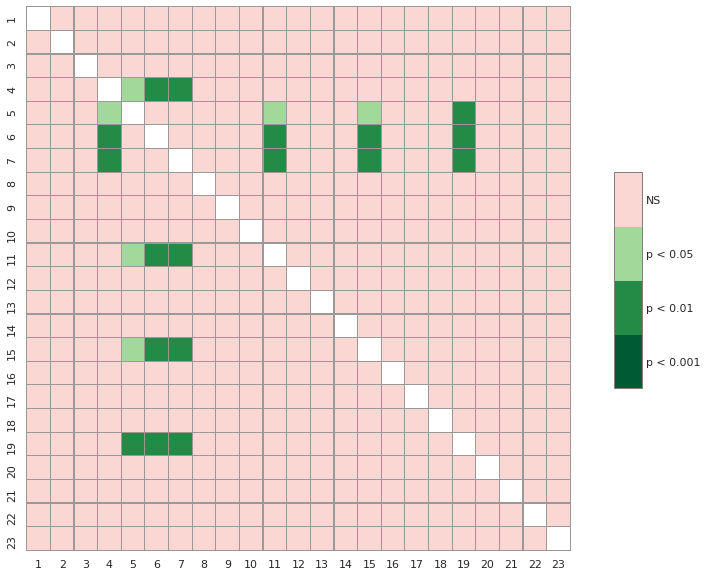

In [ ]:
plt.figure(figsize=(10, 10))
heatmap_args = {'linewidths': 0.1, 'linecolor': '0.6', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.95, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as snb

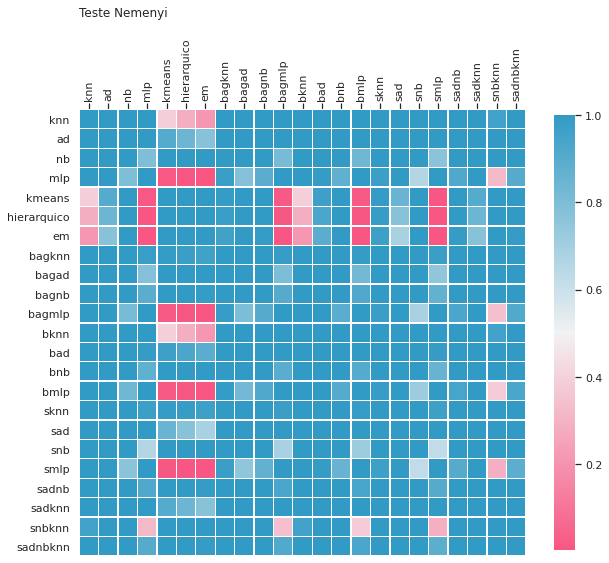

In [ ]:
# figure
fig, ax = plt.subplots(figsize=(10, 10))

cmap = snb.diverging_palette(0, 230, 90, 60, as_cmap=True)

cb = { 0.95, 0.35, 0.04, 0.3}

# plot heatmap
snb.heatmap(pc, cmap=cmap, square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})

# xticks
ax.xaxis.tick_top()
xticks_labels = ['knn','ad','nb','mlp',
                 'kmeans','hierarquico','em',
                 'bagknn','bagad','bagnb','bagmlp',
                 'bknn','bad','bnb','bmlp',
                 'sknn','sad','snb','smlp',
                 'sadnb','sadknn','snbknn','sadnbknn'
                ]
plt.xticks(np.arange(23) + 0.5, labels=xticks_labels, rotation=90)
plt.yticks(np.arange(23) + 0.5, labels=xticks_labels, rotation=0)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'Teste Nemenyi\n'
plt.title(title, loc='left')
plt.show()